# Simulación de errores Pauli en el Algoritmo de Grover

## 1.   Abstract

En este notebook, haremos un análisis de diferentes simulaciones de errores de depolarizacion en el Algoritmo de Grover. El respectivo algoritmo, y los experimentos, estan pensados para que unicamente se busque un elemento marcado.

La primera sección del notebook, sera para codear los imports necesarios durantes los experimentos y las funciones comunes que seran de utilidad durante los mismos. En segundo lugar, se hara una ejecución del algoritmo en el hardware de IBM $\textit{ibm_lagos}$, que tiene una topologia de 7 qubits.

Luego, se haran multiple simulaciones con el simulador AER. Se agregara un ratio de ruido creciente desde 0 a 0.3, incrementando en 0.01 por cada experimento. Se mostraran los resultados para cada uno de estos experimentos, para luego representar en un grafico la correlación entre probabilidad de ruido y probabilidad de resultado exitoso. Todo esto se repetira dos veces:

    - La primera vez, para agregar ruido unicamente a compuertas de 1 qubit.
    - La segunda vez, para agregar ruido unicamente a compuertas de 2 qubits.

Finalmente, se analizaran todos los resultados en conjunto.

## 2.   Imports y funciones comunes

In [1]:
import numpy as np
from qiskit import QuantumCircuit,QuantumRegister, transpile
from qiskit_aer import AerSimulator
from qiskit.tools.visualization import plot_histogram
from qiskit.circuit.library import GroverOperator, MCMT, ZGate
import math
import matplotlib.pyplot as plt

# Importar desde el modulo de ruido Qiskit Aer
from qiskit_aer.noise import (NoiseModel, QuantumError, ReadoutError,
    pauli_error, depolarizing_error, thermal_relaxation_error)

# Importar para correr en hardware de IBM Quantum
from  qiskit_ibm_provider import IBMProvider

In [2]:
def grover_oracle(marked_states):
    """Build a Grover oracle for multiple marked states

    Here we assume all input marked states have the same number of bits

    Parameters:
        marked_states (str or list): Marked states of oracle

    Returns:
        QuantumCircuit: Quantum circuit representing Grover oracle
    """
    if not isinstance(marked_states, list):
        marked_states = [marked_states]
    # Compute the number of qubits in circuit
    num_qubits = len(marked_states[0])

    qc = QuantumCircuit(num_qubits)
    # Mark each target state in the input list
    for target in marked_states:
        # Flip target bit-string to match Qiskit bit-ordering
        rev_target = target[::-1]
        # Find the indices of all the '0' elements in bit-string
        zero_inds = [ind for ind in range(num_qubits) if rev_target.startswith("0", ind)]
        # Add a multi-controlled Z-gate with pre- and post-applied X-gates (open-controls)
        # where the target bit-string has a '0' entry
        qc.x(zero_inds)
        qc.compose(MCMT(ZGate(), num_qubits - 1, 1), inplace=True)
        qc.x(zero_inds)
    return qc

In [15]:
#VARIABLES GLOBALES
marked_states=['010']
nroQubits=3
shots=10000
errorProbabilities = np.arange(0,0.31,0.01)

#Se crea el operador de grover: oraculo + expansion de estado
oracle = grover_oracle(marked_states)
groverOp = GroverOperator(oracle)

#Se calcula el numero optimo de iteraciones
optimal_num_iterations = math.floor(
    math.pi / 4 * math.sqrt(2**groverOp.num_qubits / len(marked_states))
)

a = []
b = []

#VARIABLES GLOBALES RELACIONADAS AL HARDWARE IBM_LAGOS - ESTOS VALORES DEBEN CAMBIARSE SI SE USA OTRO HARDWARE
one_qubit_basis_gates=['id','rz','sx','x']
two_qubits_basis_gates=['cx']
basis_gates = one_qubit_basis_gates + two_qubits_basis_gates

In [4]:
#crea ruido de depolarizacion
def add_depolarizing_error(noise_model,prob1,prob2):
    noise_model = add_one_qubit_depolarizing_error(noise_model,prob1)
    noise_model = add_two_qubits_depolarizing_error(noise_model,prob2)
    return noise_model

#crea ruido de depolarizacion en compuertas 1 qubit
def add_one_qubit_depolarizing_error(noise_model,prob):
    error = depolarizing_error(prob, 1)
    noise_model.add_all_qubit_quantum_error(error,one_qubit_basis_gates)
    return noise_model

#crea ruido de depolarizacion en compuertas 2 qubits 
def add_two_qubits_depolarizing_error(noise_model,prob):
    error = depolarizing_error(prob, 2)
    noise_model.add_all_qubit_quantum_error(error, two_qubits_basis_gates)
    return noise_model

#PARA TESTING
#noise_model = NoiseModel()
#print(add_one_qubit_depolarizing_error(noise_model,0.1))
#print(add_two_qubits_depolarizing_error(noise_model,0.3))
#print(add_depolarizing_error(noise_model,0.2,0.3))

## 3.   Ejecución en hardware real - ibm_lagos

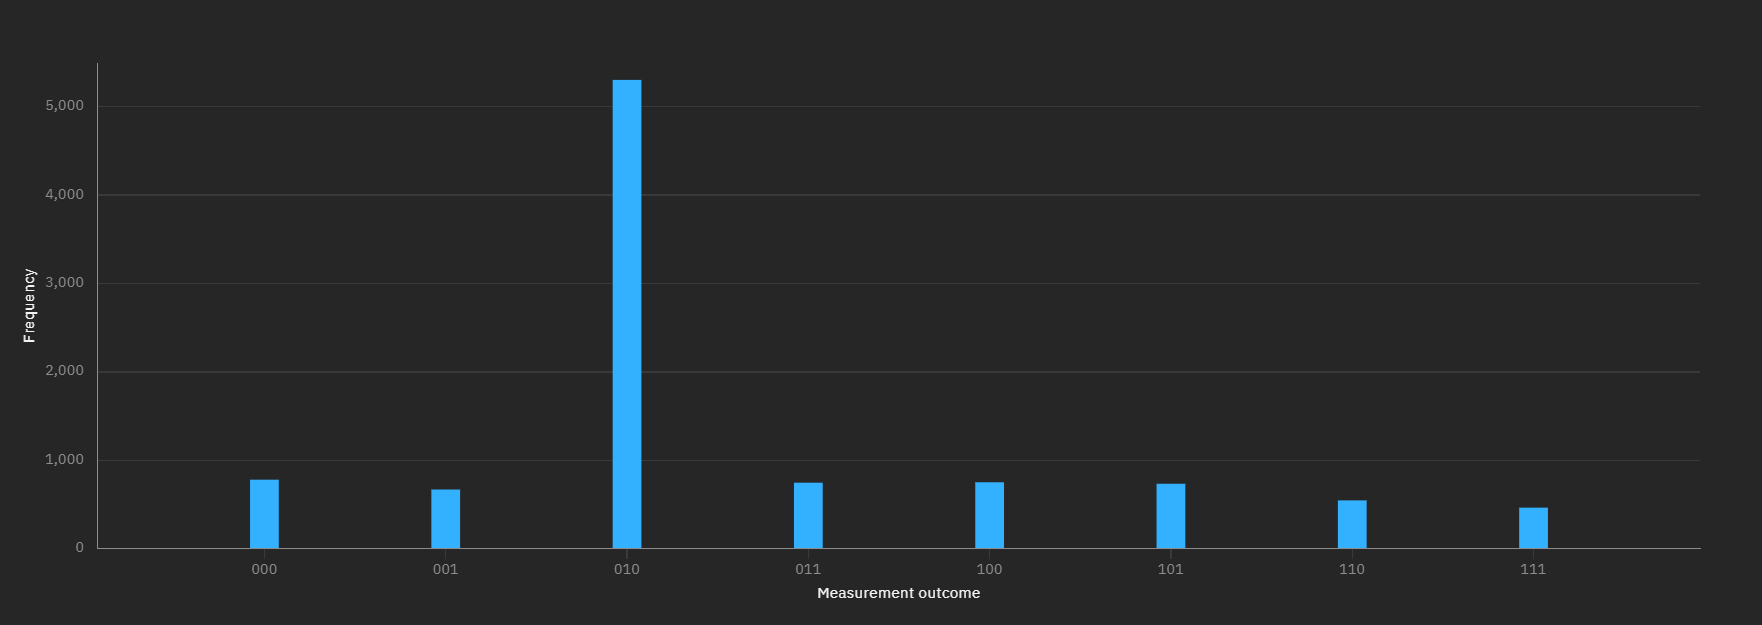

In [5]:
from PIL import Image
img = Image.open(r'C:\Users\54299\Desktop\Facultad\Trabajos\QuantumQuipu\Noise and native gates\QuantumQuipu_NoiseAndNativeGates\Imagenes\ibm_lagos_result.png')
display(img)

## 4.   Simulaciones

### 4.1   Errores de depolarizacion en compuertas de 1 qubit

PROBABILIDAD DE ERROR:  0.0
noise model:  NoiseModel: Ideal


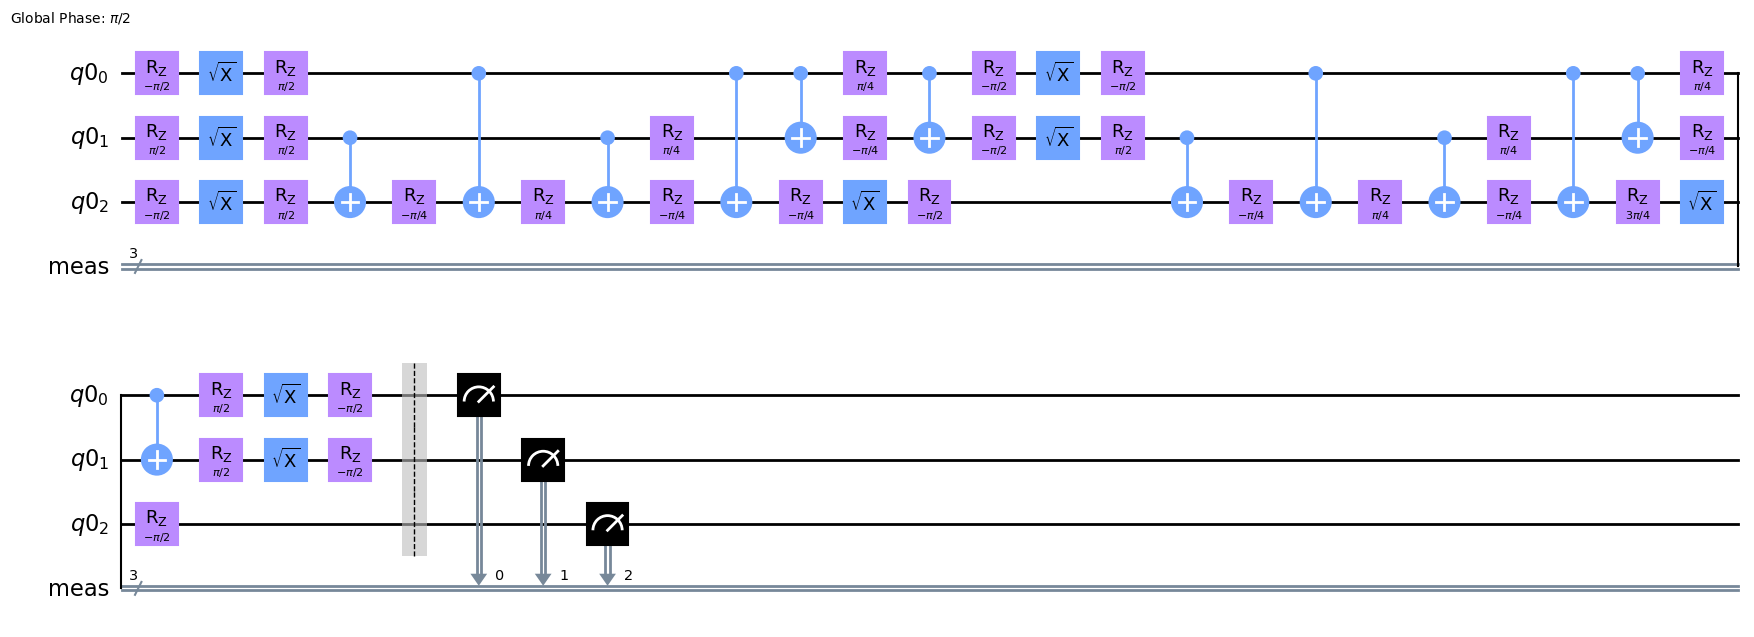

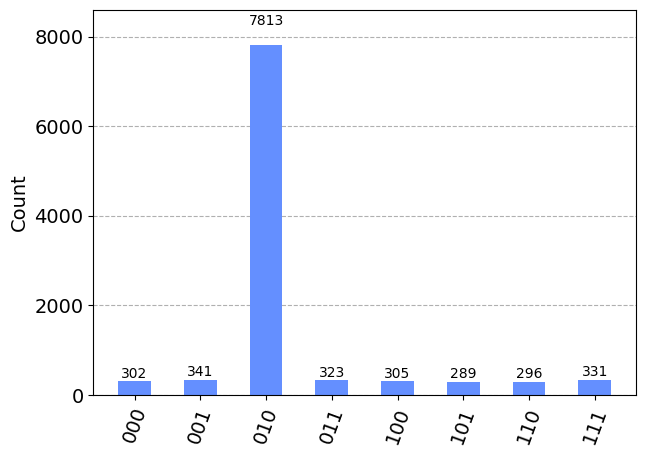

PROBABILIDAD DE ERROR:  0.01
noise model:  NoiseModel:
  Basis gates: ['cx', 'id', 'rz', 'sx', 'x']
  Instructions with noise: ['x', 'sx', 'rz', 'id']
  All-qubits errors: ['id', 'rz', 'sx', 'x']


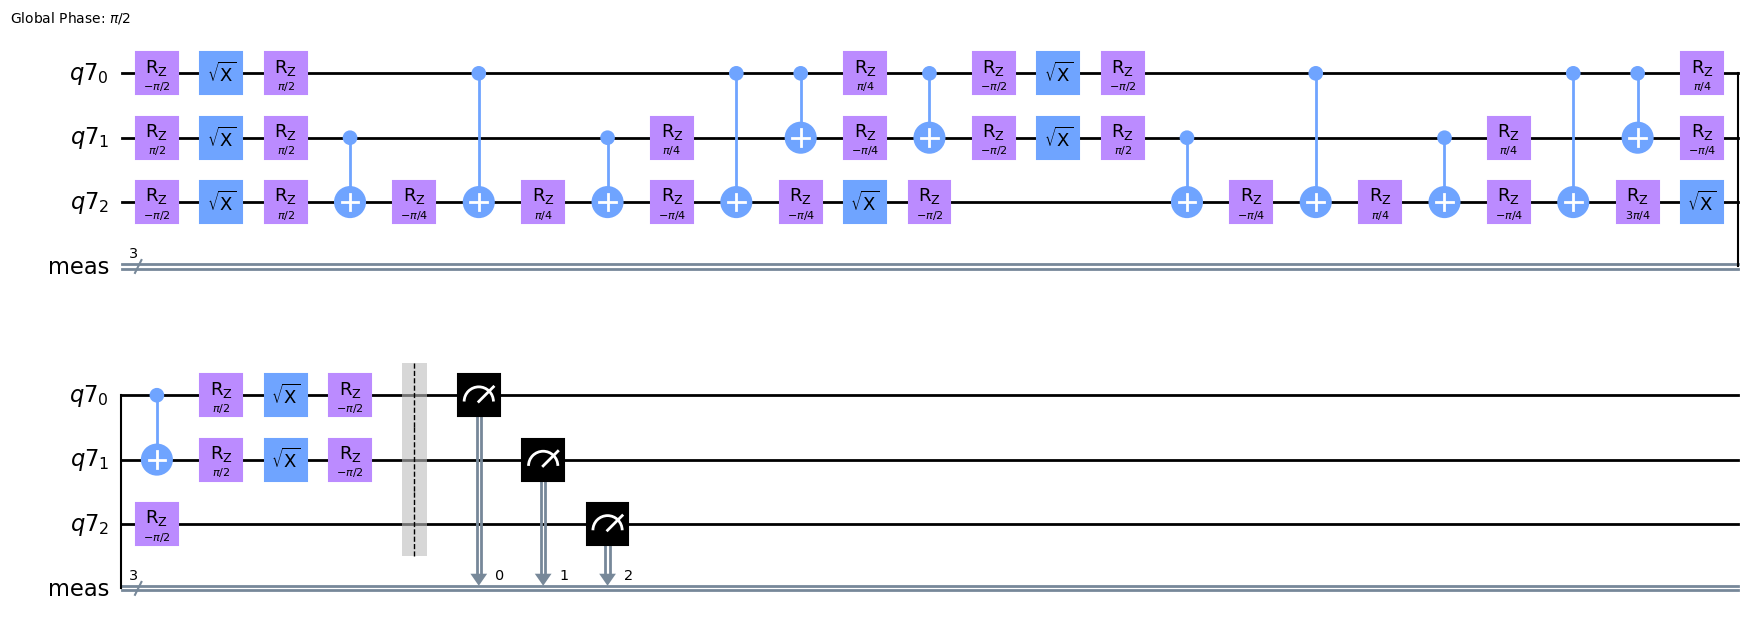

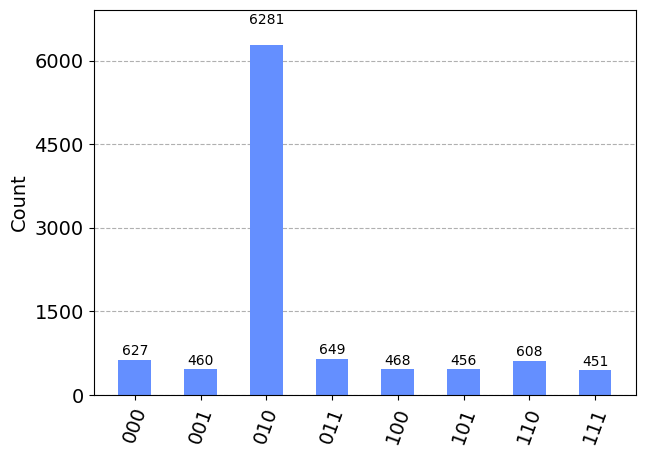

PROBABILIDAD DE ERROR:  0.02
noise model:  NoiseModel:
  Basis gates: ['cx', 'id', 'rz', 'sx', 'x']
  Instructions with noise: ['x', 'sx', 'rz', 'id']
  All-qubits errors: ['id', 'rz', 'sx', 'x']


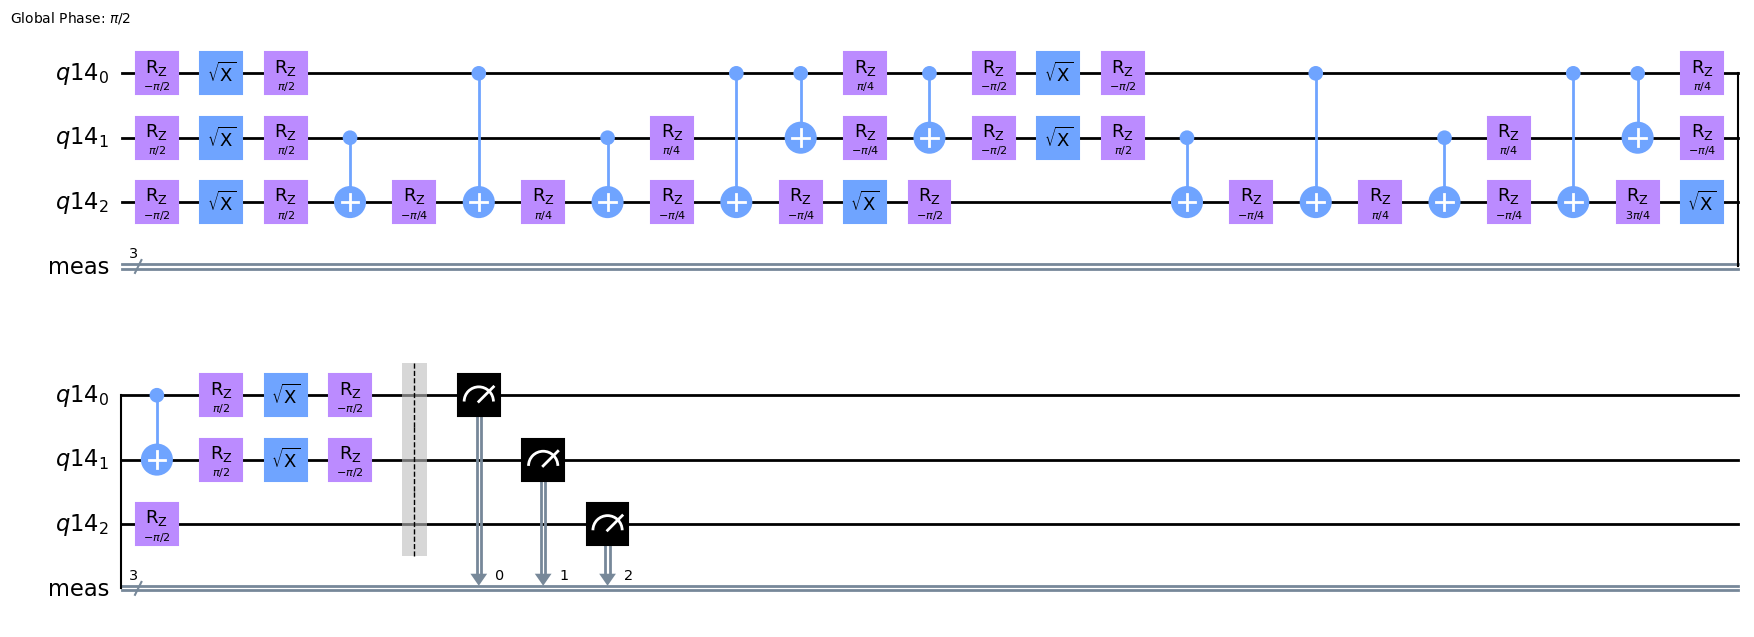

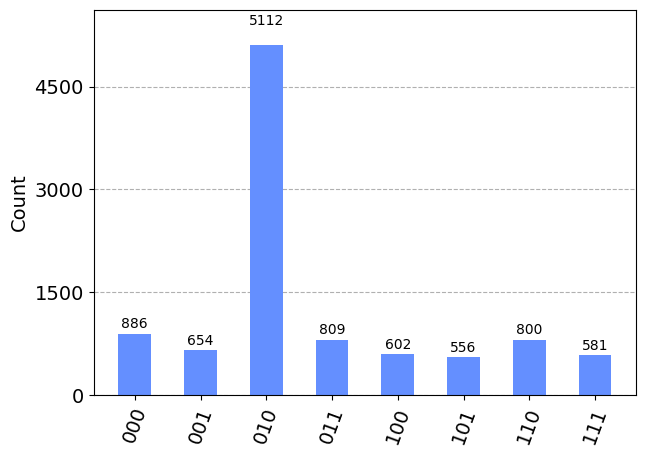

PROBABILIDAD DE ERROR:  0.03
noise model:  NoiseModel:
  Basis gates: ['cx', 'id', 'rz', 'sx', 'x']
  Instructions with noise: ['x', 'sx', 'rz', 'id']
  All-qubits errors: ['id', 'rz', 'sx', 'x']


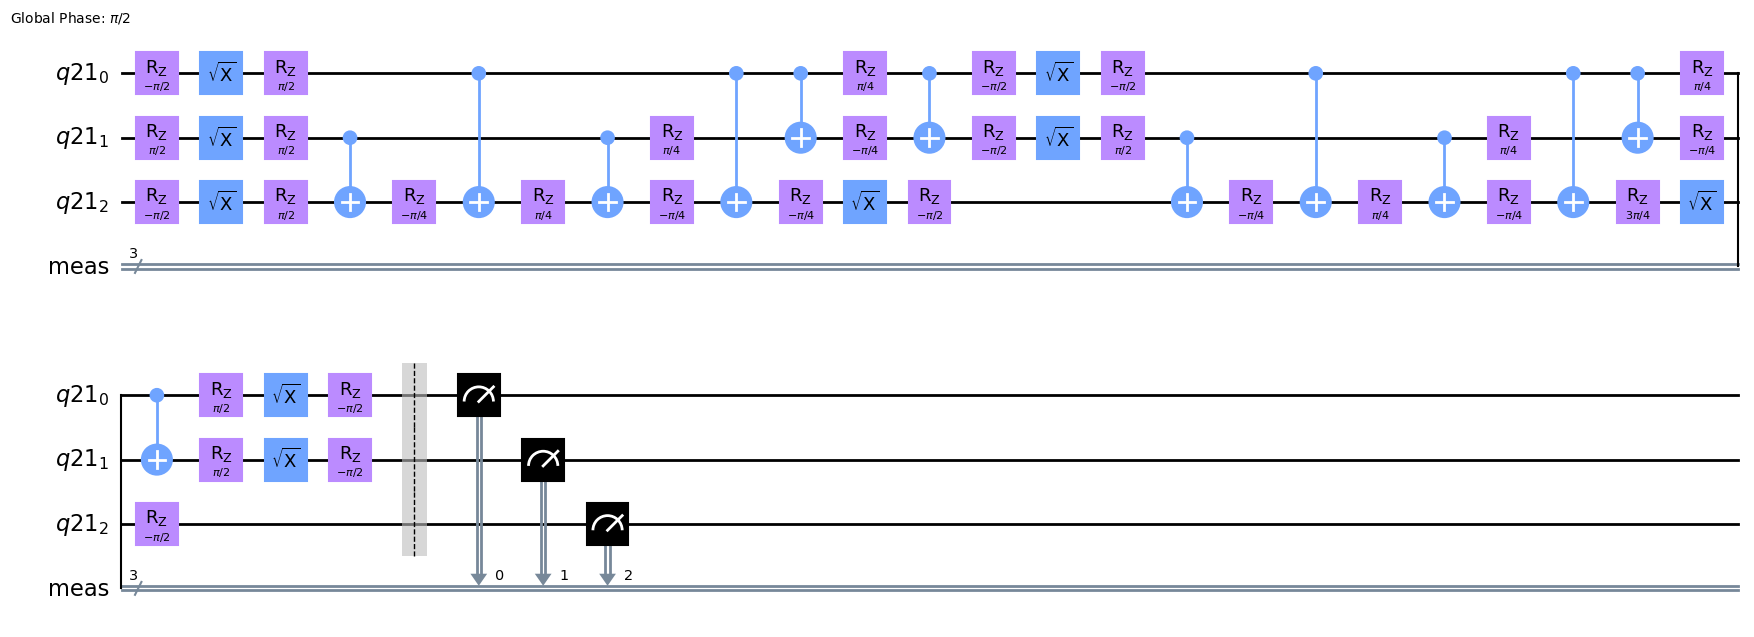

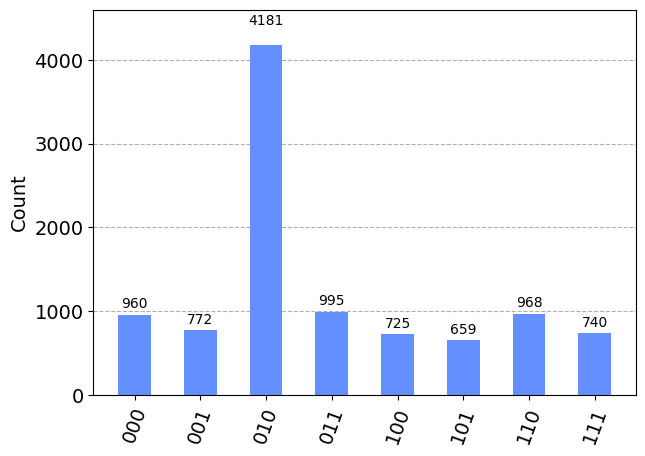

PROBABILIDAD DE ERROR:  0.04
noise model:  NoiseModel:
  Basis gates: ['cx', 'id', 'rz', 'sx', 'x']
  Instructions with noise: ['x', 'sx', 'rz', 'id']
  All-qubits errors: ['id', 'rz', 'sx', 'x']


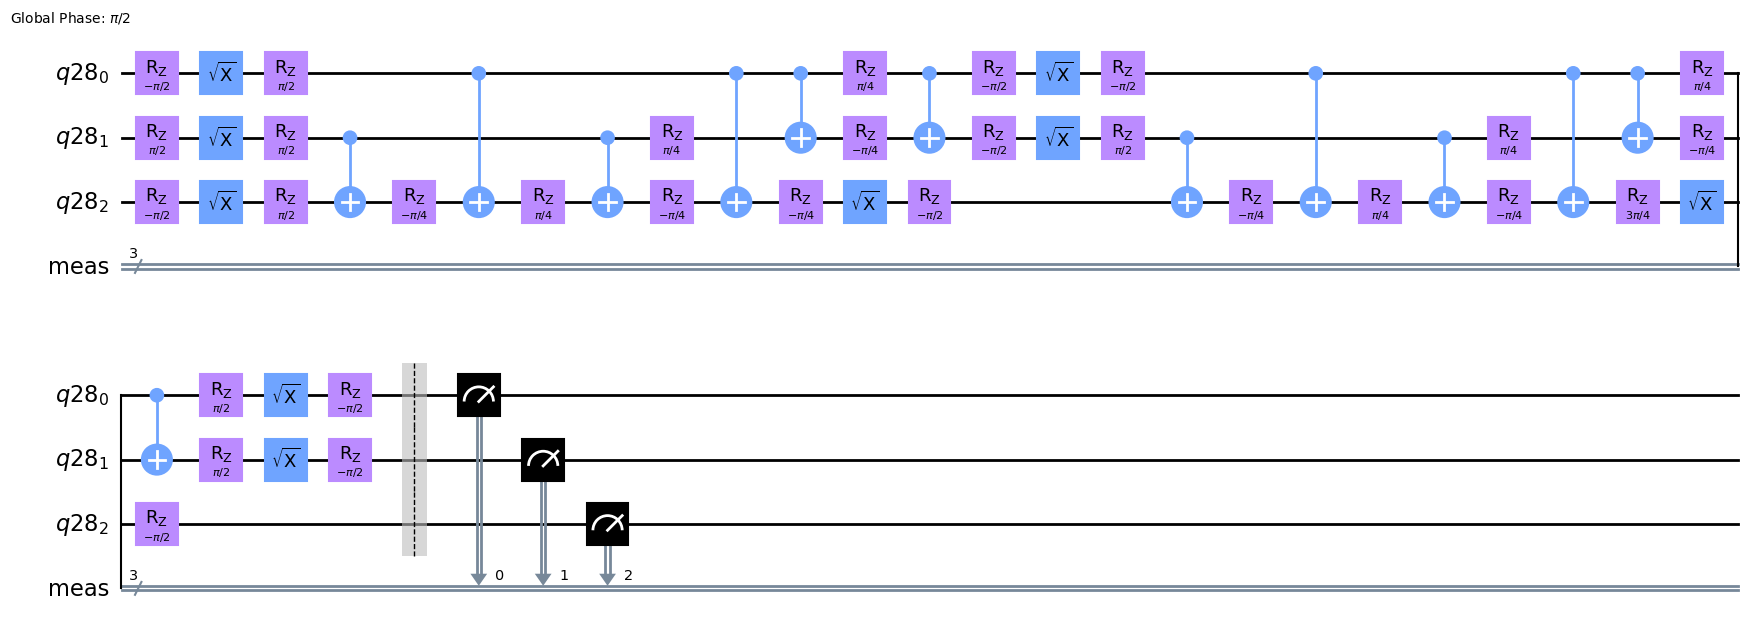

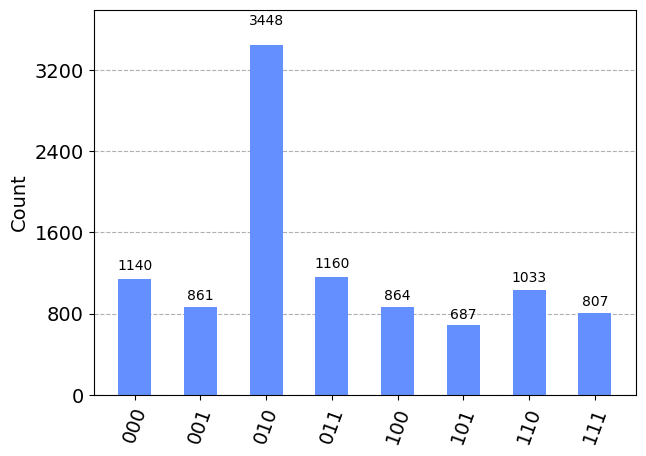

PROBABILIDAD DE ERROR:  0.05
noise model:  NoiseModel:
  Basis gates: ['cx', 'id', 'rz', 'sx', 'x']
  Instructions with noise: ['x', 'sx', 'rz', 'id']
  All-qubits errors: ['id', 'rz', 'sx', 'x']


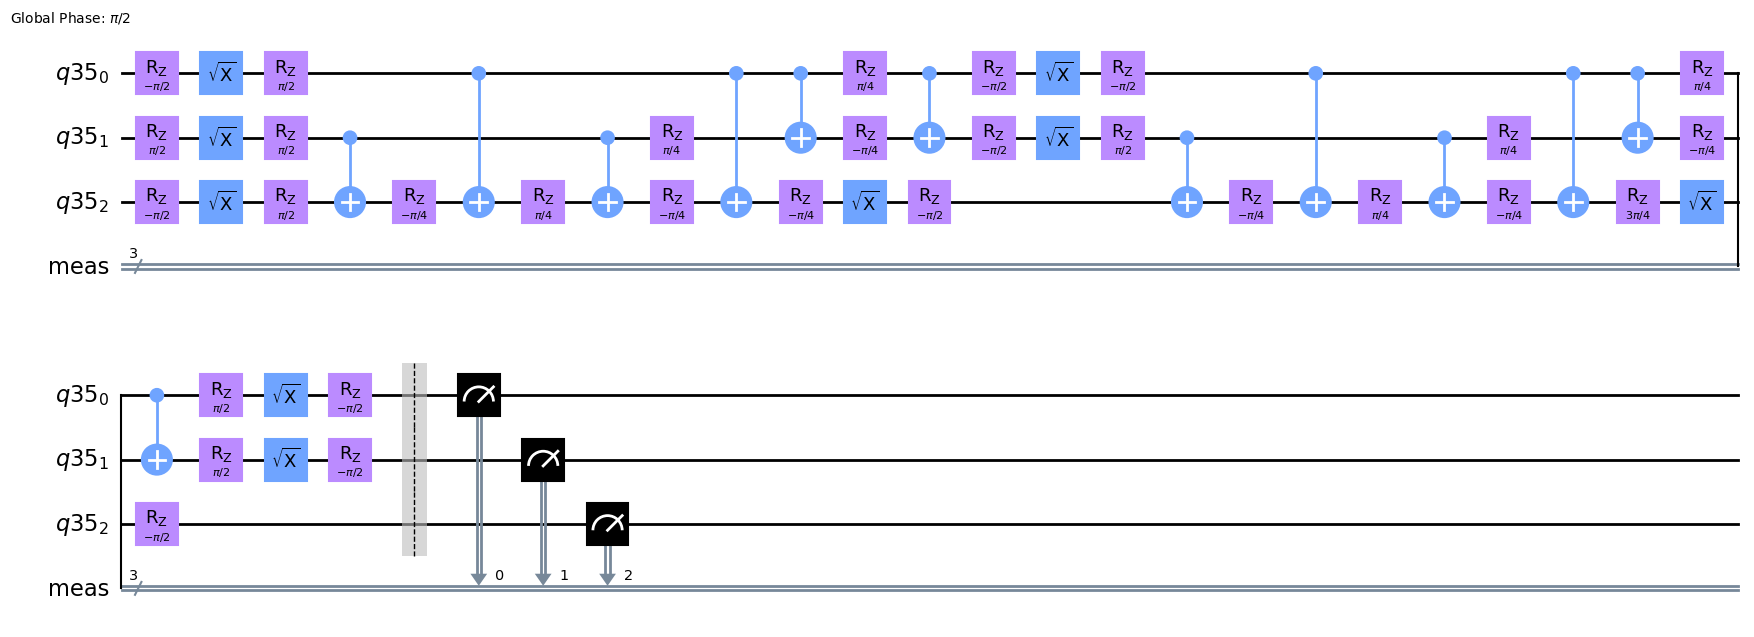

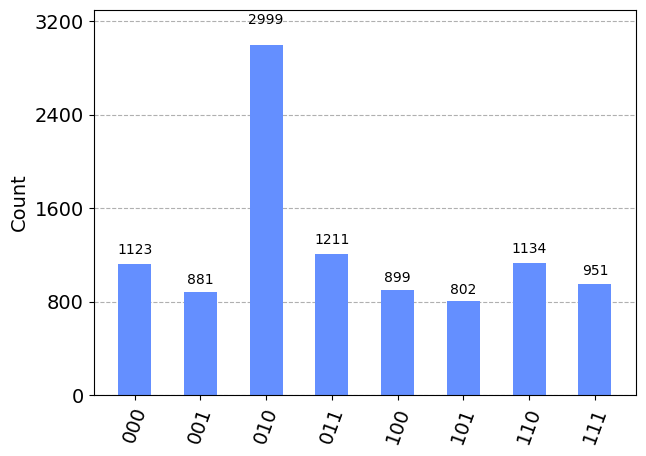

PROBABILIDAD DE ERROR:  0.06
noise model:  NoiseModel:
  Basis gates: ['cx', 'id', 'rz', 'sx', 'x']
  Instructions with noise: ['x', 'sx', 'rz', 'id']
  All-qubits errors: ['id', 'rz', 'sx', 'x']


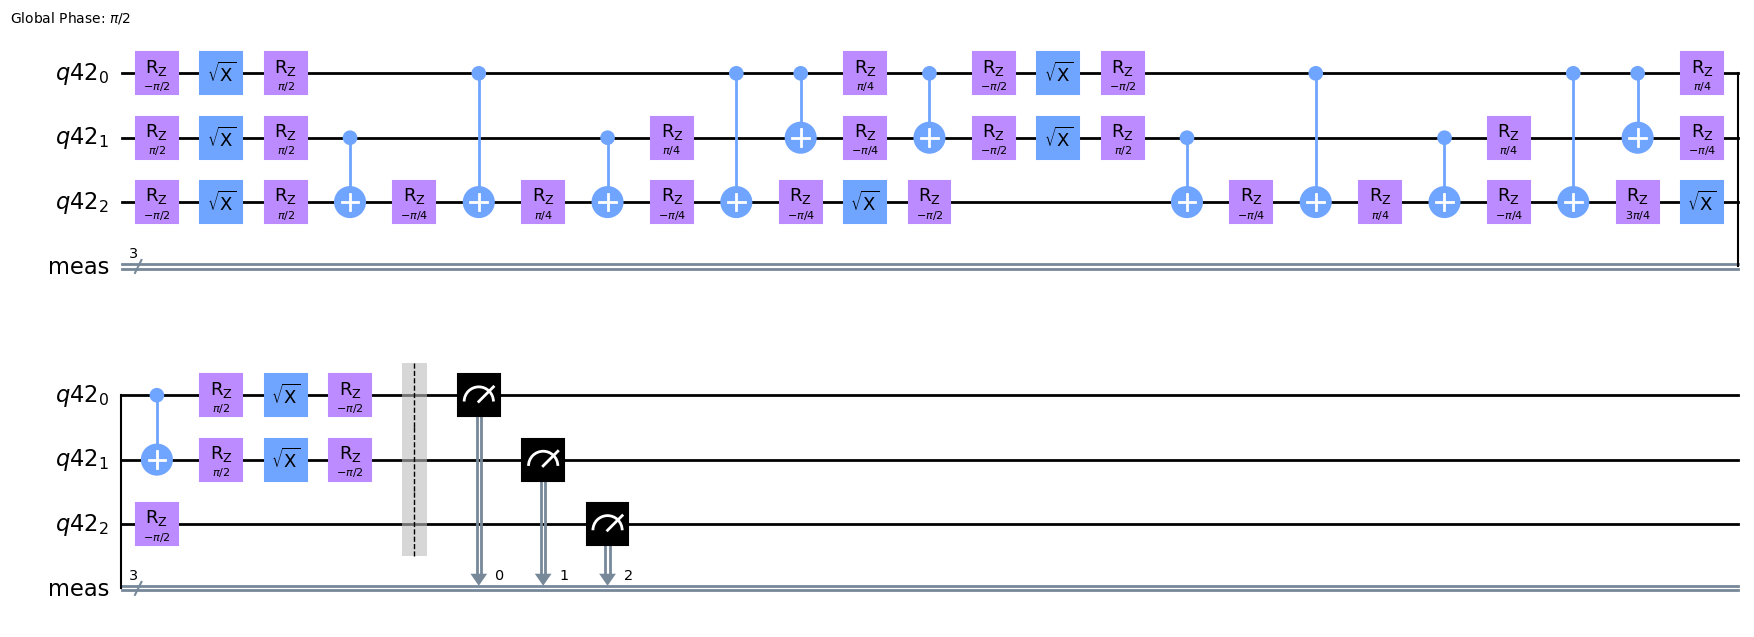

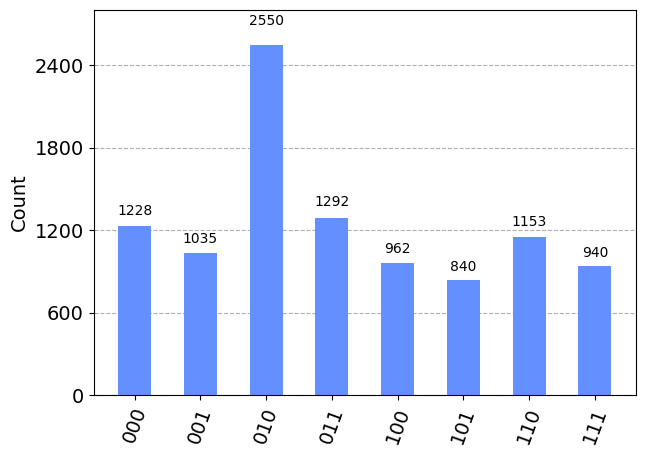

PROBABILIDAD DE ERROR:  0.07
noise model:  NoiseModel:
  Basis gates: ['cx', 'id', 'rz', 'sx', 'x']
  Instructions with noise: ['x', 'sx', 'rz', 'id']
  All-qubits errors: ['id', 'rz', 'sx', 'x']


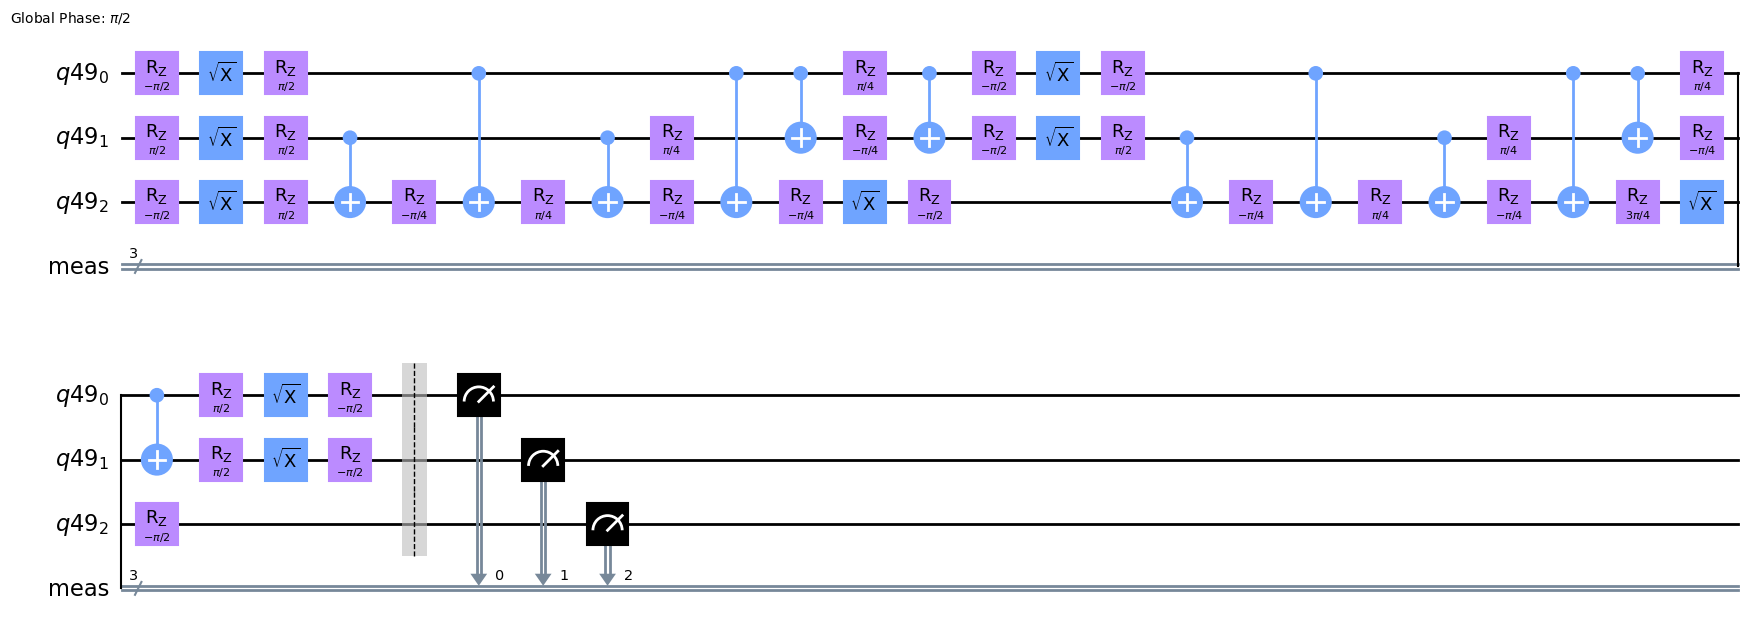

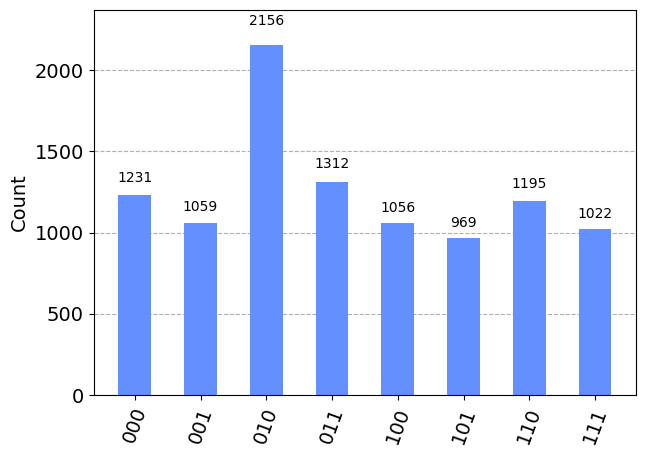

PROBABILIDAD DE ERROR:  0.08
noise model:  NoiseModel:
  Basis gates: ['cx', 'id', 'rz', 'sx', 'x']
  Instructions with noise: ['x', 'sx', 'rz', 'id']
  All-qubits errors: ['id', 'rz', 'sx', 'x']


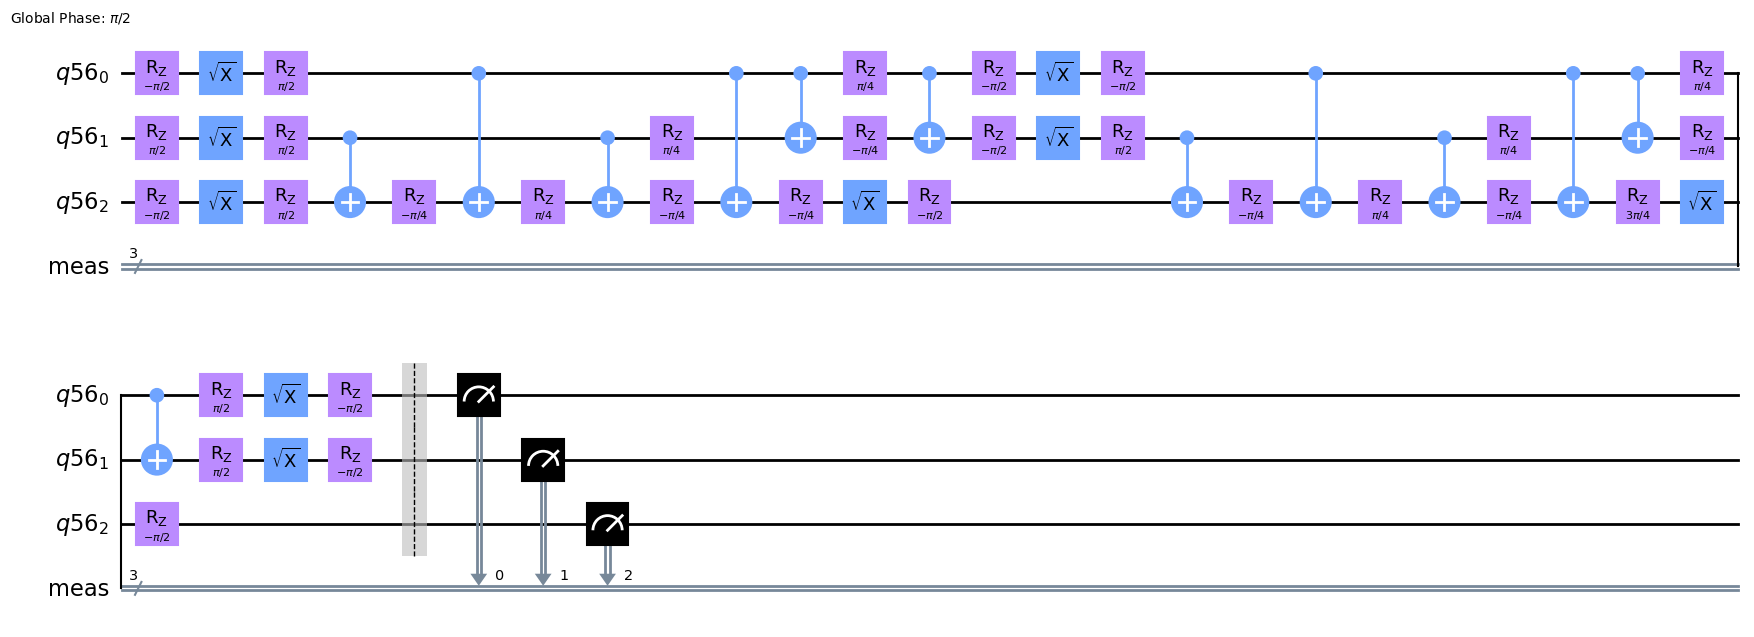

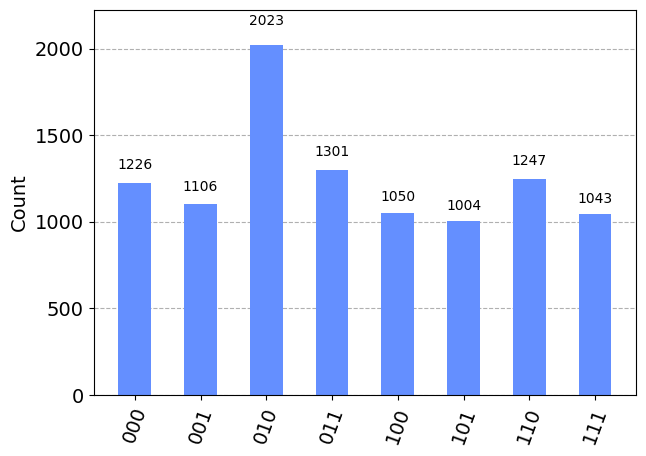

PROBABILIDAD DE ERROR:  0.09
noise model:  NoiseModel:
  Basis gates: ['cx', 'id', 'rz', 'sx', 'x']
  Instructions with noise: ['x', 'sx', 'rz', 'id']
  All-qubits errors: ['id', 'rz', 'sx', 'x']


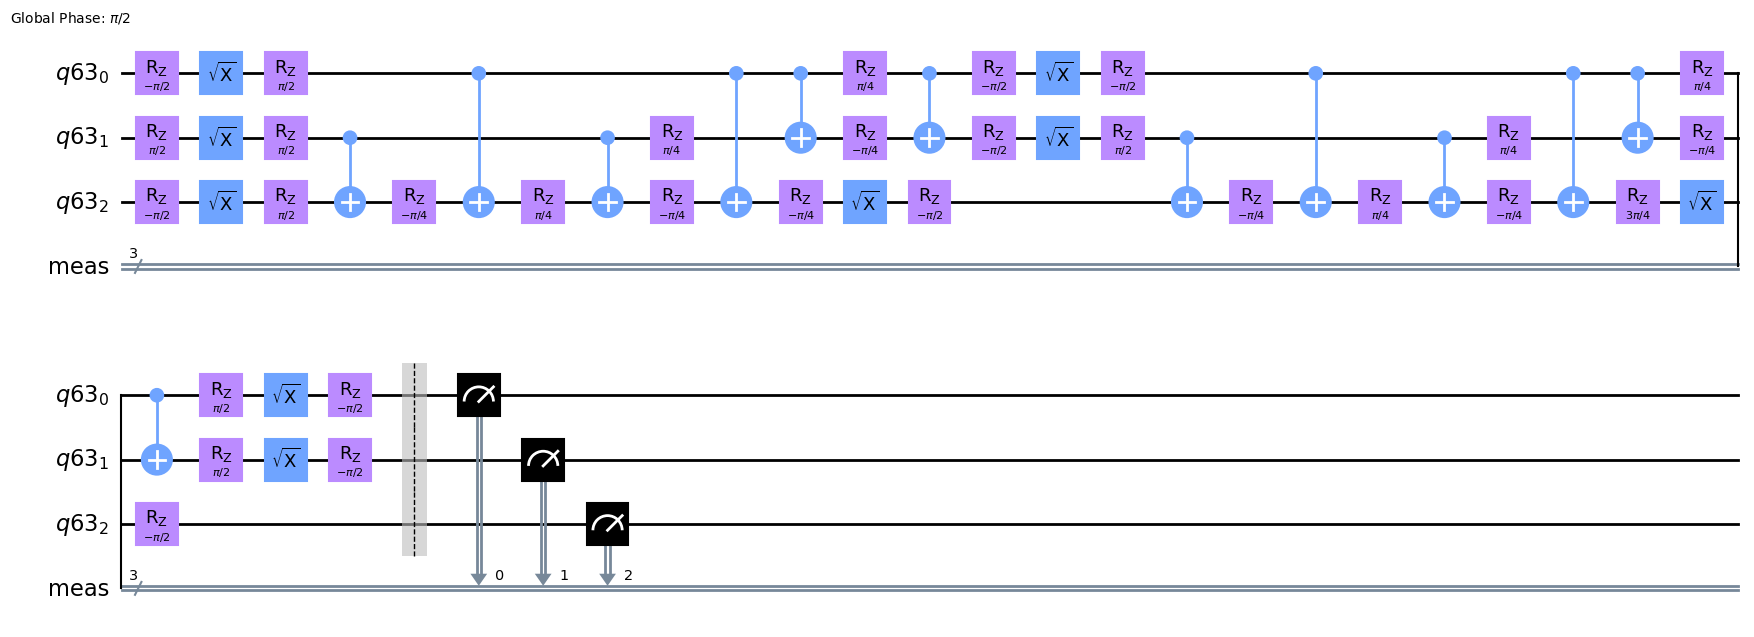

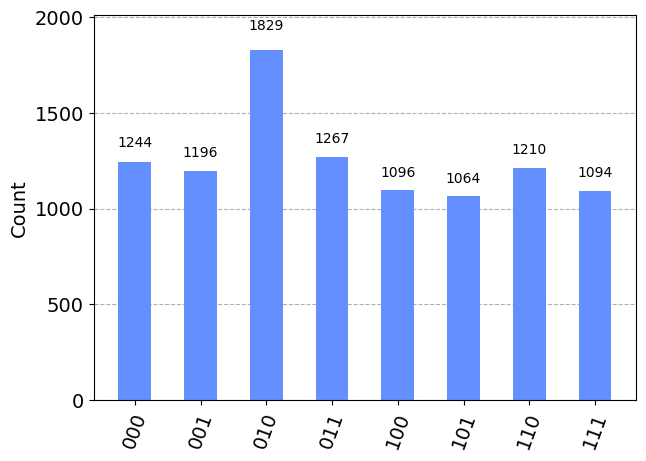

PROBABILIDAD DE ERROR:  0.1
noise model:  NoiseModel:
  Basis gates: ['cx', 'id', 'rz', 'sx', 'x']
  Instructions with noise: ['x', 'sx', 'rz', 'id']
  All-qubits errors: ['id', 'rz', 'sx', 'x']


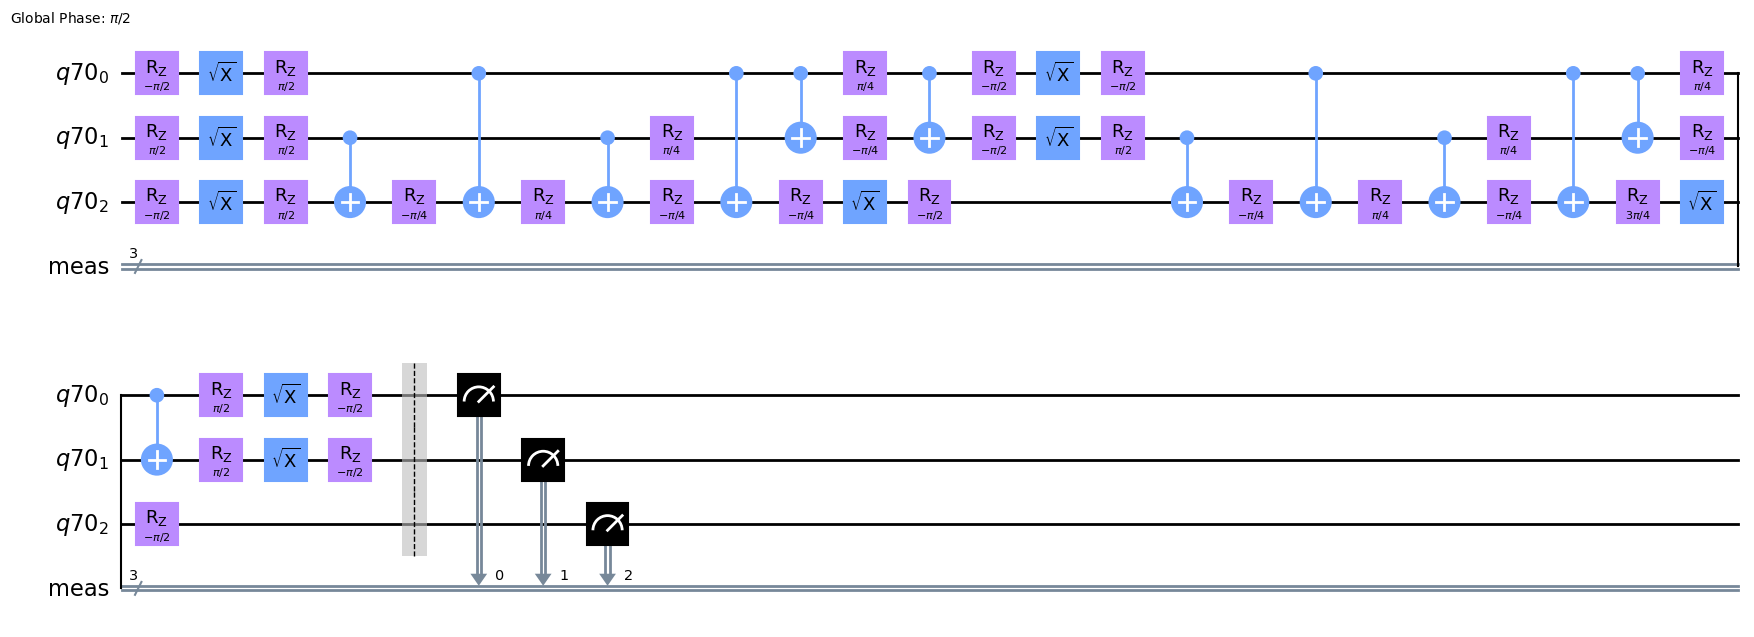

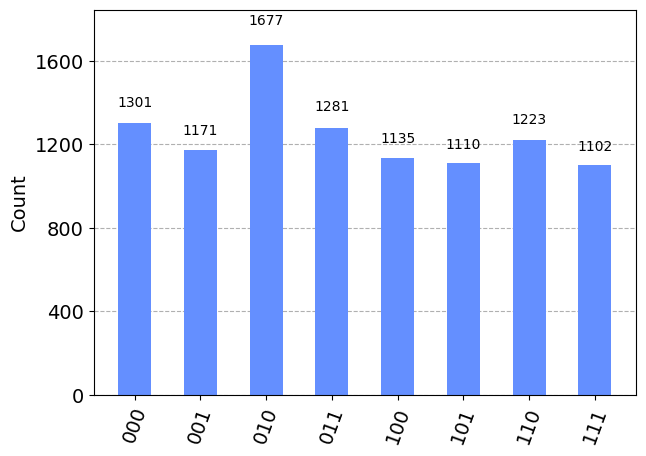

PROBABILIDAD DE ERROR:  0.11
noise model:  NoiseModel:
  Basis gates: ['cx', 'id', 'rz', 'sx', 'x']
  Instructions with noise: ['x', 'sx', 'rz', 'id']
  All-qubits errors: ['id', 'rz', 'sx', 'x']


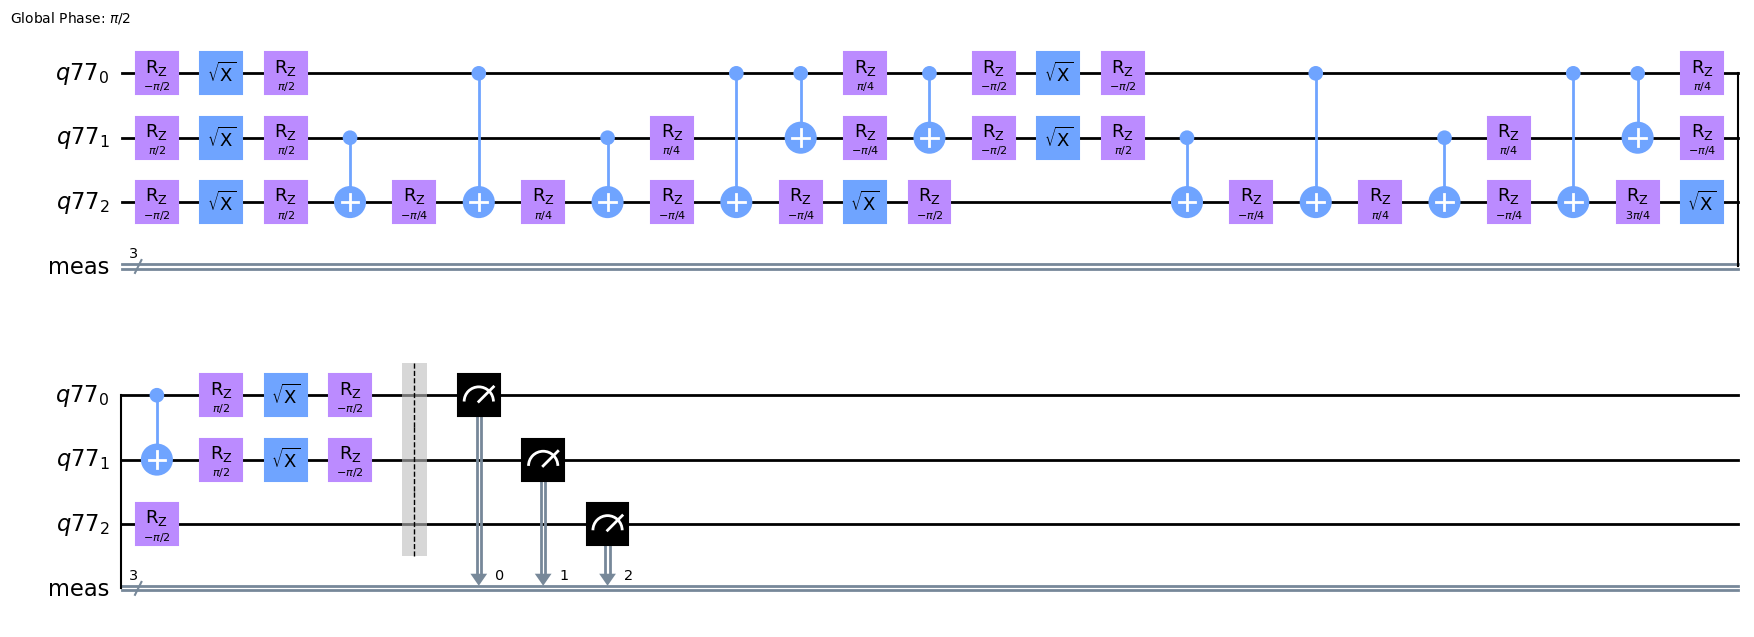

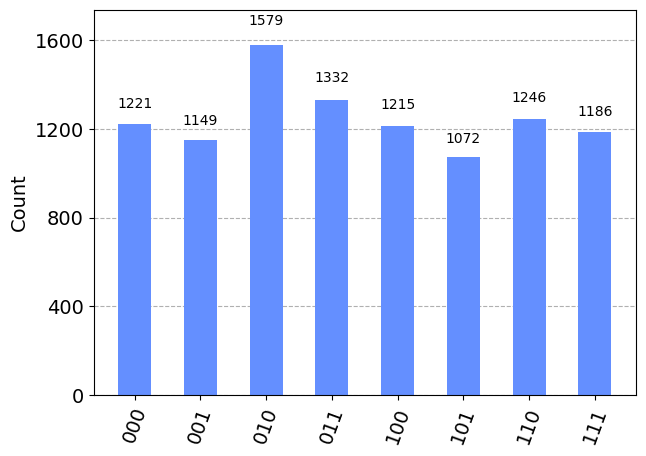

PROBABILIDAD DE ERROR:  0.12
noise model:  NoiseModel:
  Basis gates: ['cx', 'id', 'rz', 'sx', 'x']
  Instructions with noise: ['x', 'sx', 'rz', 'id']
  All-qubits errors: ['id', 'rz', 'sx', 'x']


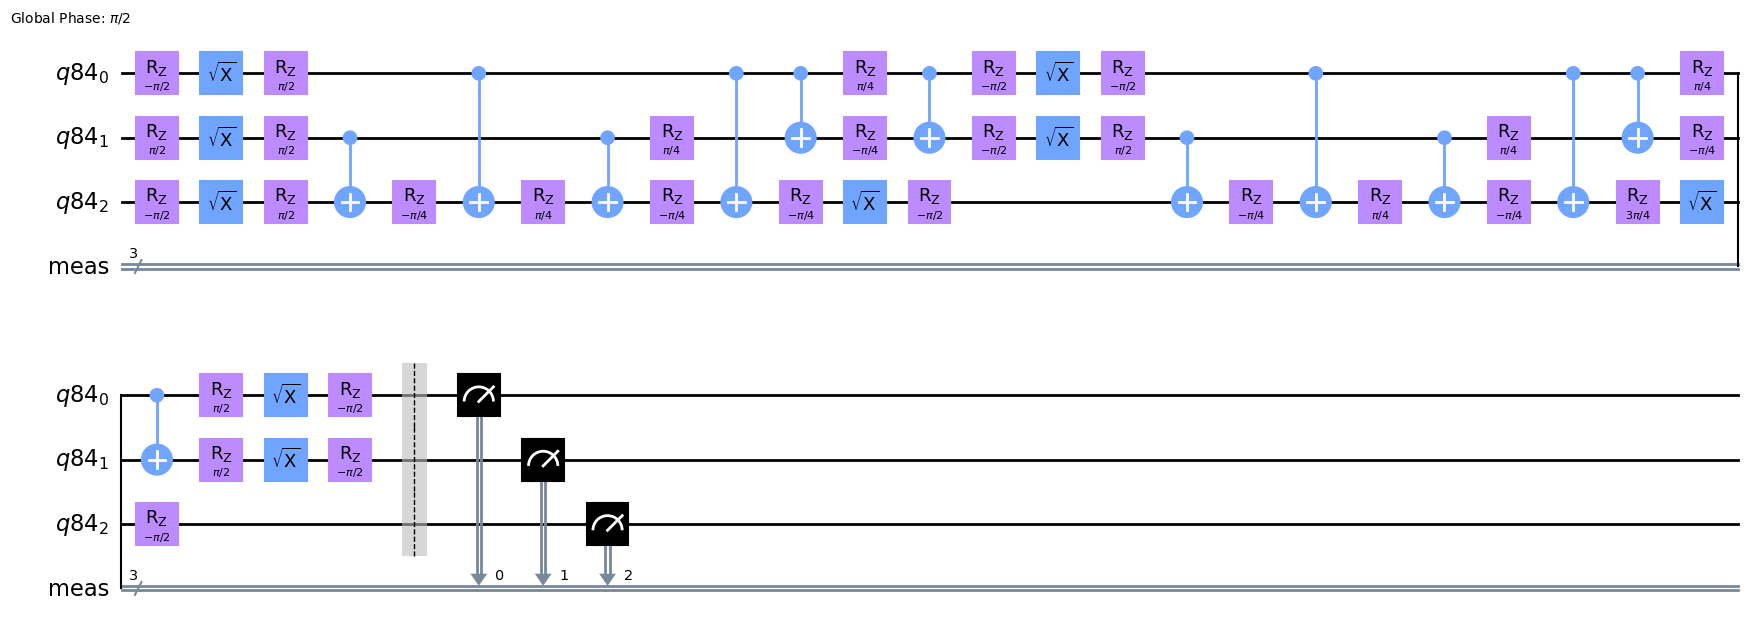

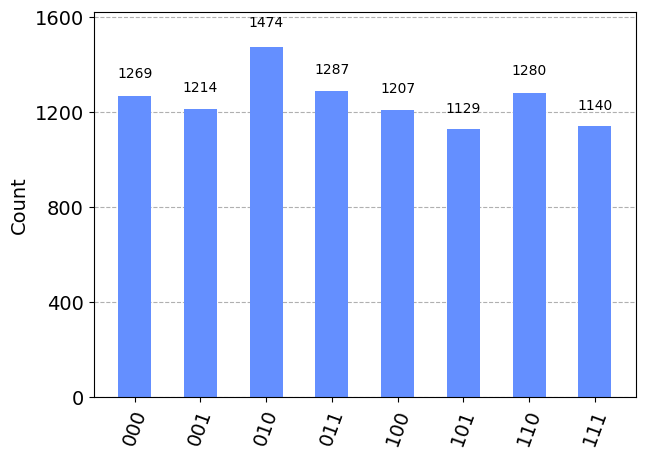

PROBABILIDAD DE ERROR:  0.13
noise model:  NoiseModel:
  Basis gates: ['cx', 'id', 'rz', 'sx', 'x']
  Instructions with noise: ['x', 'sx', 'rz', 'id']
  All-qubits errors: ['id', 'rz', 'sx', 'x']


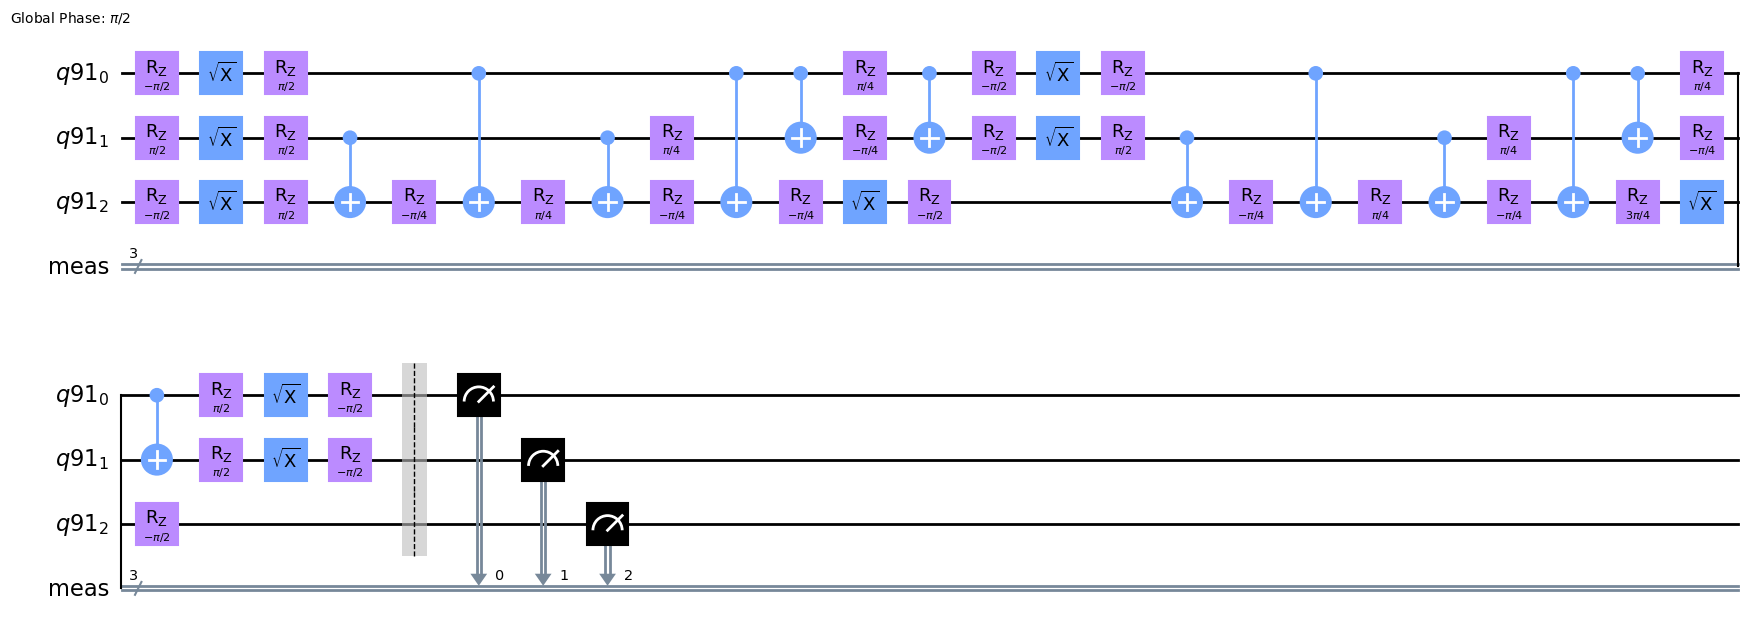

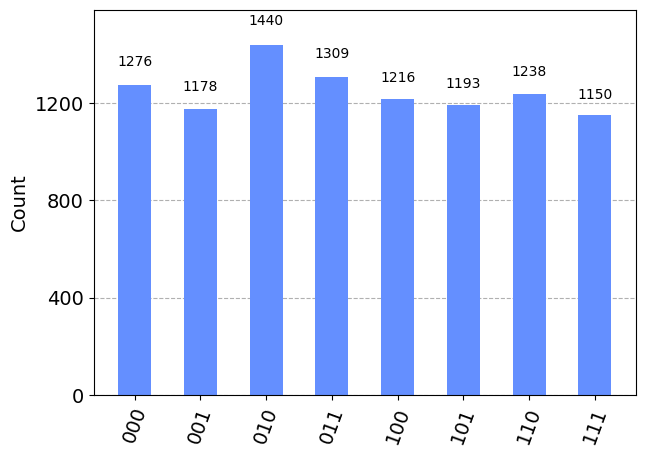

PROBABILIDAD DE ERROR:  0.14
noise model:  NoiseModel:
  Basis gates: ['cx', 'id', 'rz', 'sx', 'x']
  Instructions with noise: ['x', 'sx', 'rz', 'id']
  All-qubits errors: ['id', 'rz', 'sx', 'x']


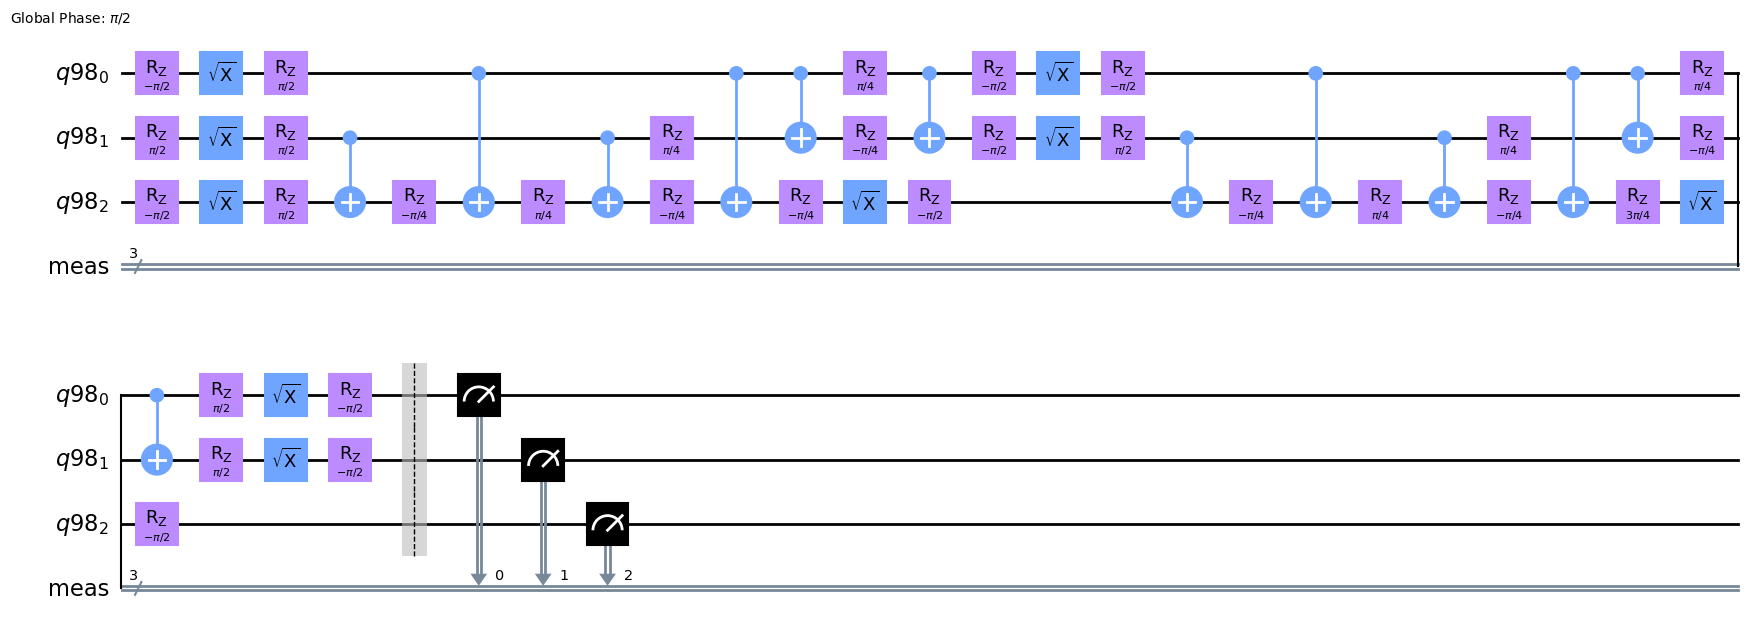

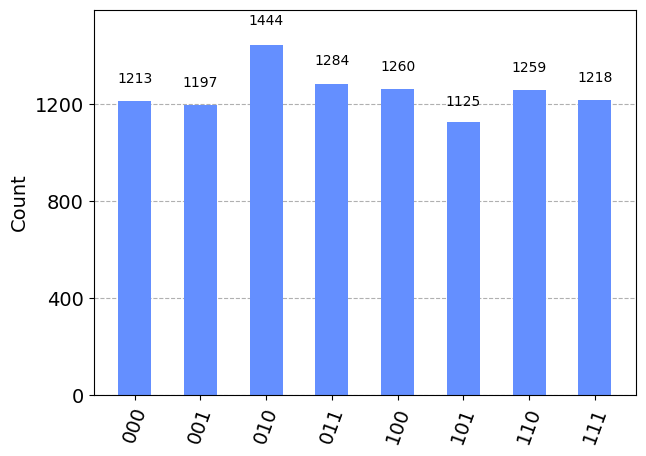

PROBABILIDAD DE ERROR:  0.15
noise model:  NoiseModel:
  Basis gates: ['cx', 'id', 'rz', 'sx', 'x']
  Instructions with noise: ['x', 'sx', 'rz', 'id']
  All-qubits errors: ['id', 'rz', 'sx', 'x']


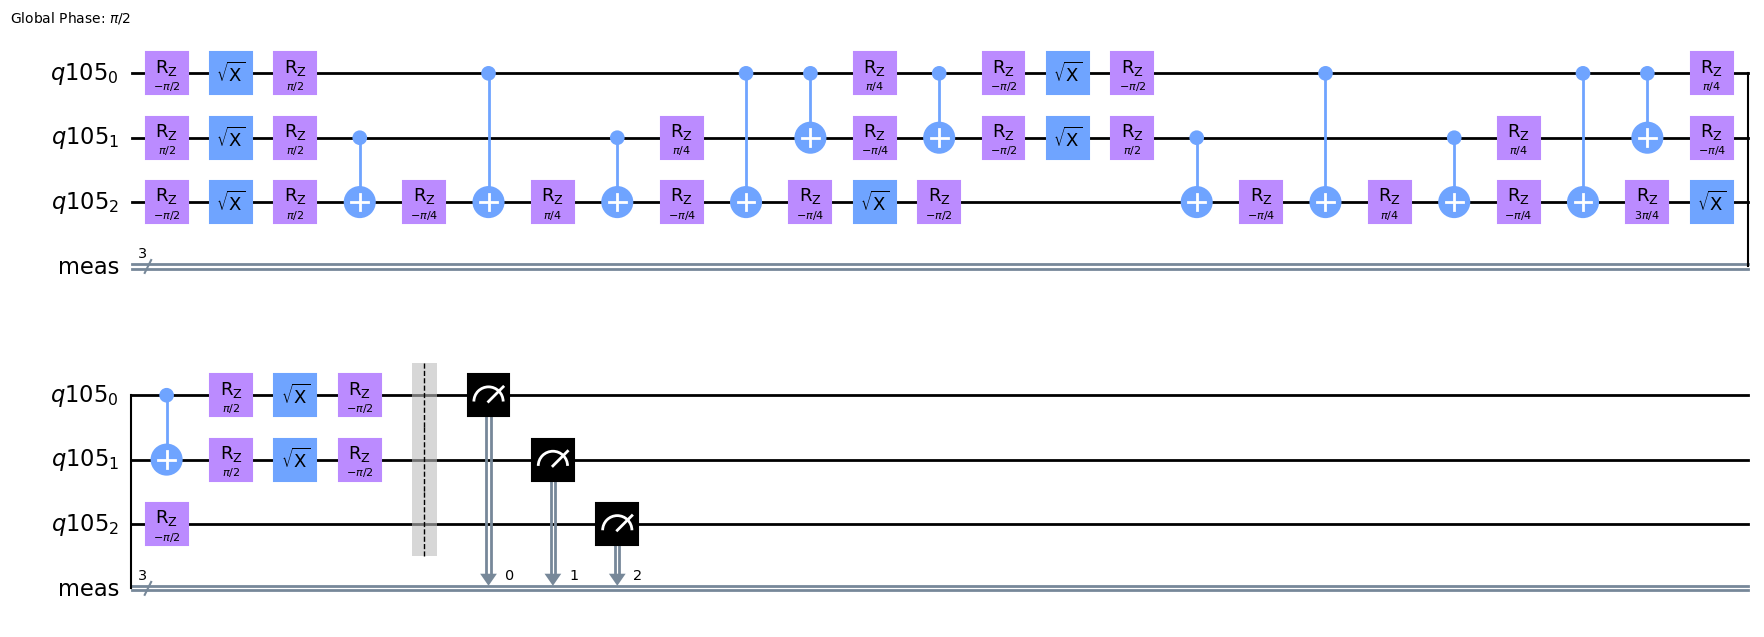

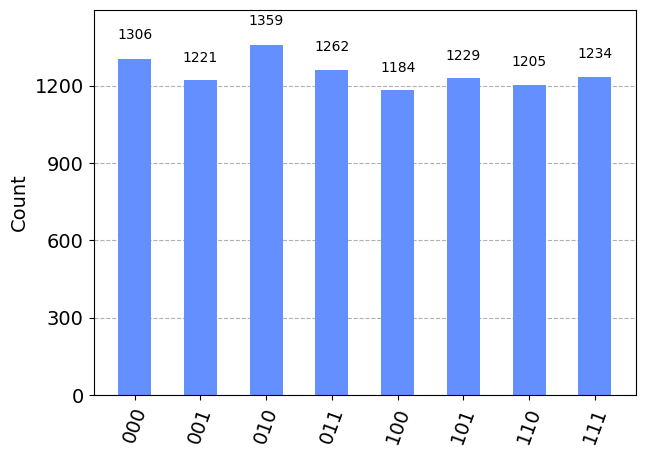

PROBABILIDAD DE ERROR:  0.16
noise model:  NoiseModel:
  Basis gates: ['cx', 'id', 'rz', 'sx', 'x']
  Instructions with noise: ['x', 'sx', 'rz', 'id']
  All-qubits errors: ['id', 'rz', 'sx', 'x']


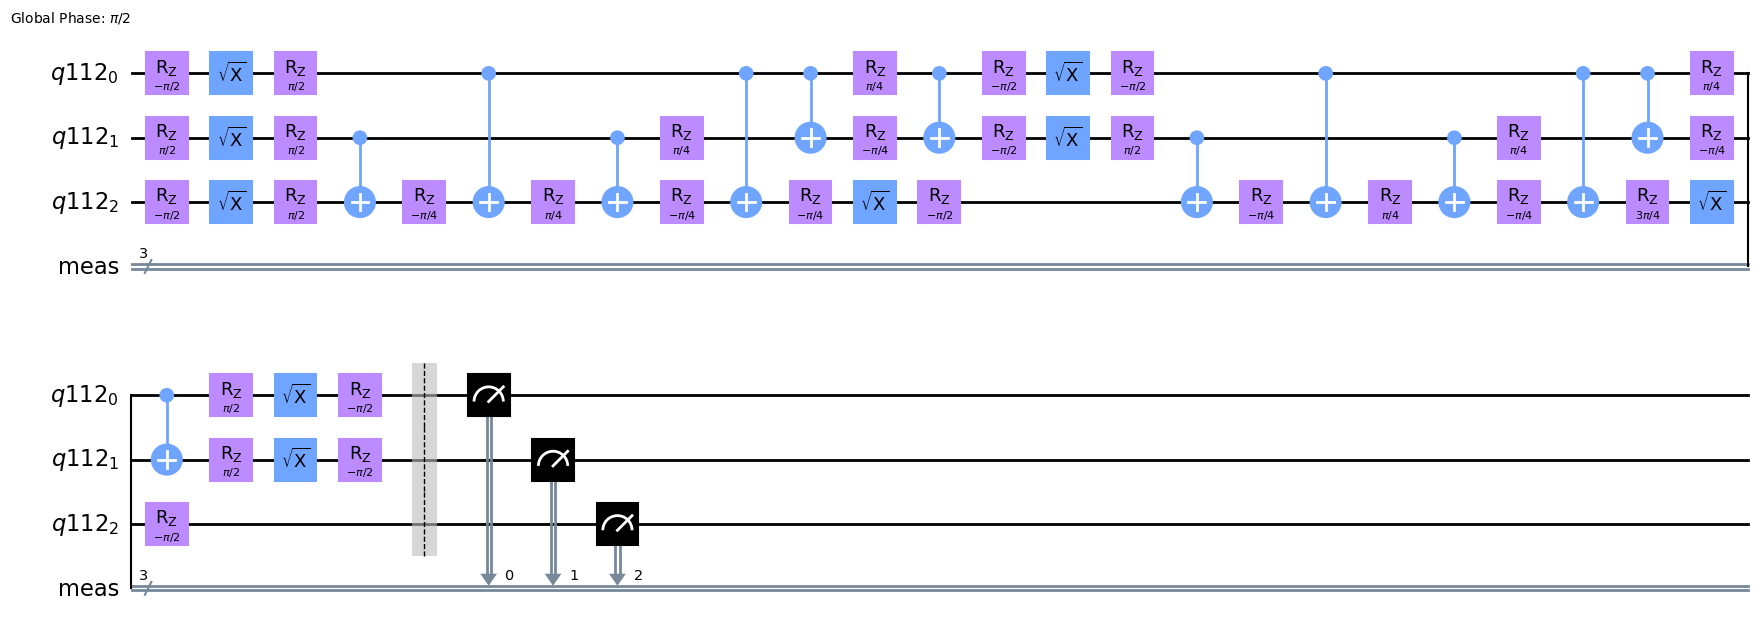

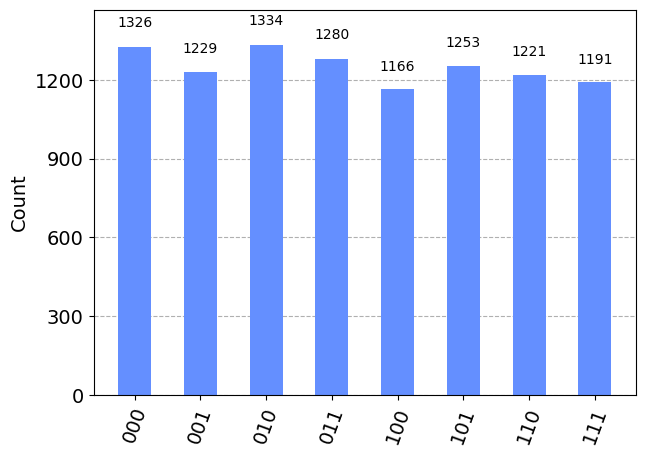

PROBABILIDAD DE ERROR:  0.17
noise model:  NoiseModel:
  Basis gates: ['cx', 'id', 'rz', 'sx', 'x']
  Instructions with noise: ['x', 'sx', 'rz', 'id']
  All-qubits errors: ['id', 'rz', 'sx', 'x']


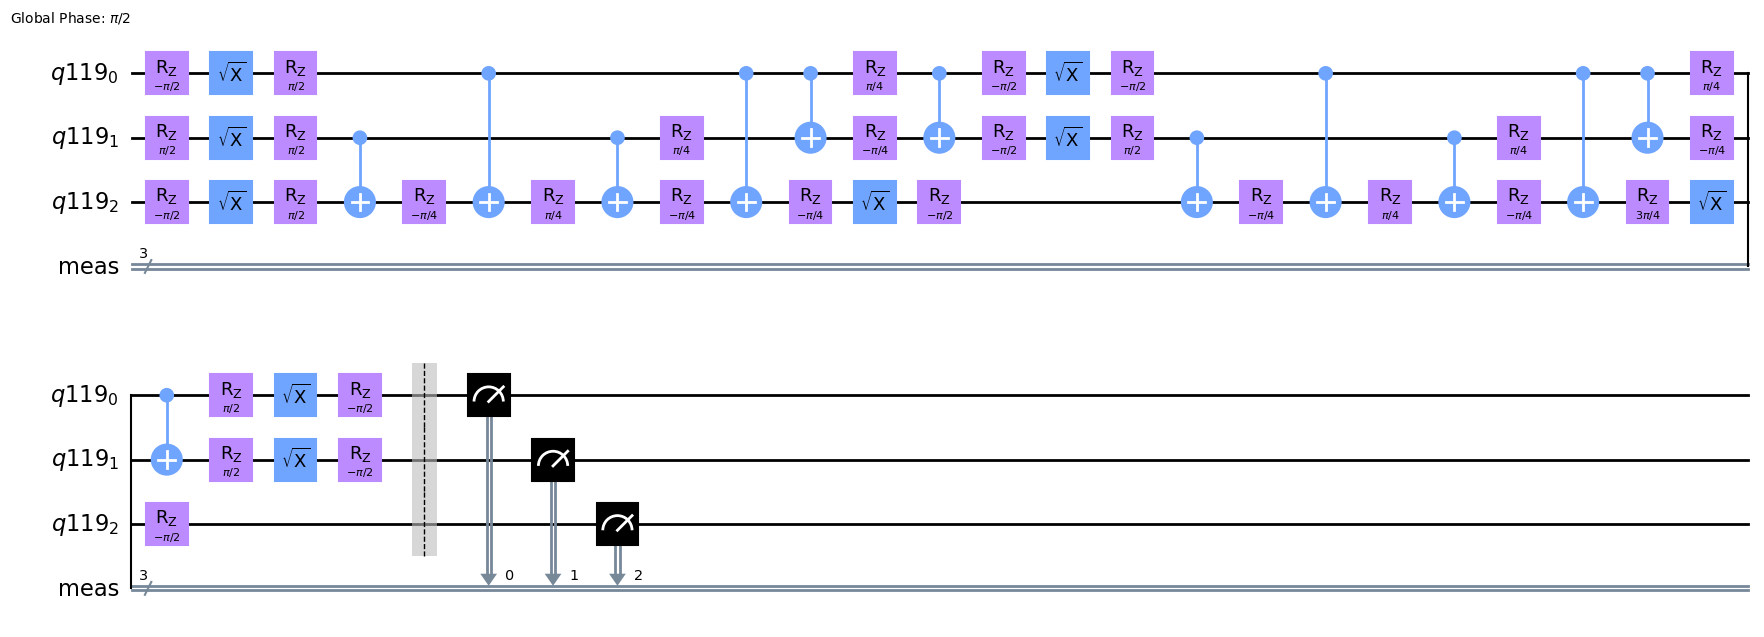

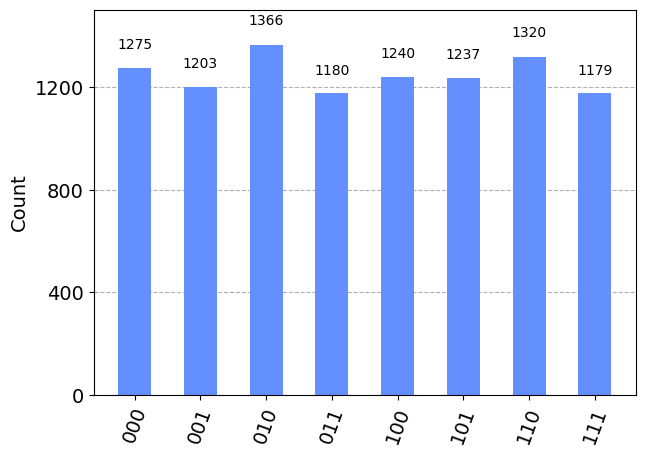

PROBABILIDAD DE ERROR:  0.18
noise model:  NoiseModel:
  Basis gates: ['cx', 'id', 'rz', 'sx', 'x']
  Instructions with noise: ['x', 'sx', 'rz', 'id']
  All-qubits errors: ['id', 'rz', 'sx', 'x']


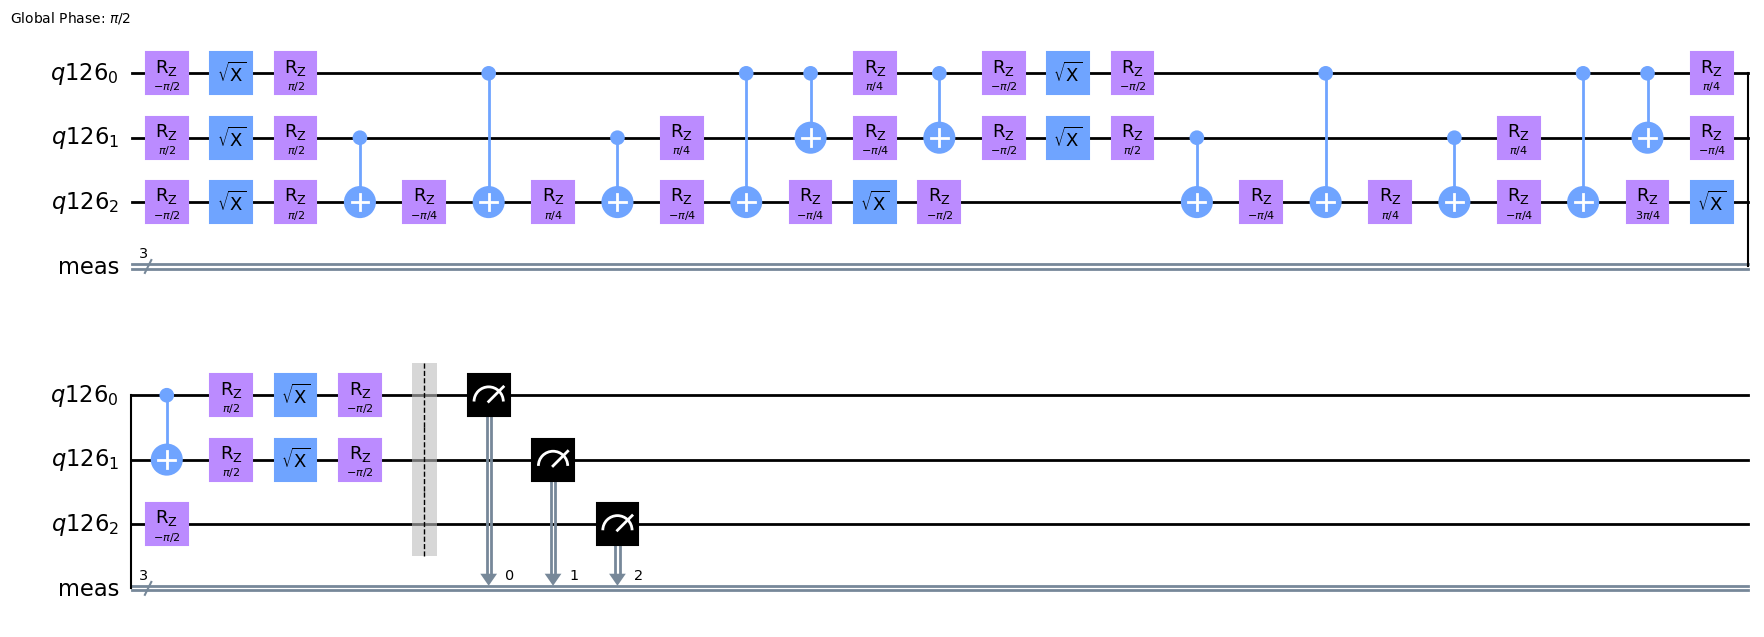

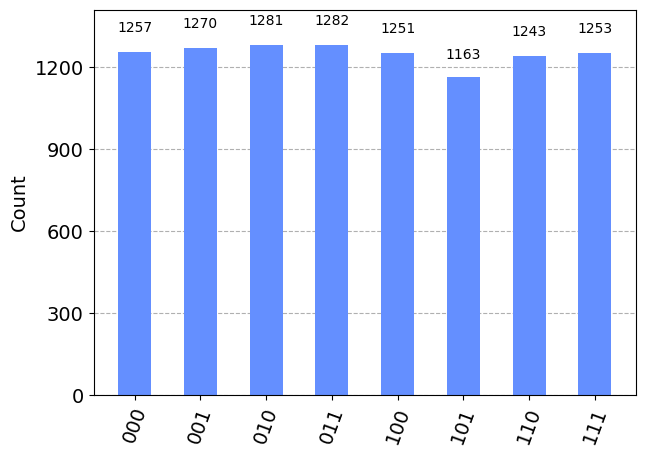

PROBABILIDAD DE ERROR:  0.19
noise model:  NoiseModel:
  Basis gates: ['cx', 'id', 'rz', 'sx', 'x']
  Instructions with noise: ['x', 'sx', 'rz', 'id']
  All-qubits errors: ['id', 'rz', 'sx', 'x']


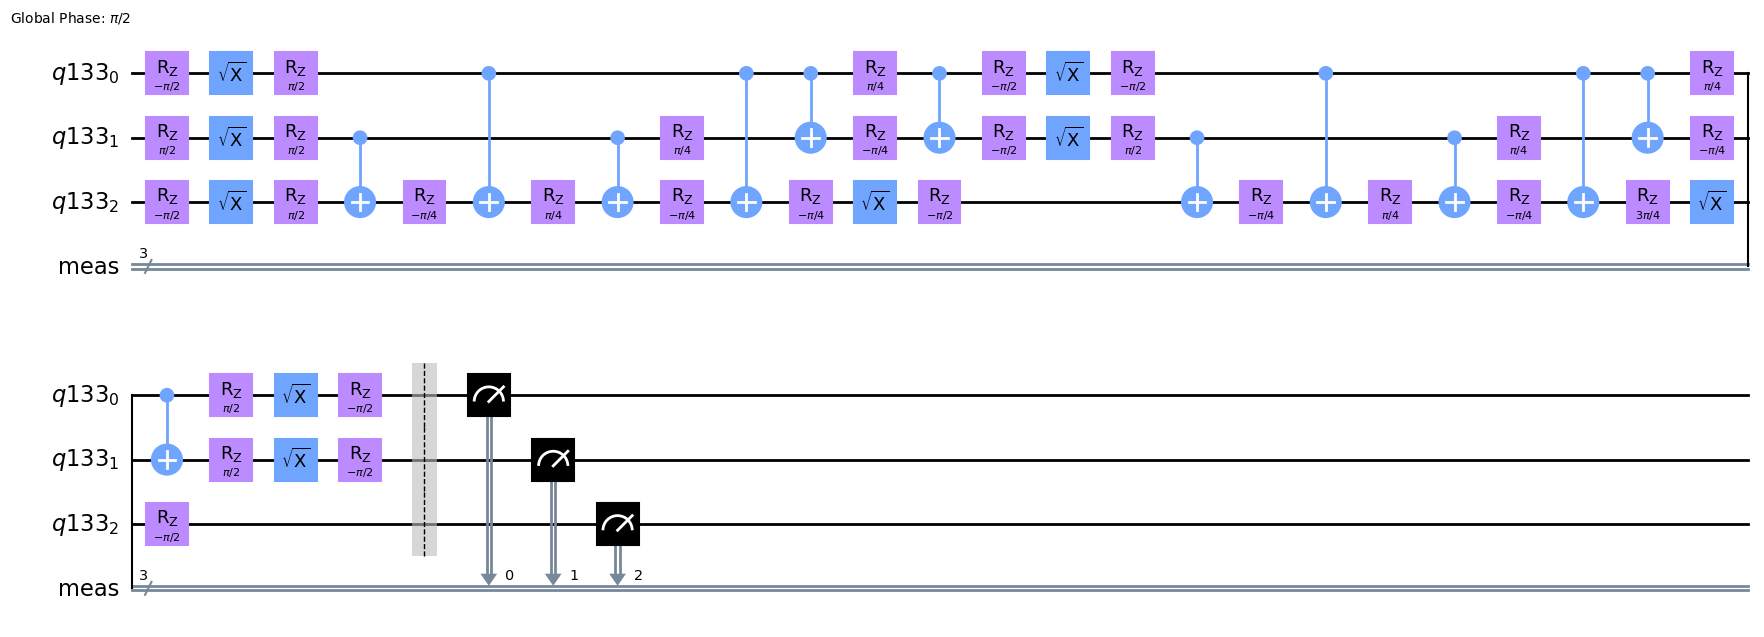

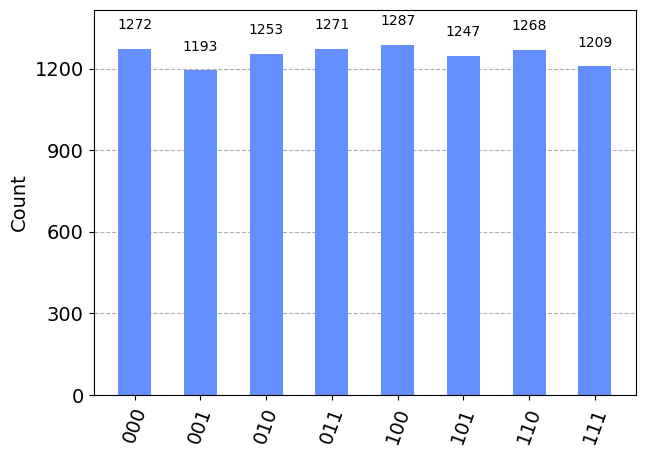

PROBABILIDAD DE ERROR:  0.2
noise model:  NoiseModel:
  Basis gates: ['cx', 'id', 'rz', 'sx', 'x']
  Instructions with noise: ['x', 'sx', 'rz', 'id']
  All-qubits errors: ['id', 'rz', 'sx', 'x']


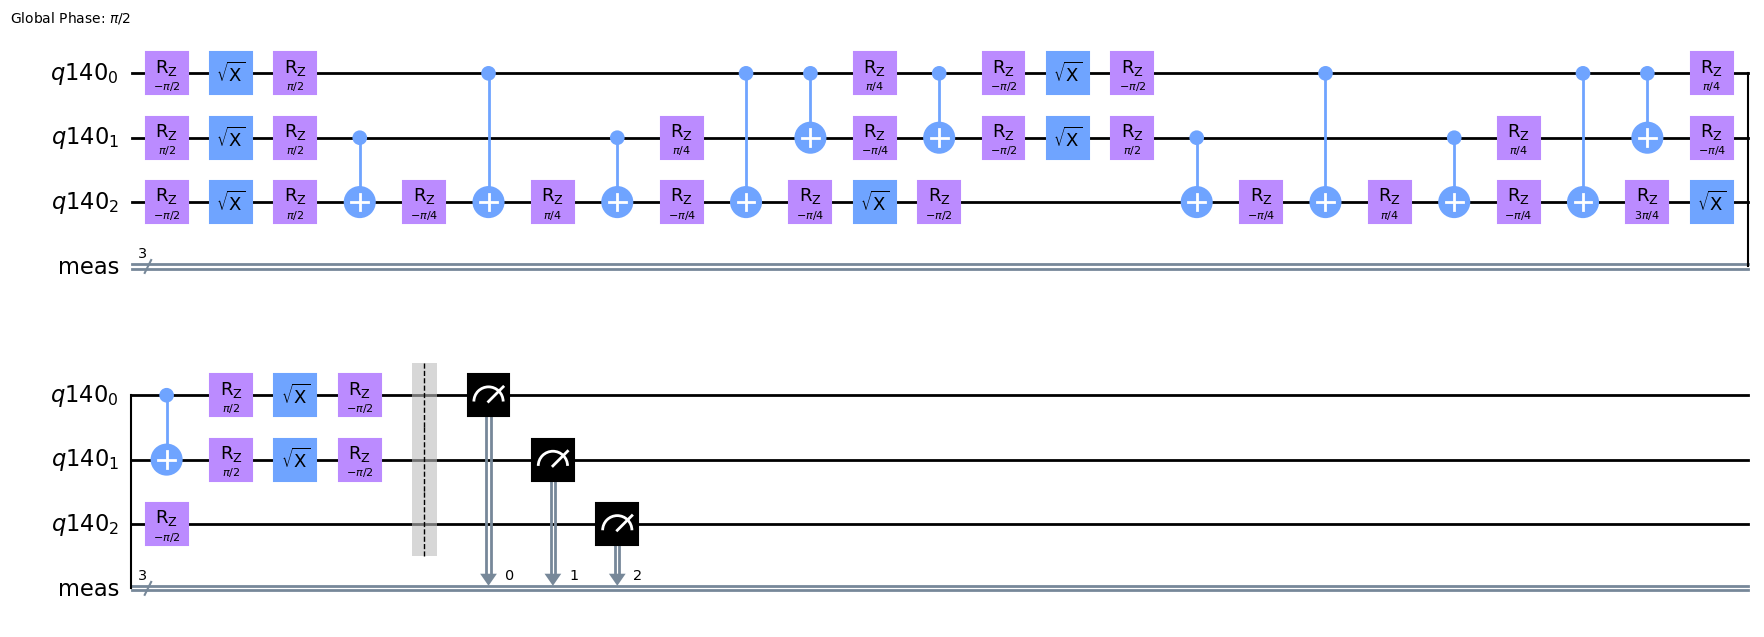

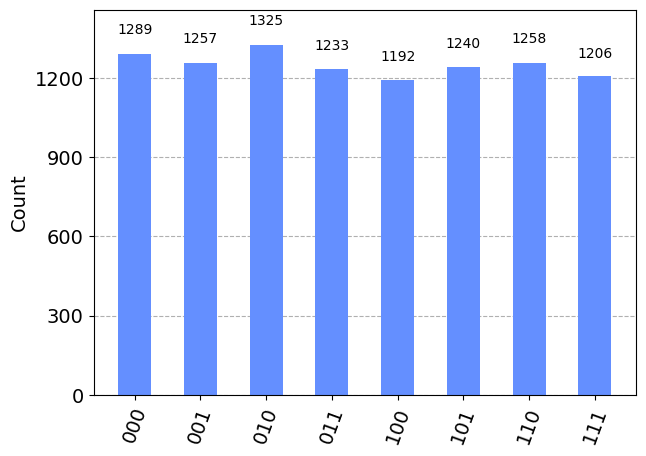

PROBABILIDAD DE ERROR:  0.21
noise model:  NoiseModel:
  Basis gates: ['cx', 'id', 'rz', 'sx', 'x']
  Instructions with noise: ['x', 'sx', 'rz', 'id']
  All-qubits errors: ['id', 'rz', 'sx', 'x']


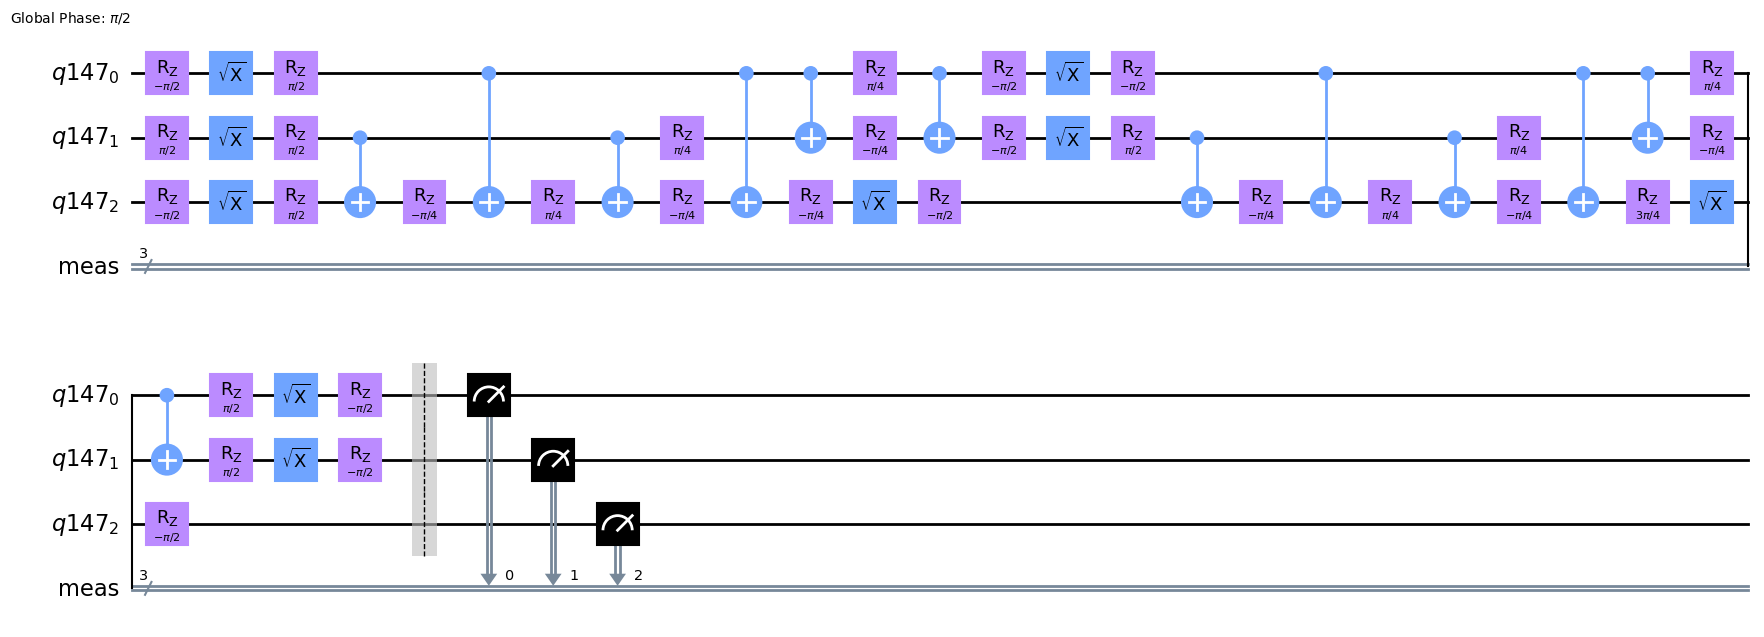

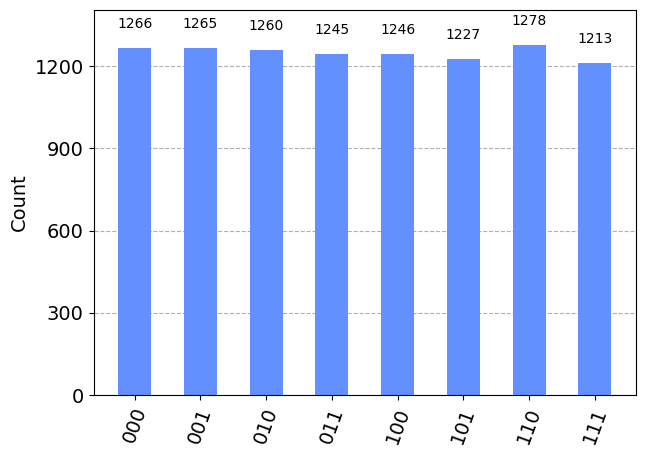

PROBABILIDAD DE ERROR:  0.22
noise model:  NoiseModel:
  Basis gates: ['cx', 'id', 'rz', 'sx', 'x']
  Instructions with noise: ['x', 'sx', 'rz', 'id']
  All-qubits errors: ['id', 'rz', 'sx', 'x']


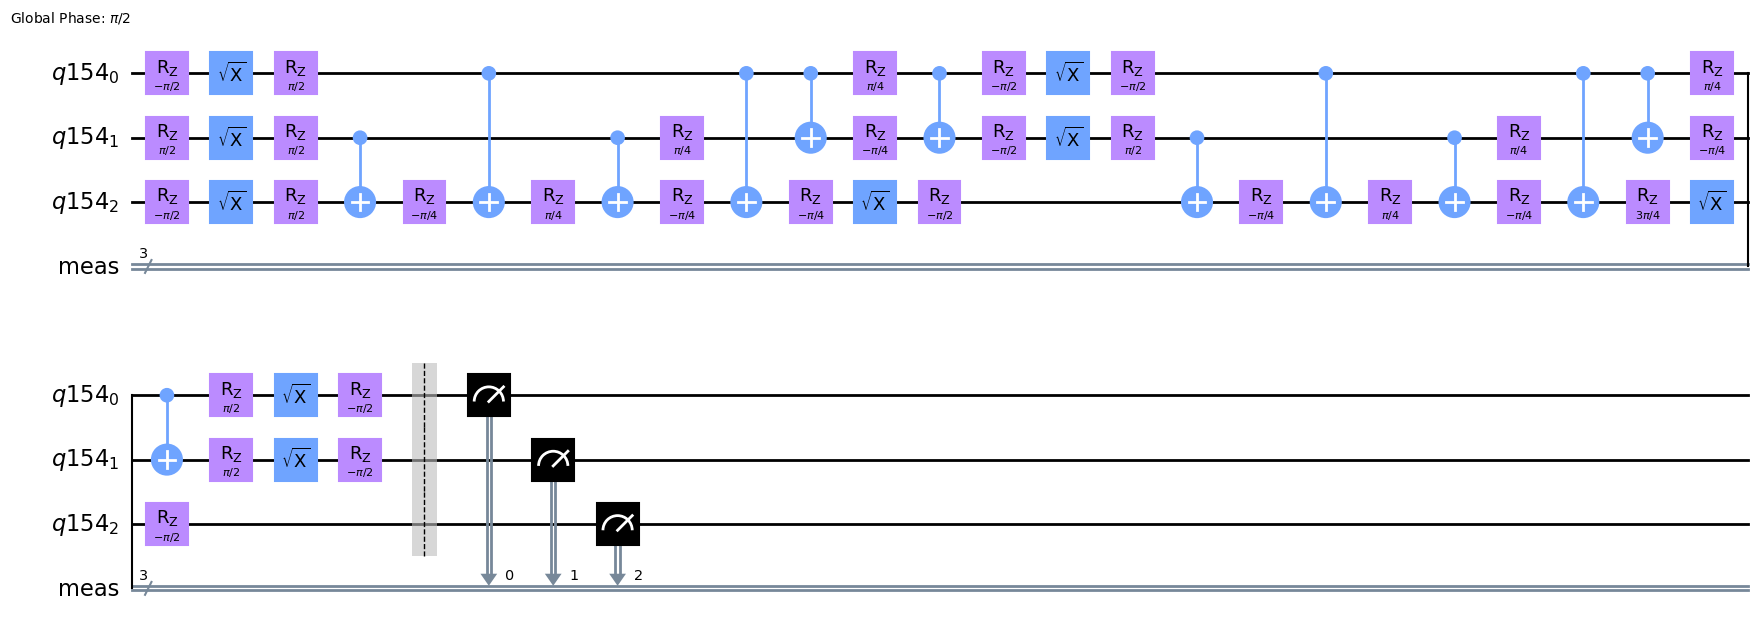

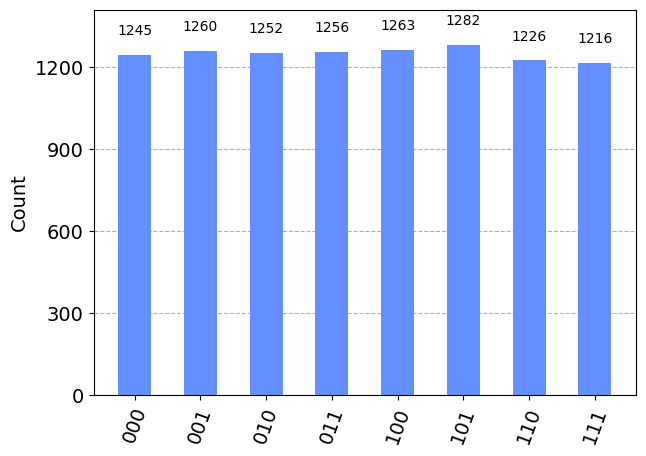

PROBABILIDAD DE ERROR:  0.23
noise model:  NoiseModel:
  Basis gates: ['cx', 'id', 'rz', 'sx', 'x']
  Instructions with noise: ['x', 'sx', 'rz', 'id']
  All-qubits errors: ['id', 'rz', 'sx', 'x']


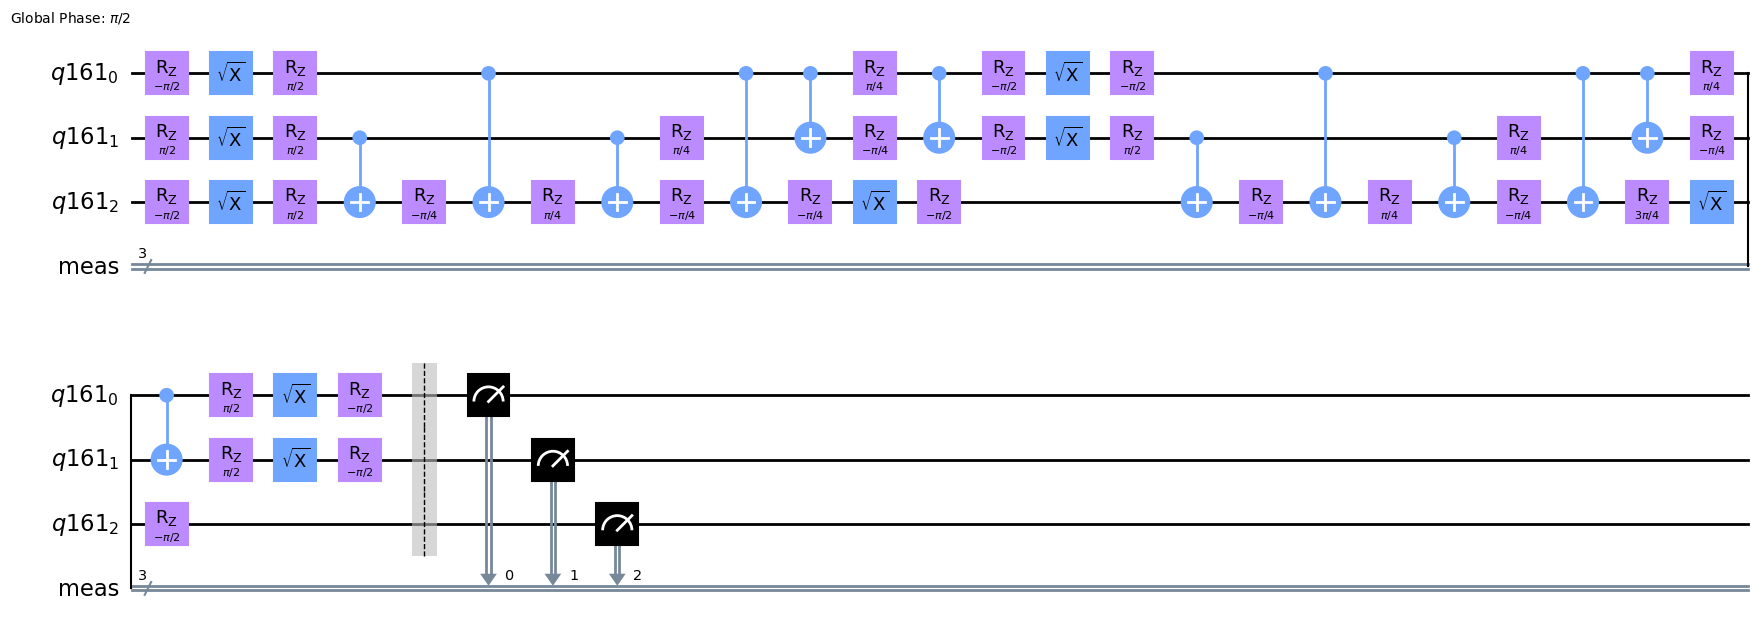

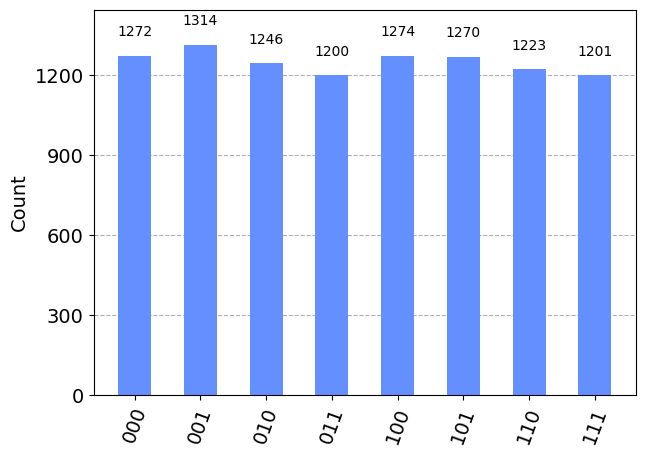

PROBABILIDAD DE ERROR:  0.24
noise model:  NoiseModel:
  Basis gates: ['cx', 'id', 'rz', 'sx', 'x']
  Instructions with noise: ['x', 'sx', 'rz', 'id']
  All-qubits errors: ['id', 'rz', 'sx', 'x']


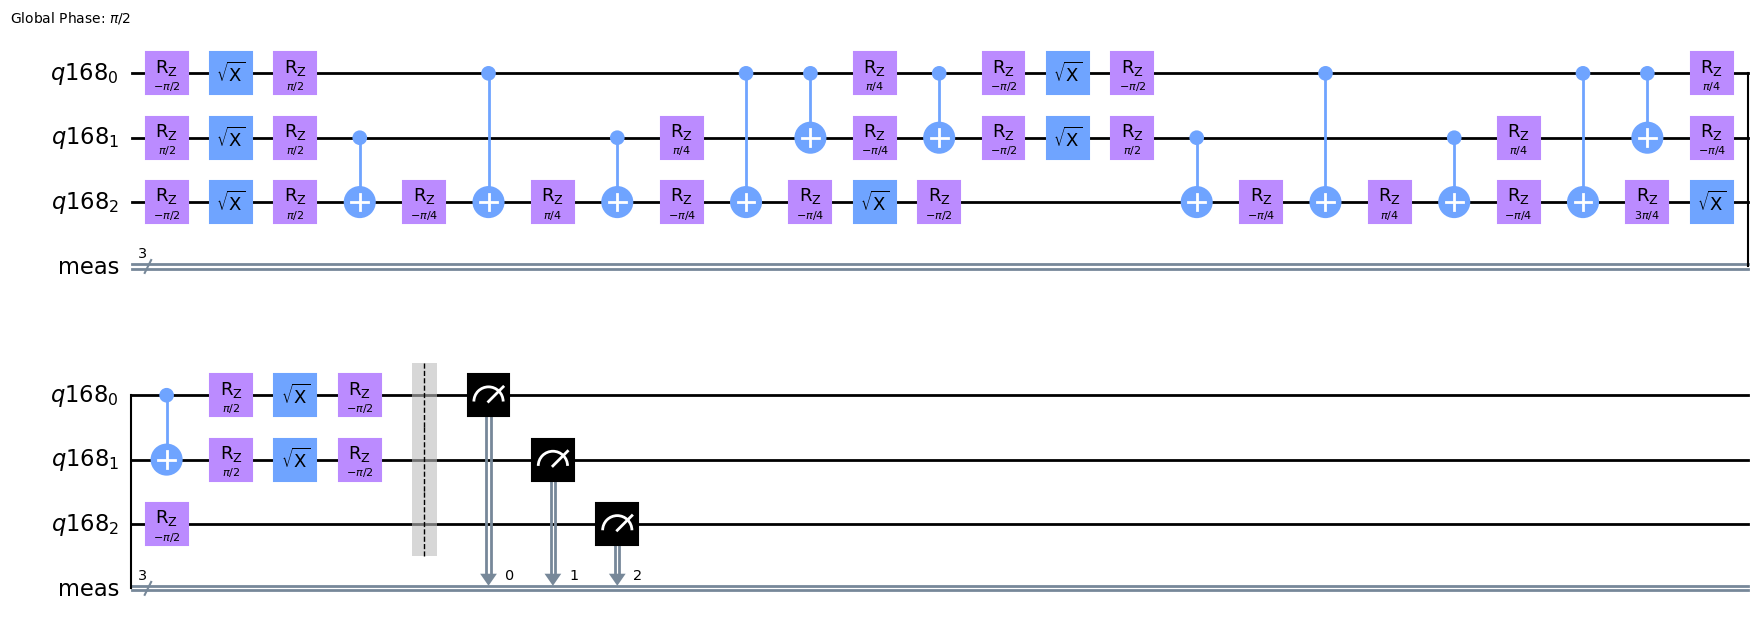

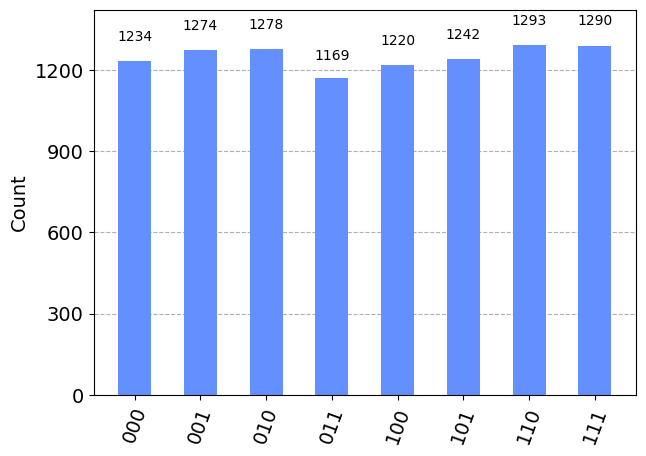

PROBABILIDAD DE ERROR:  0.25
noise model:  NoiseModel:
  Basis gates: ['cx', 'id', 'rz', 'sx', 'x']
  Instructions with noise: ['x', 'sx', 'rz', 'id']
  All-qubits errors: ['id', 'rz', 'sx', 'x']


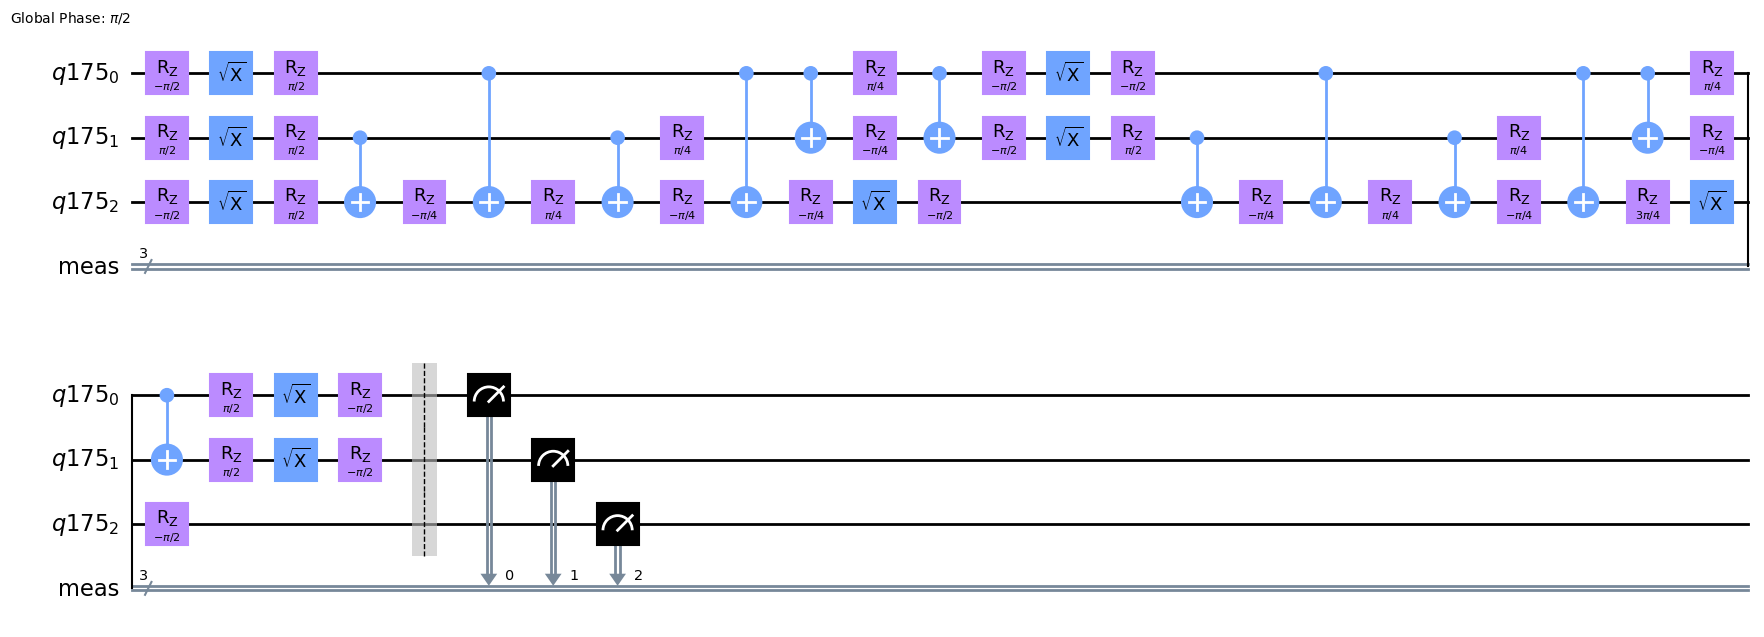

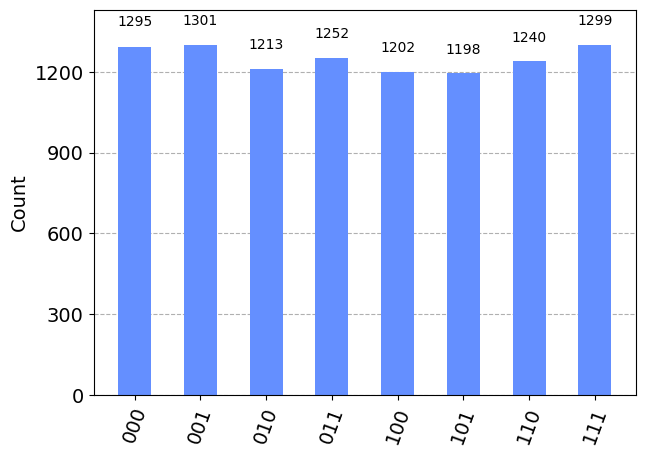

PROBABILIDAD DE ERROR:  0.26
noise model:  NoiseModel:
  Basis gates: ['cx', 'id', 'rz', 'sx', 'x']
  Instructions with noise: ['x', 'sx', 'rz', 'id']
  All-qubits errors: ['id', 'rz', 'sx', 'x']


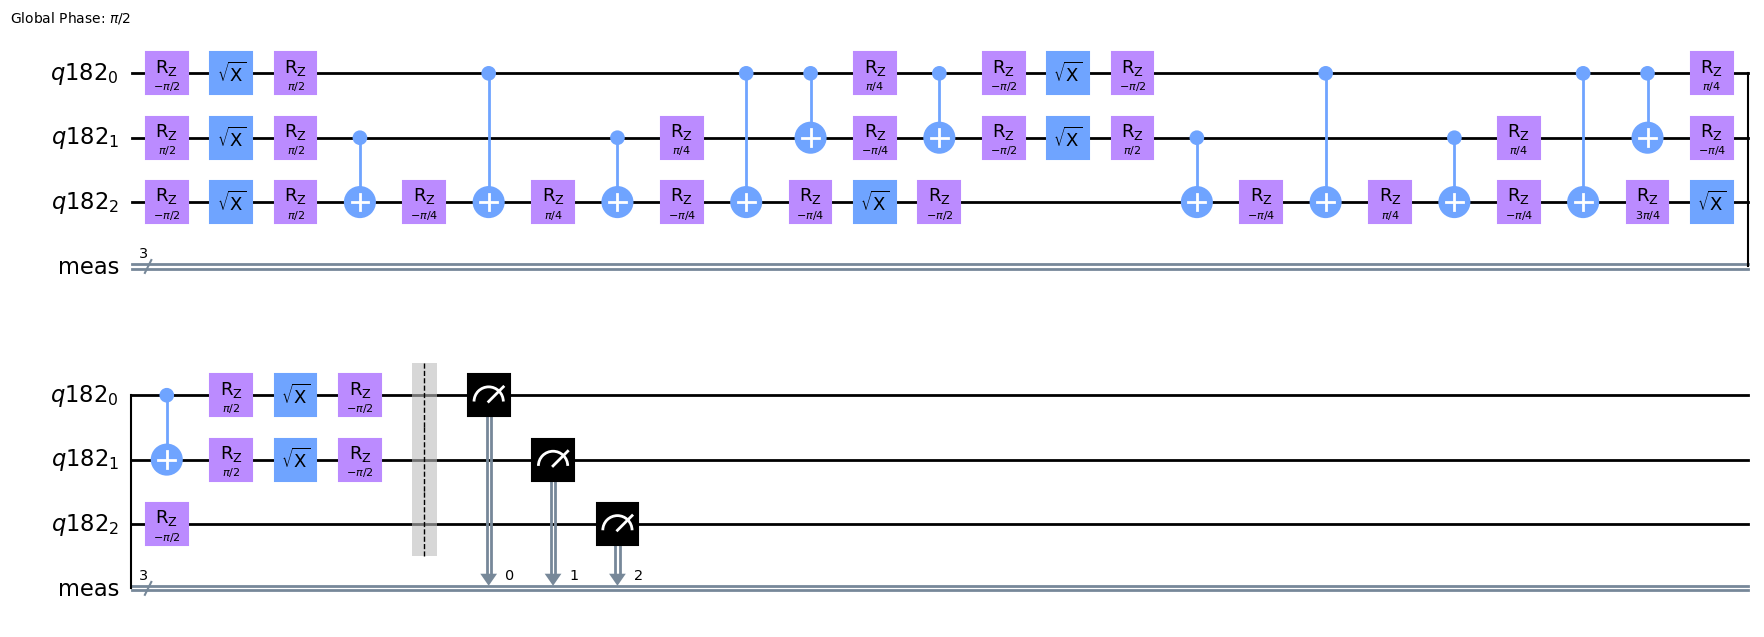

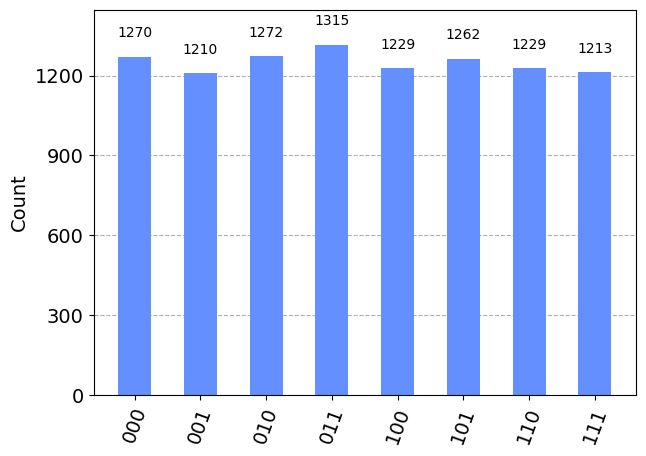

PROBABILIDAD DE ERROR:  0.27
noise model:  NoiseModel:
  Basis gates: ['cx', 'id', 'rz', 'sx', 'x']
  Instructions with noise: ['x', 'sx', 'rz', 'id']
  All-qubits errors: ['id', 'rz', 'sx', 'x']


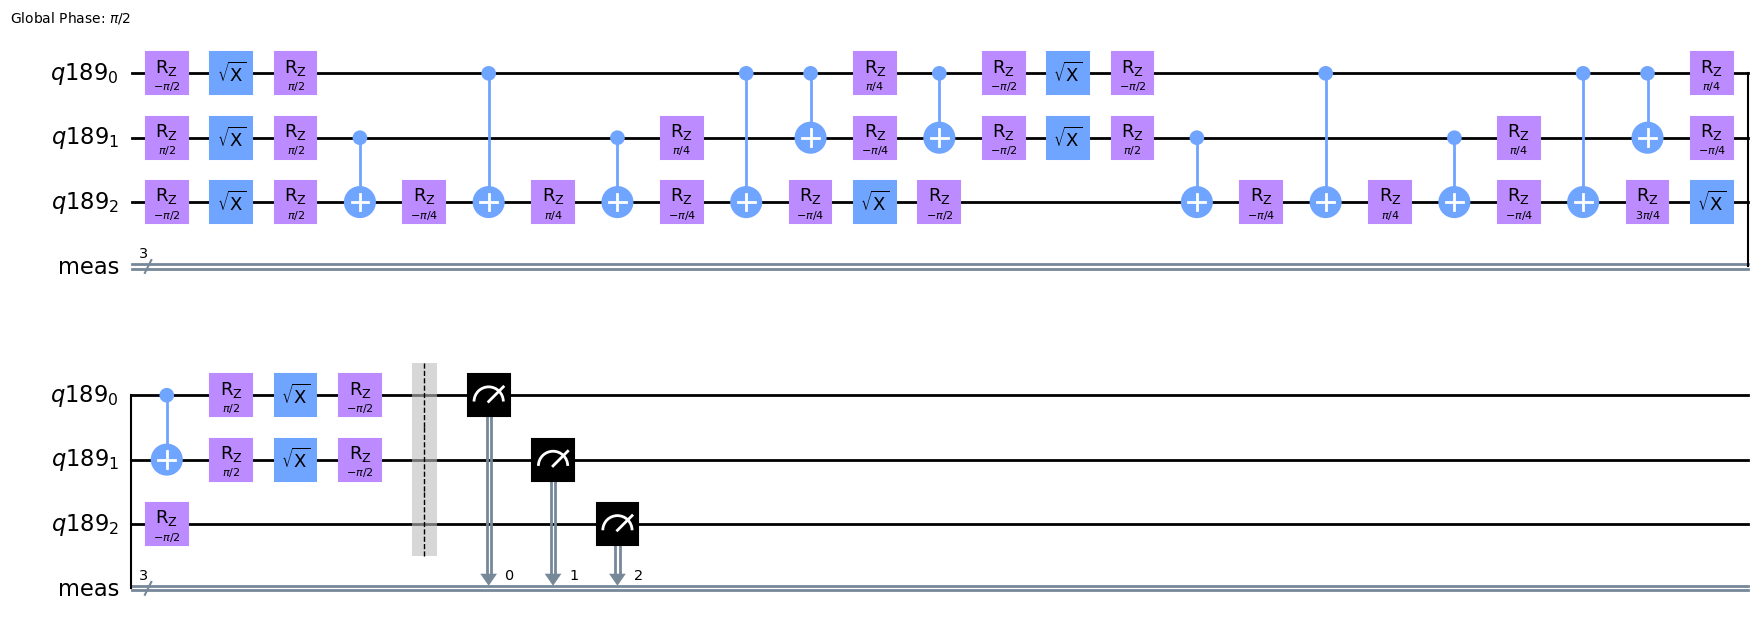

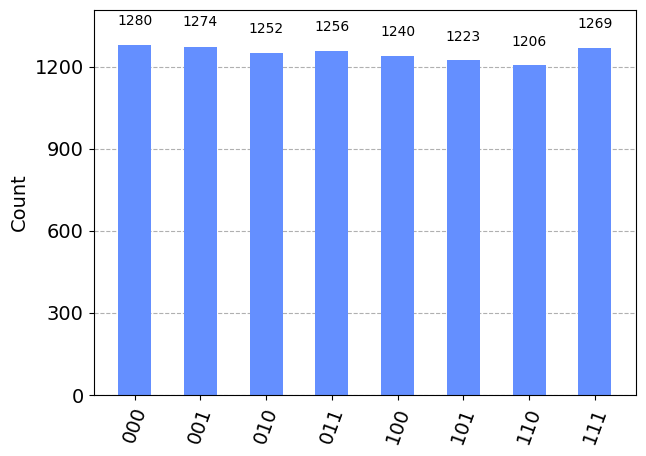

PROBABILIDAD DE ERROR:  0.28
noise model:  NoiseModel:
  Basis gates: ['cx', 'id', 'rz', 'sx', 'x']
  Instructions with noise: ['x', 'sx', 'rz', 'id']
  All-qubits errors: ['id', 'rz', 'sx', 'x']


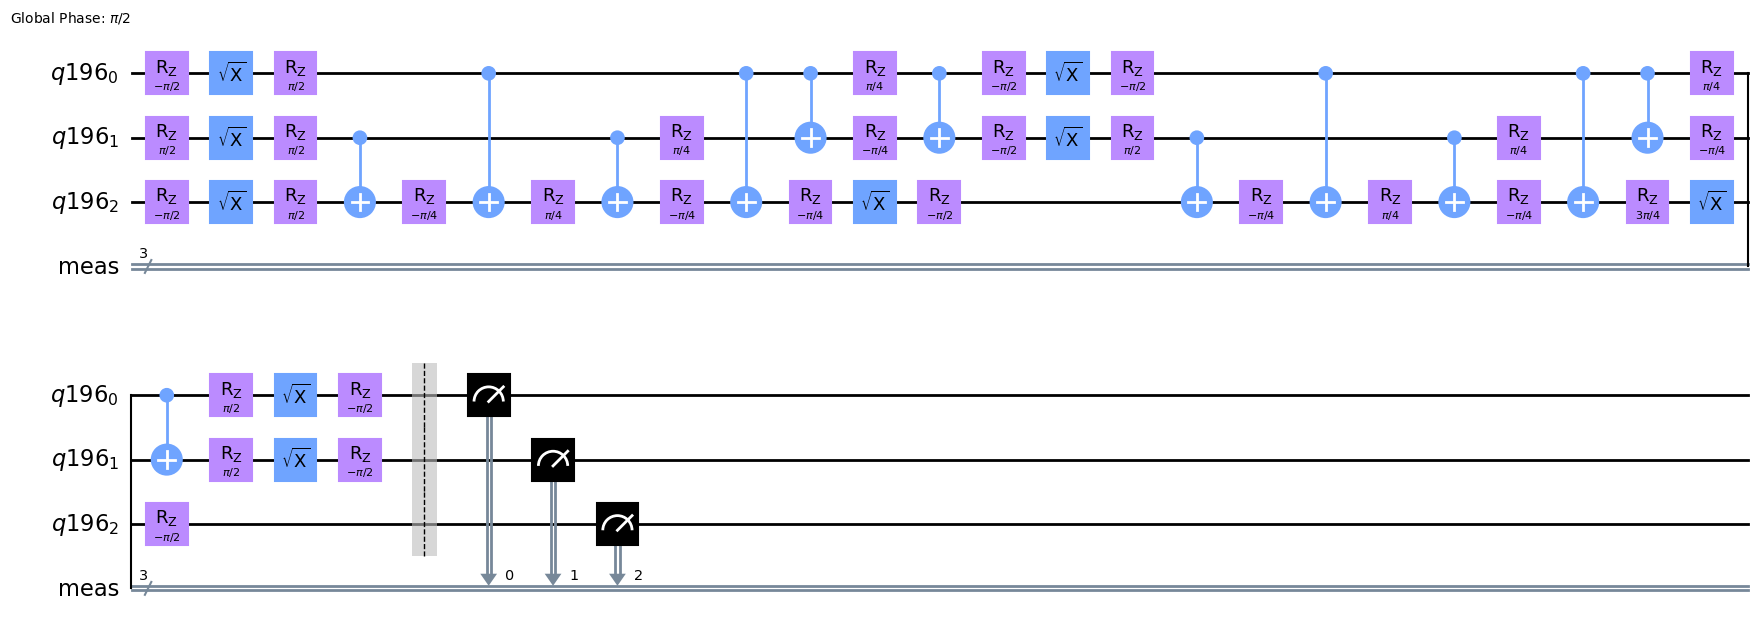

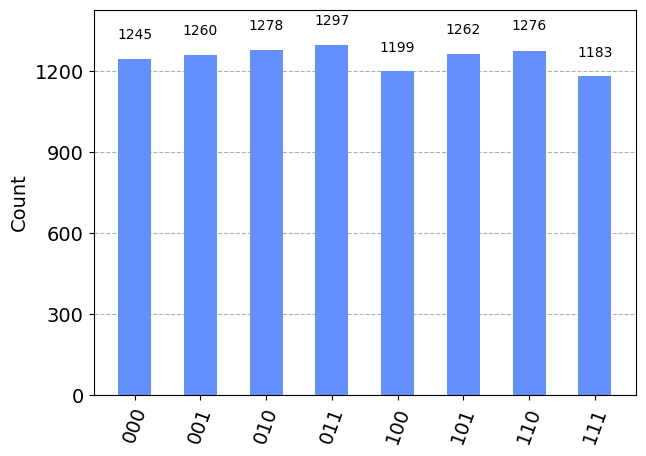

PROBABILIDAD DE ERROR:  0.29
noise model:  NoiseModel:
  Basis gates: ['cx', 'id', 'rz', 'sx', 'x']
  Instructions with noise: ['x', 'sx', 'rz', 'id']
  All-qubits errors: ['id', 'rz', 'sx', 'x']


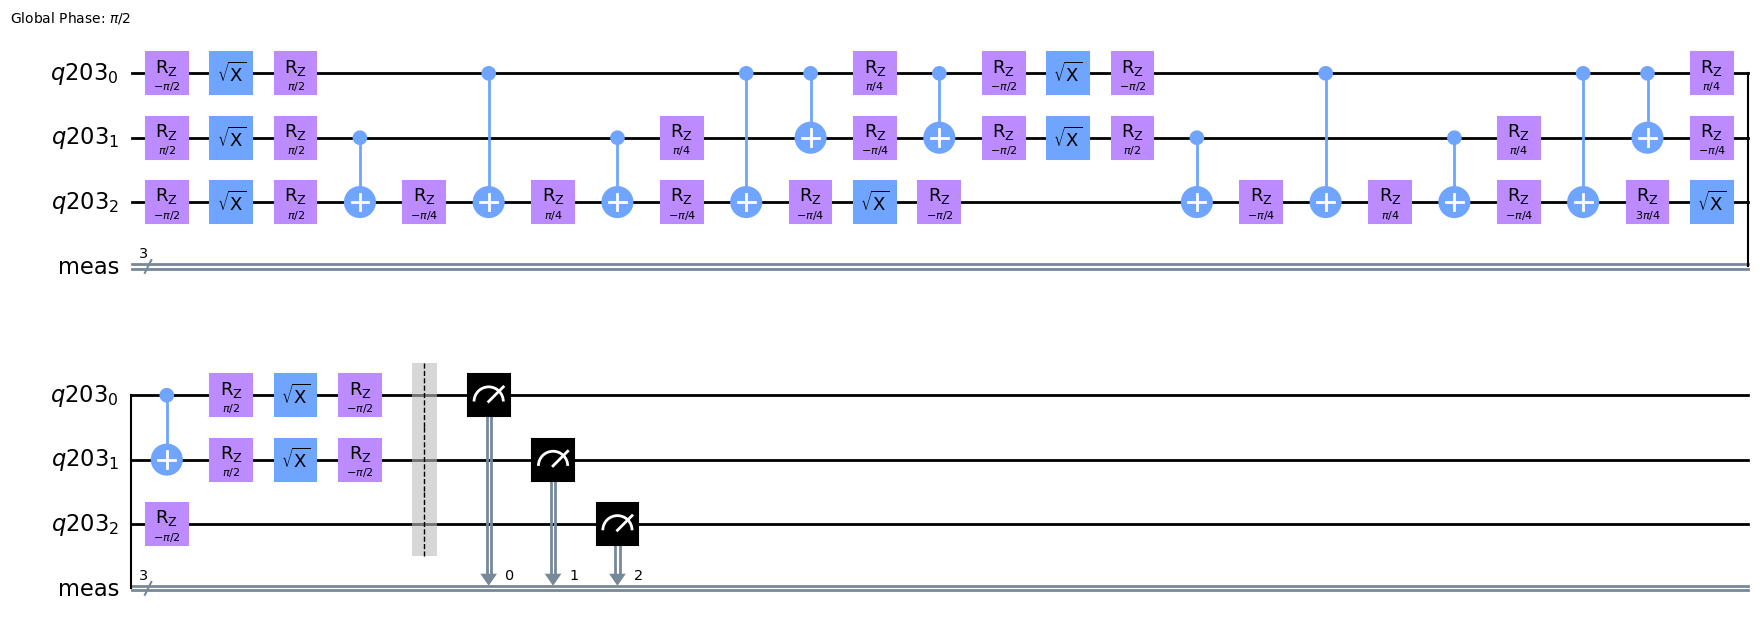

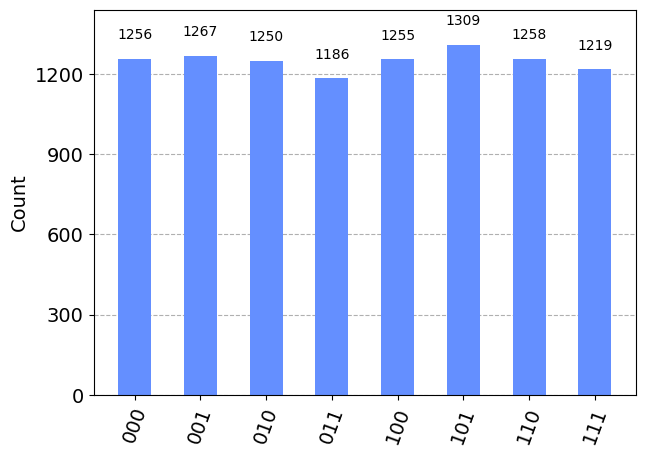

PROBABILIDAD DE ERROR:  0.3
noise model:  NoiseModel:
  Basis gates: ['cx', 'id', 'rz', 'sx', 'x']
  Instructions with noise: ['x', 'sx', 'rz', 'id']
  All-qubits errors: ['id', 'rz', 'sx', 'x']


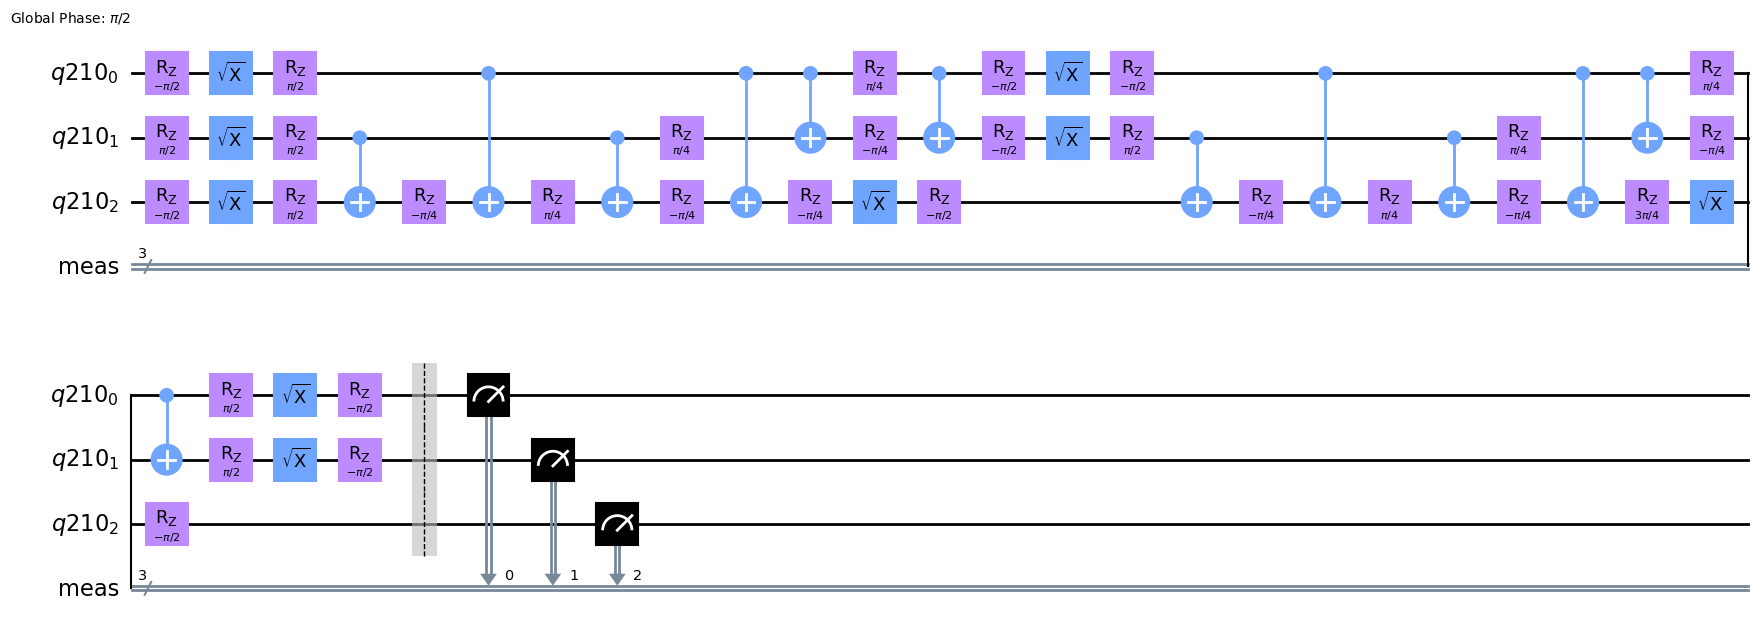

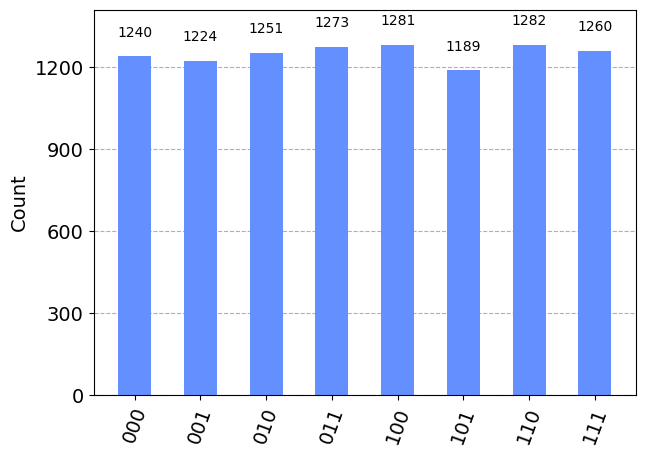

In [6]:
results = []
for i in errorProbabilities:
    #ALGORITMO
    print('PROBABILIDAD DE ERROR: ',i)
     
    noiseModel = add_one_qubit_depolarizing_error(NoiseModel(),i)
    print('noise model: ',noiseModel)
        
    qr = QuantumRegister(nroQubits)
    qc = QuantumCircuit(qr)
    qc.h(qr)
    qc.compose(groverOp.decompose(), inplace=True)
    qc.measure_all()
    #display(qc.draw("mpl"))
    #display(qc.data)
    
    #EJECUCION
    sim_noise = AerSimulator(noise_model=noiseModel)
    circ_tnoise = transpile(qc, sim_noise,basis_gates=basis_gates)
    display(circ_tnoise.draw('mpl'))
    result_bit_flip = sim_noise.run(circ_tnoise,shots=shots).result()
    counts_bit_flip = result_bit_flip.get_counts(0)
    display(plot_histogram(counts_bit_flip))
        
    results.append(counts_bit_flip)

In [16]:
#CALCULO DE PROBABILIDADES DE EXITO PARA CADA EXPERIMENTO
successCounts1=[]
for i in results:
    currentCount = 0
    for j in marked_states:
        currentCount = currentCount + i[j]
    successCounts1.append(currentCount/shots)
#print(successCounts1)

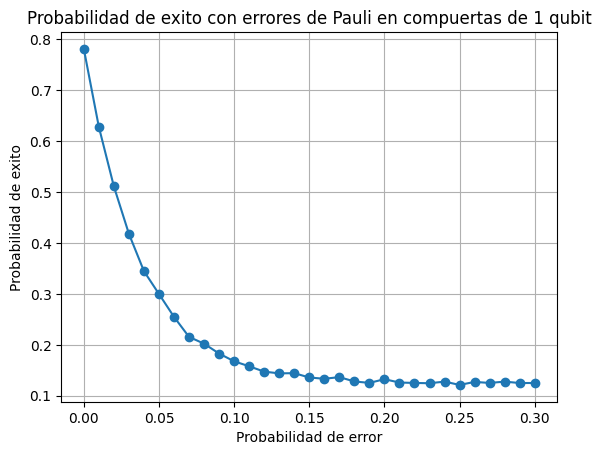

In [8]:
# Crear el gráfico
plt.plot(errorProbabilities, successCounts1, marker='o', linestyle='-')

# Etiquetas de los ejes
plt.xlabel('Probabilidad de error')
plt.ylabel('Probabilidad de exito')

# Título del gráfico
plt.title('Probabilidad de exito con errores de Pauli en compuertas de 1 qubit')

# Mostrar el gráfico
plt.grid(True)
plt.show()

In [9]:
#CALCULO DE CANTIDAD DE COMPUERTAS UTILIZADAS
#display(circ_tnoise.count_ops())
ops = circ_tnoise.count_ops()
single_qubit_ops = ops['rz']+ops['sx']
a.append(single_qubit_ops)
print('-----------------------------------------------------------')
print('Cantidad de compuertas de 1 qubit: ',single_qubit_ops)
print('-----------------------------------------------------------')

-----------------------------------------------------------
Cantidad de compuertas de 1 qubit:  39
-----------------------------------------------------------


### 4.2   Errores de depolarizacion en compuertas de 2 qubits

PROBABILIDAD DE ERROR:  0.0
noise model:  NoiseModel: Ideal


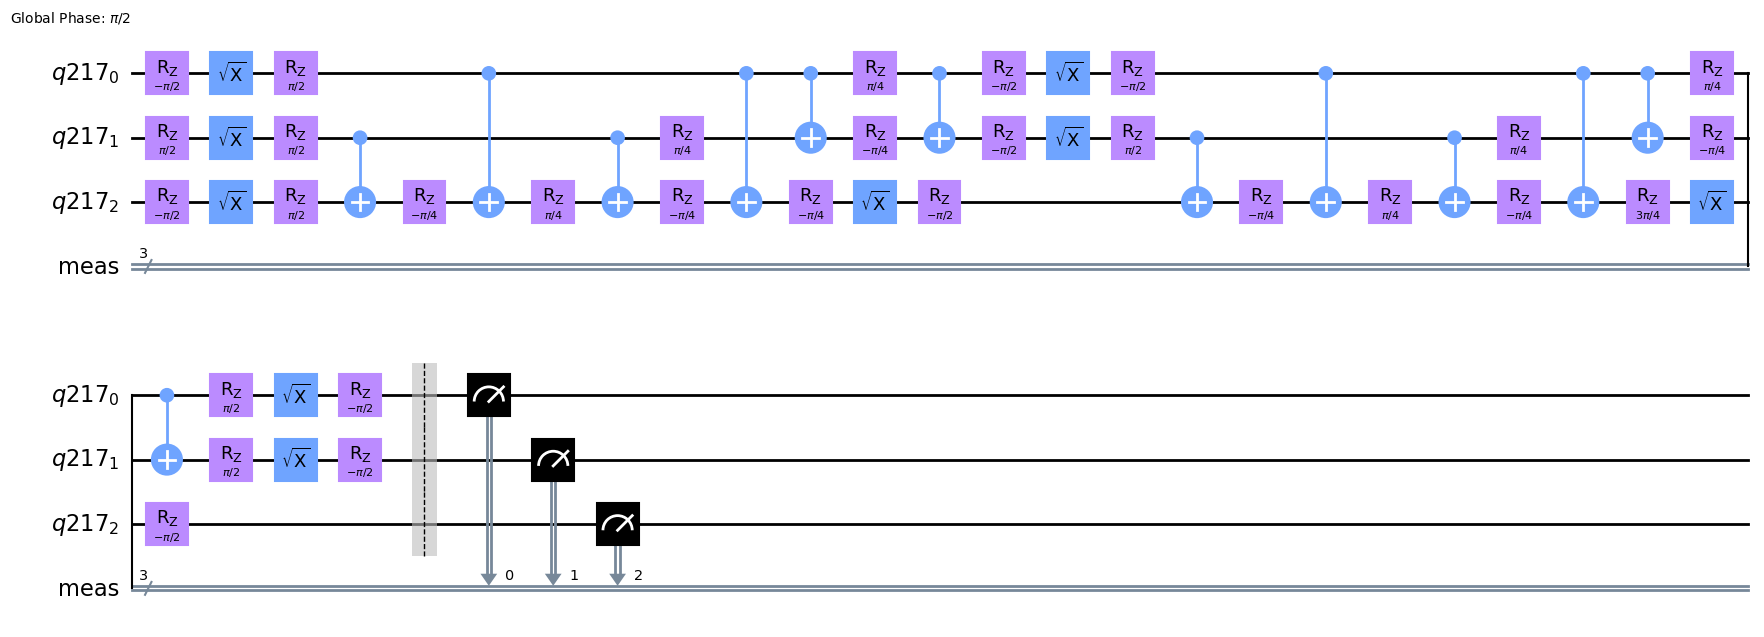

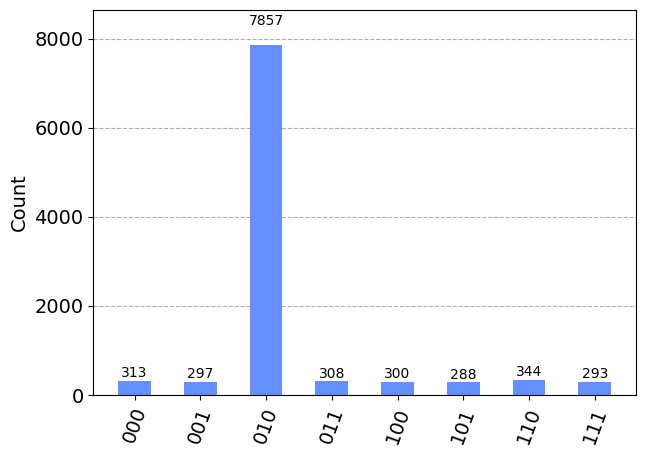

PROBABILIDAD DE ERROR:  0.01
noise model:  NoiseModel:
  Basis gates: ['cx', 'id', 'rz', 'sx']
  Instructions with noise: ['cx']
  All-qubits errors: ['cx']


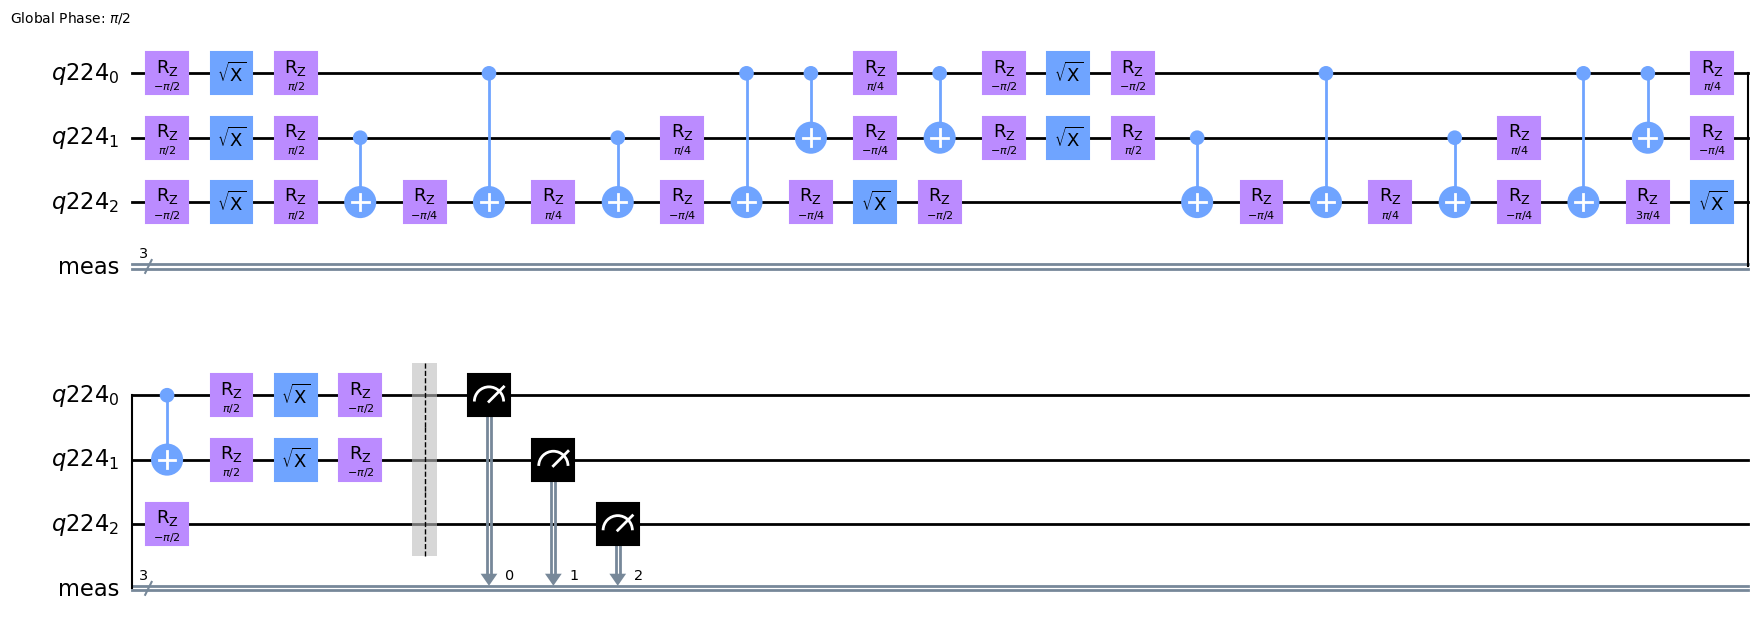

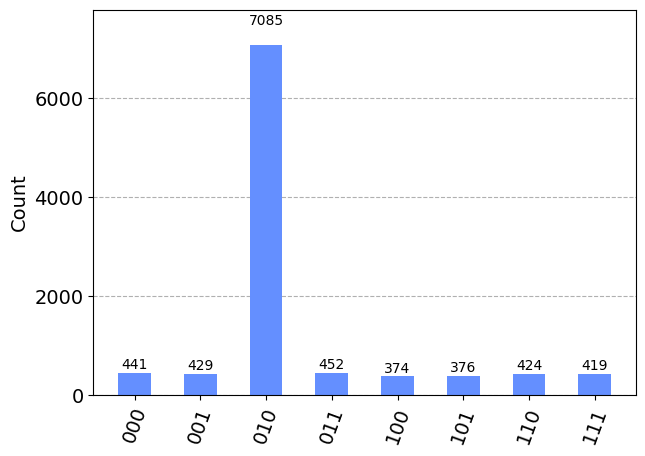

PROBABILIDAD DE ERROR:  0.02
noise model:  NoiseModel:
  Basis gates: ['cx', 'id', 'rz', 'sx']
  Instructions with noise: ['cx']
  All-qubits errors: ['cx']


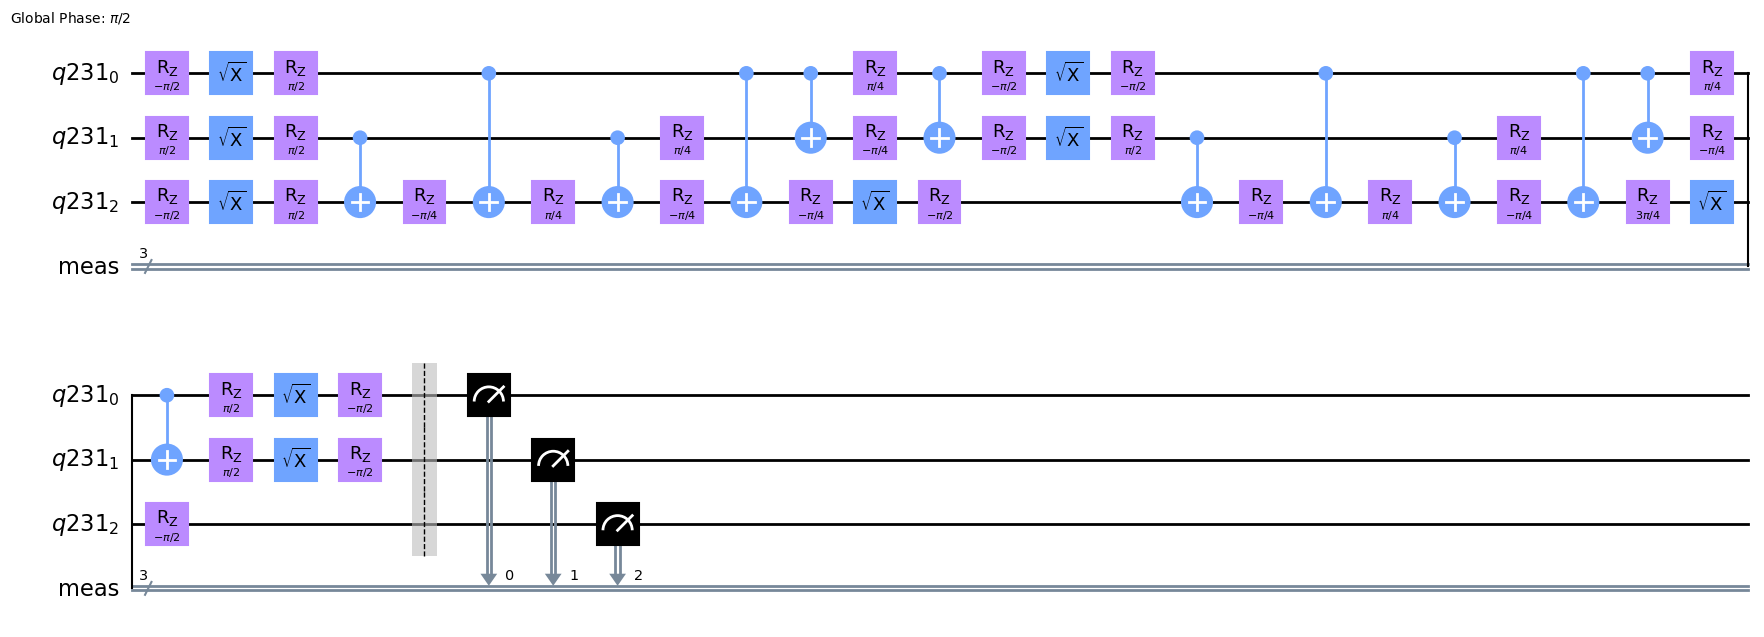

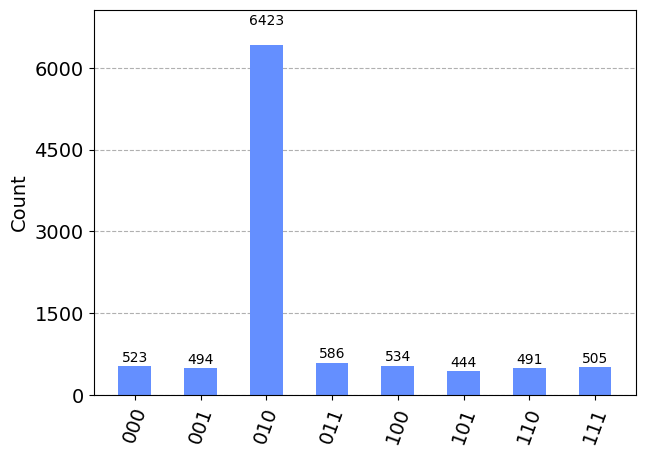

PROBABILIDAD DE ERROR:  0.03
noise model:  NoiseModel:
  Basis gates: ['cx', 'id', 'rz', 'sx']
  Instructions with noise: ['cx']
  All-qubits errors: ['cx']


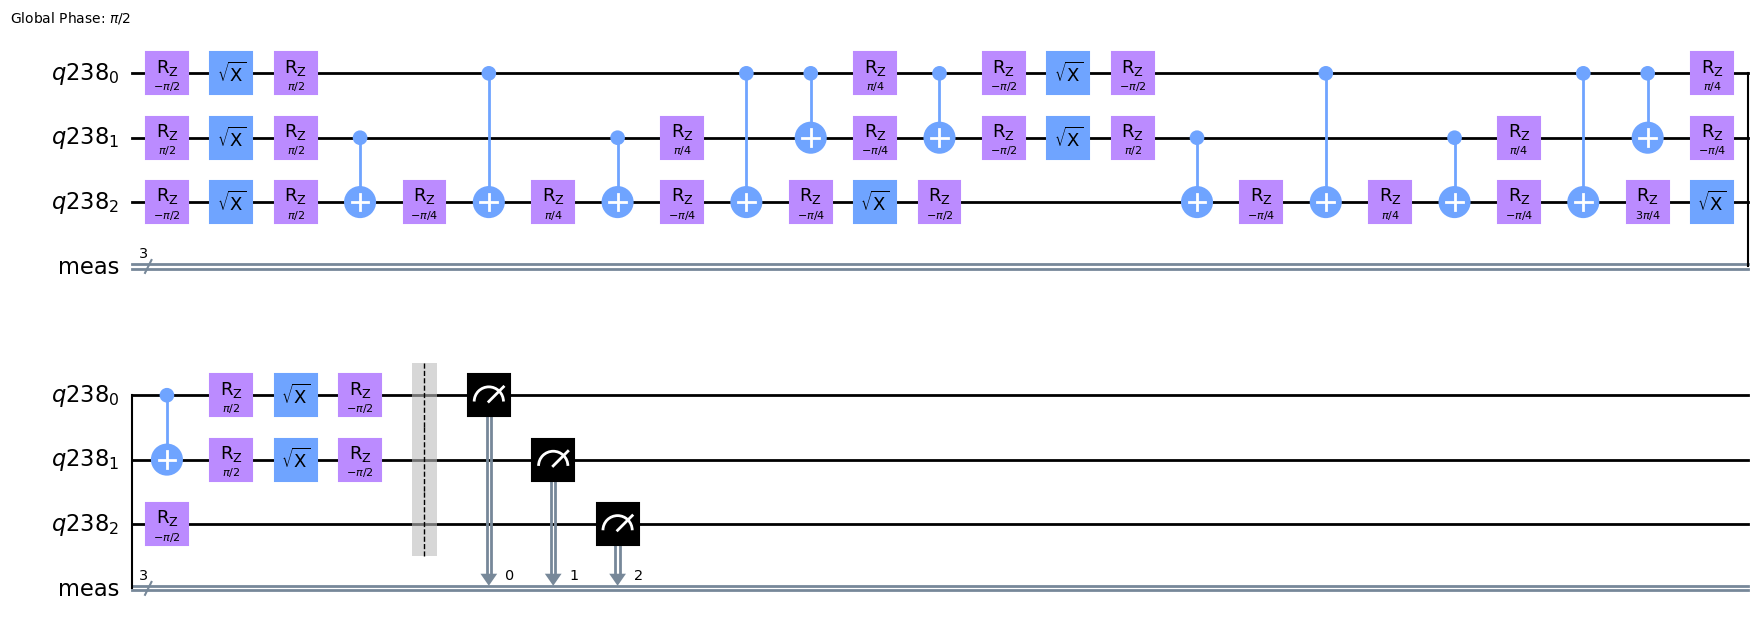

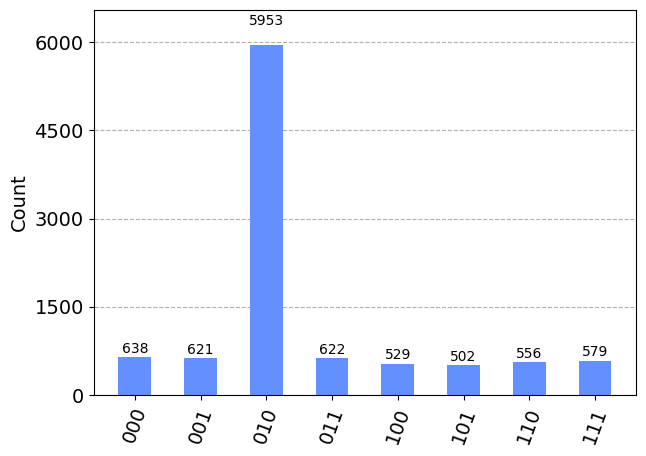

PROBABILIDAD DE ERROR:  0.04
noise model:  NoiseModel:
  Basis gates: ['cx', 'id', 'rz', 'sx']
  Instructions with noise: ['cx']
  All-qubits errors: ['cx']


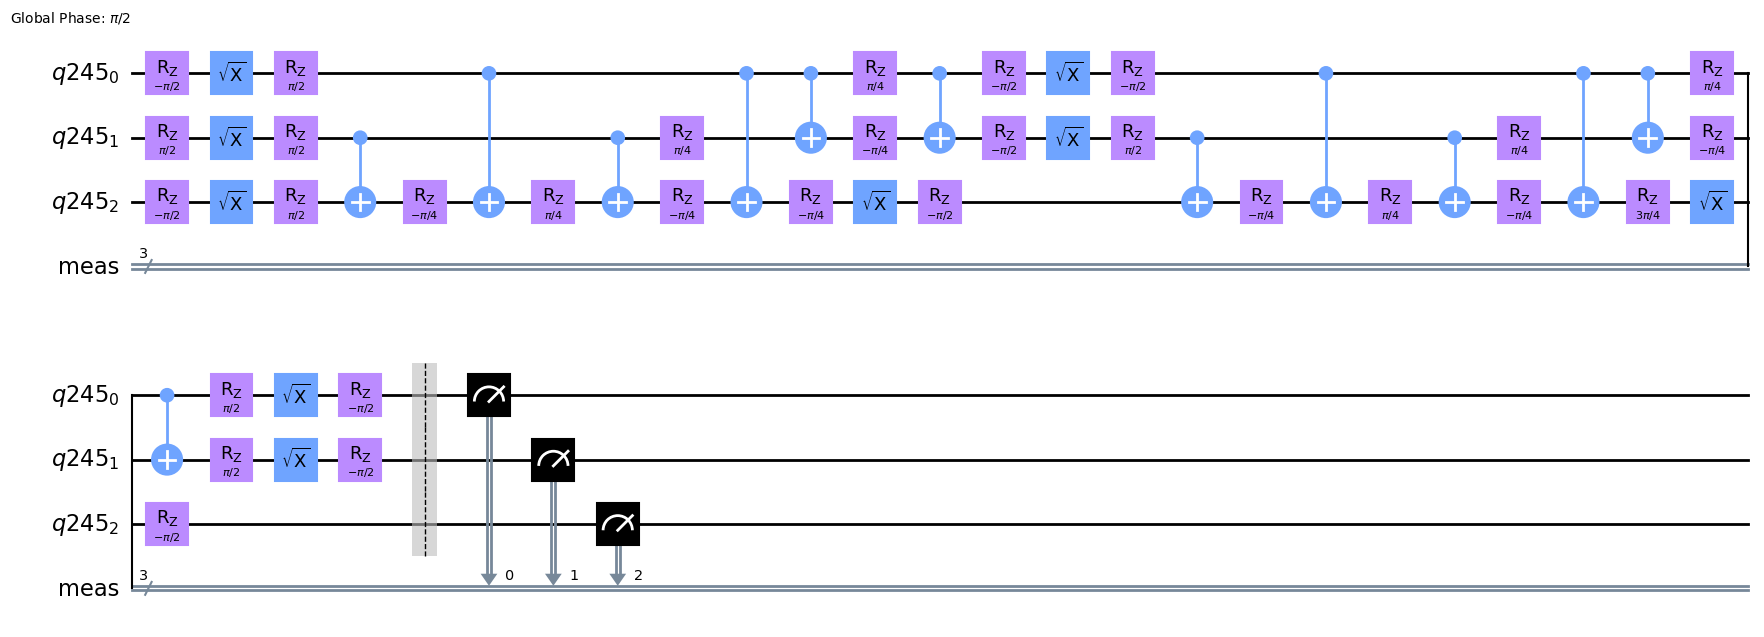

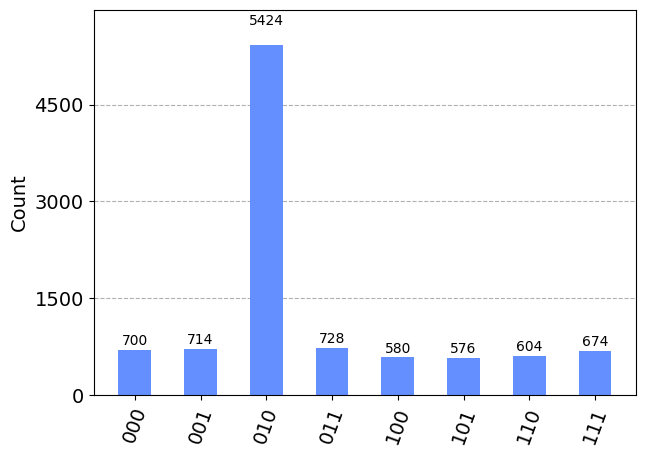

PROBABILIDAD DE ERROR:  0.05
noise model:  NoiseModel:
  Basis gates: ['cx', 'id', 'rz', 'sx']
  Instructions with noise: ['cx']
  All-qubits errors: ['cx']


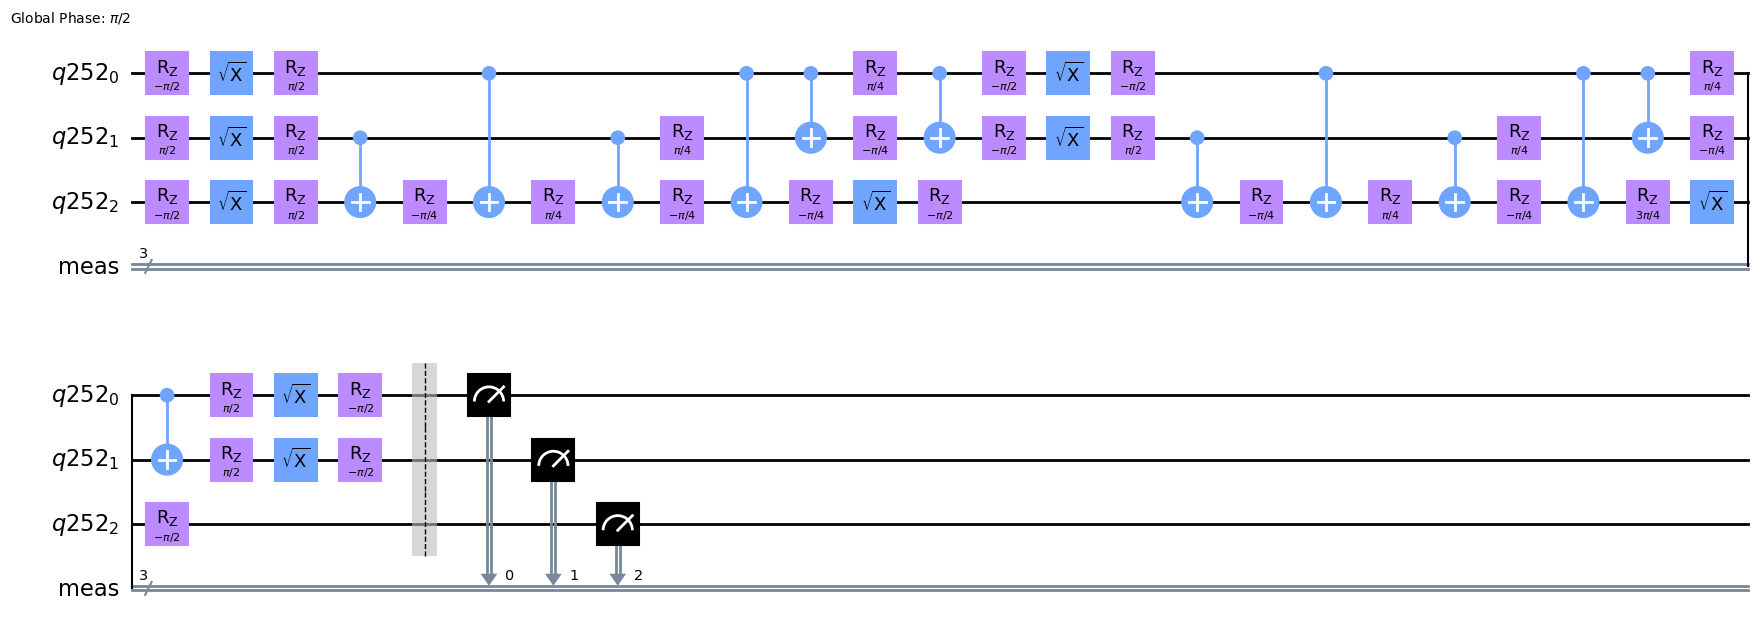

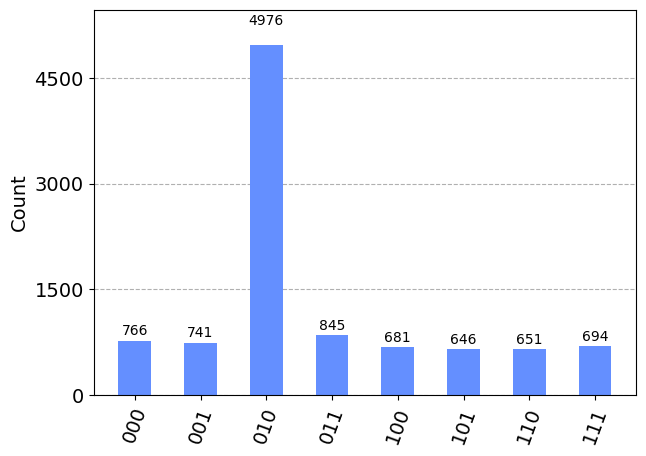

PROBABILIDAD DE ERROR:  0.06
noise model:  NoiseModel:
  Basis gates: ['cx', 'id', 'rz', 'sx']
  Instructions with noise: ['cx']
  All-qubits errors: ['cx']


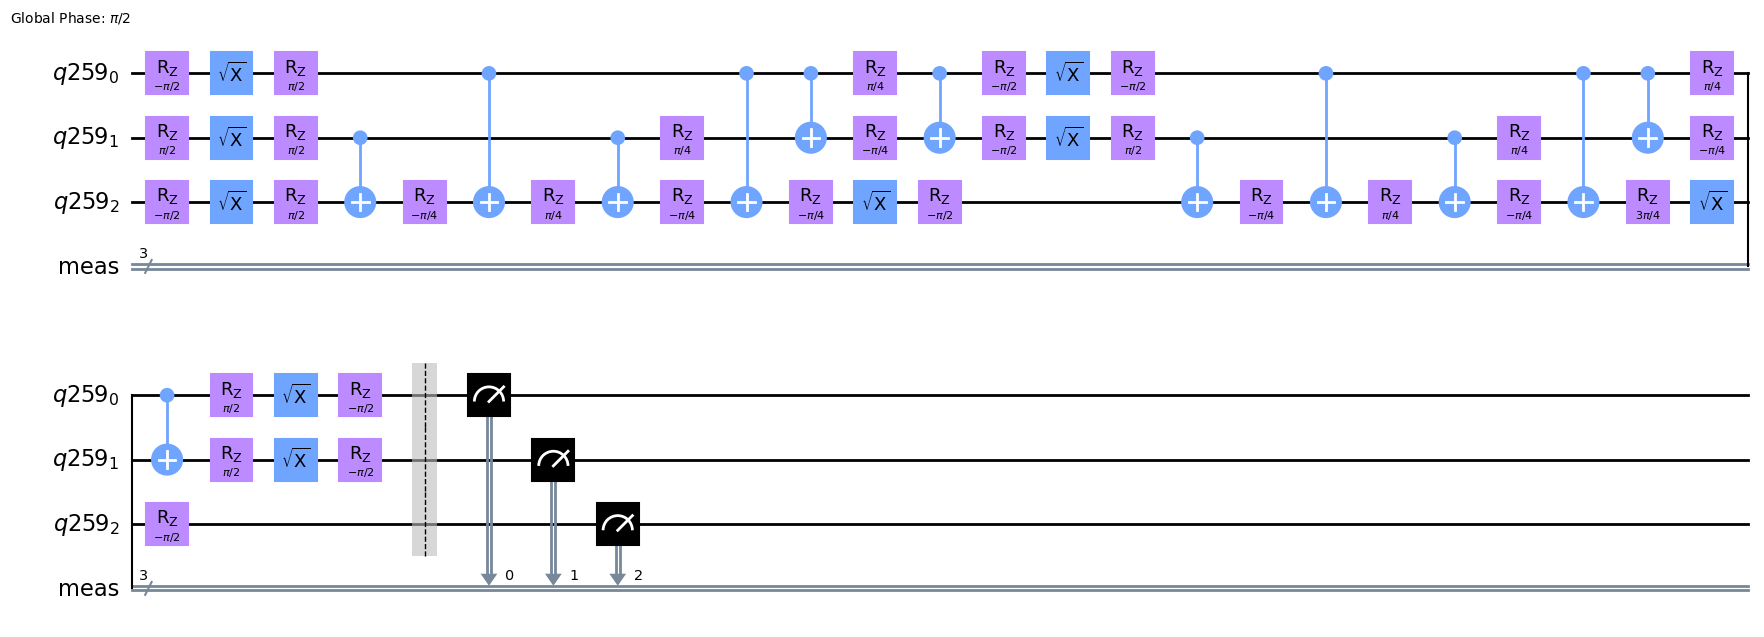

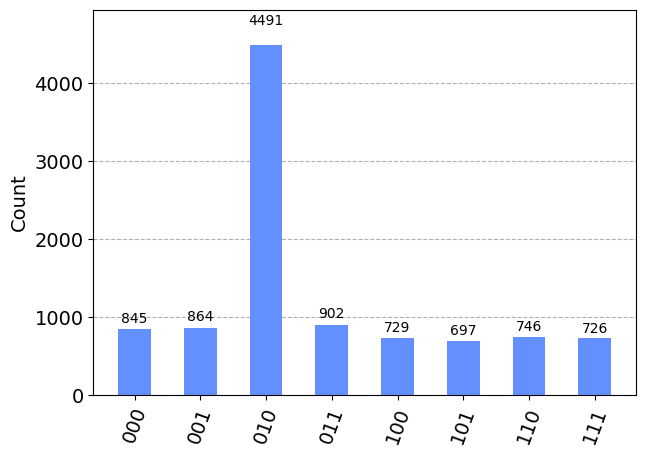

PROBABILIDAD DE ERROR:  0.07
noise model:  NoiseModel:
  Basis gates: ['cx', 'id', 'rz', 'sx']
  Instructions with noise: ['cx']
  All-qubits errors: ['cx']


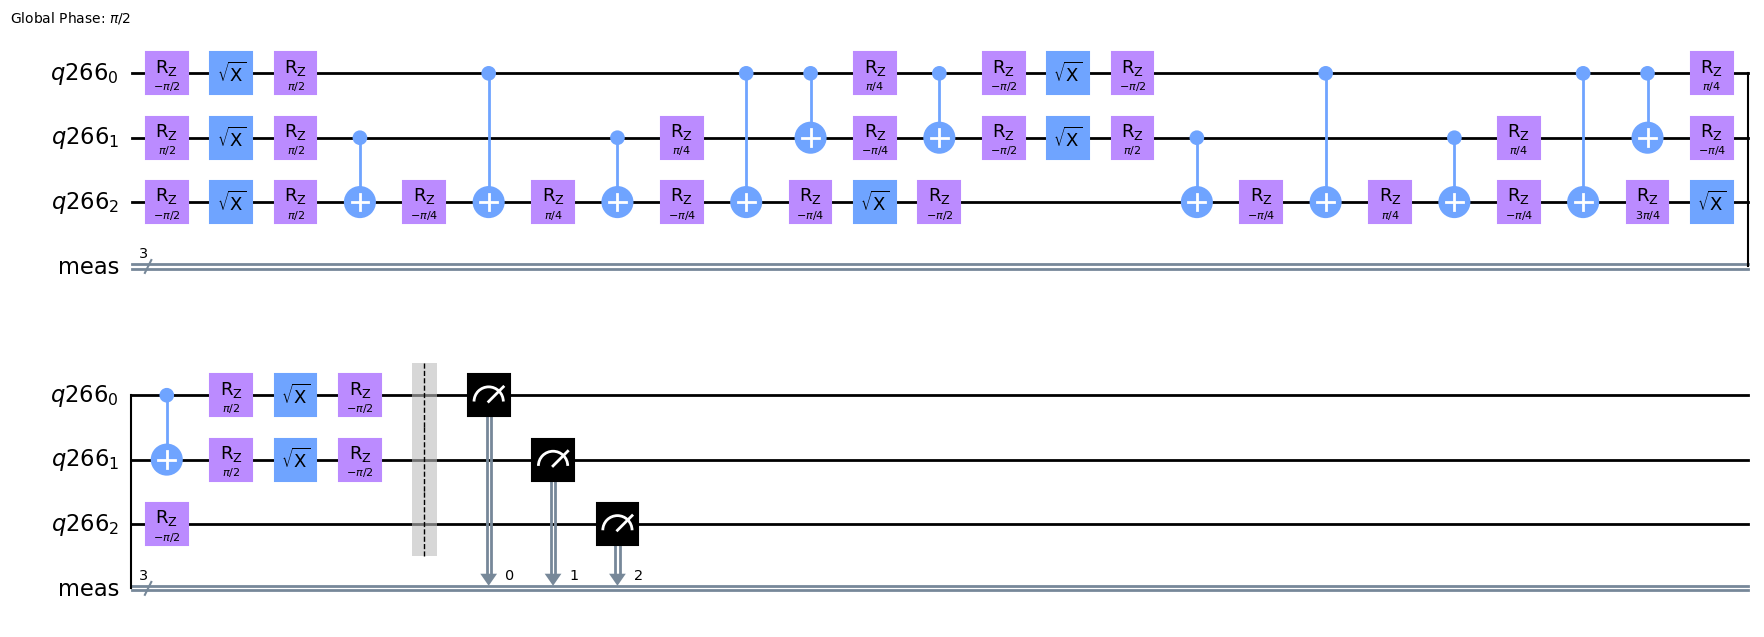

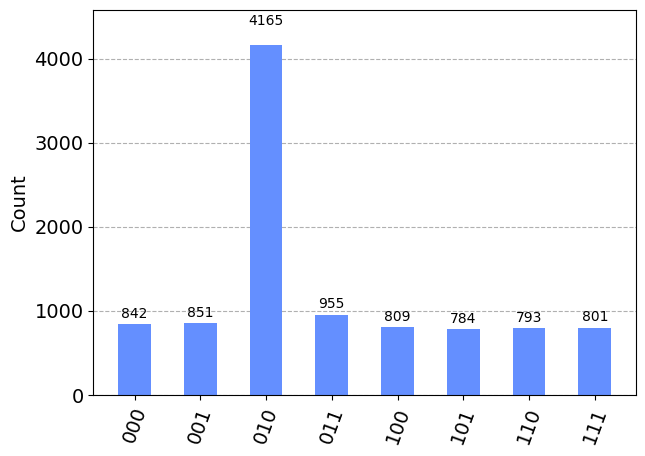

PROBABILIDAD DE ERROR:  0.08
noise model:  NoiseModel:
  Basis gates: ['cx', 'id', 'rz', 'sx']
  Instructions with noise: ['cx']
  All-qubits errors: ['cx']


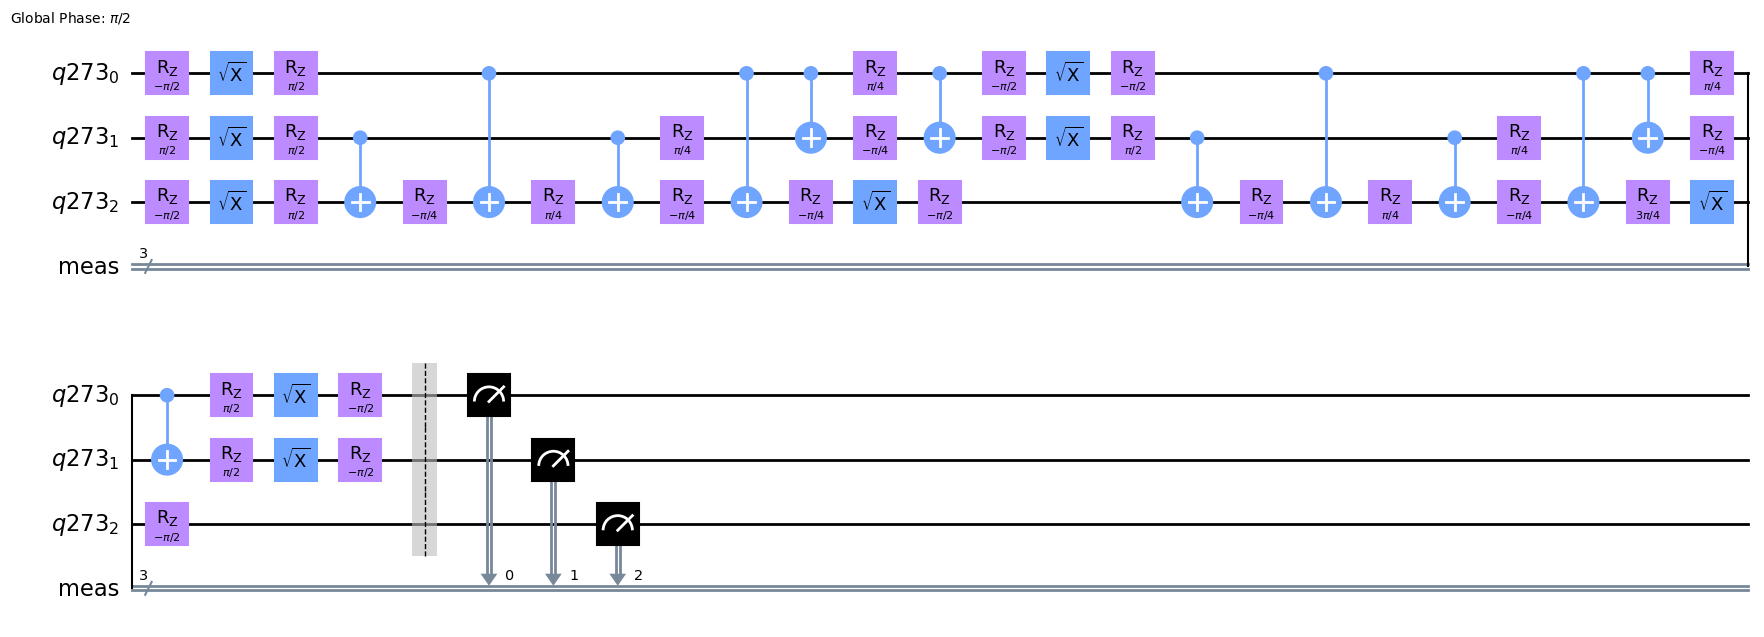

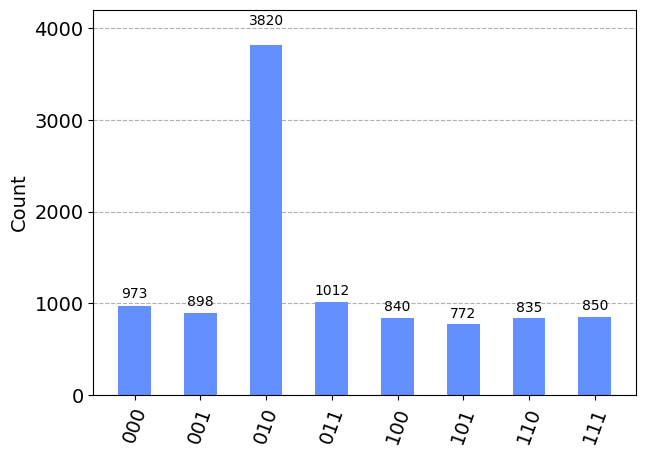

PROBABILIDAD DE ERROR:  0.09
noise model:  NoiseModel:
  Basis gates: ['cx', 'id', 'rz', 'sx']
  Instructions with noise: ['cx']
  All-qubits errors: ['cx']


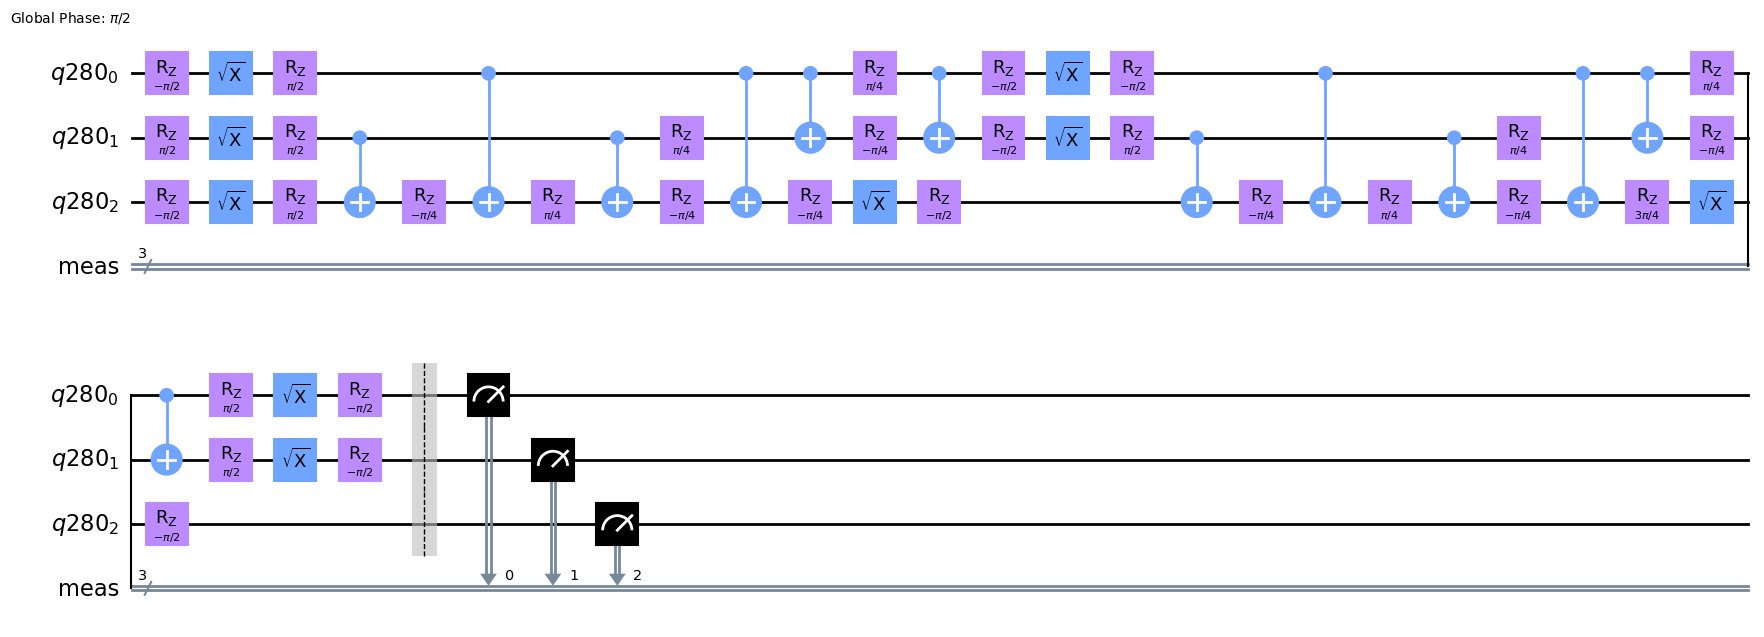

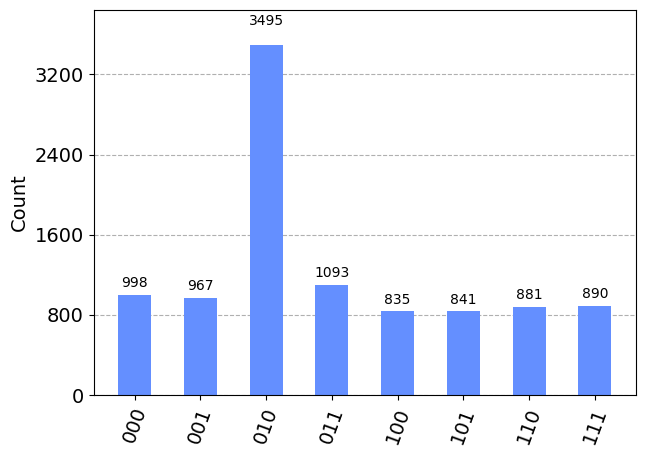

PROBABILIDAD DE ERROR:  0.1
noise model:  NoiseModel:
  Basis gates: ['cx', 'id', 'rz', 'sx']
  Instructions with noise: ['cx']
  All-qubits errors: ['cx']


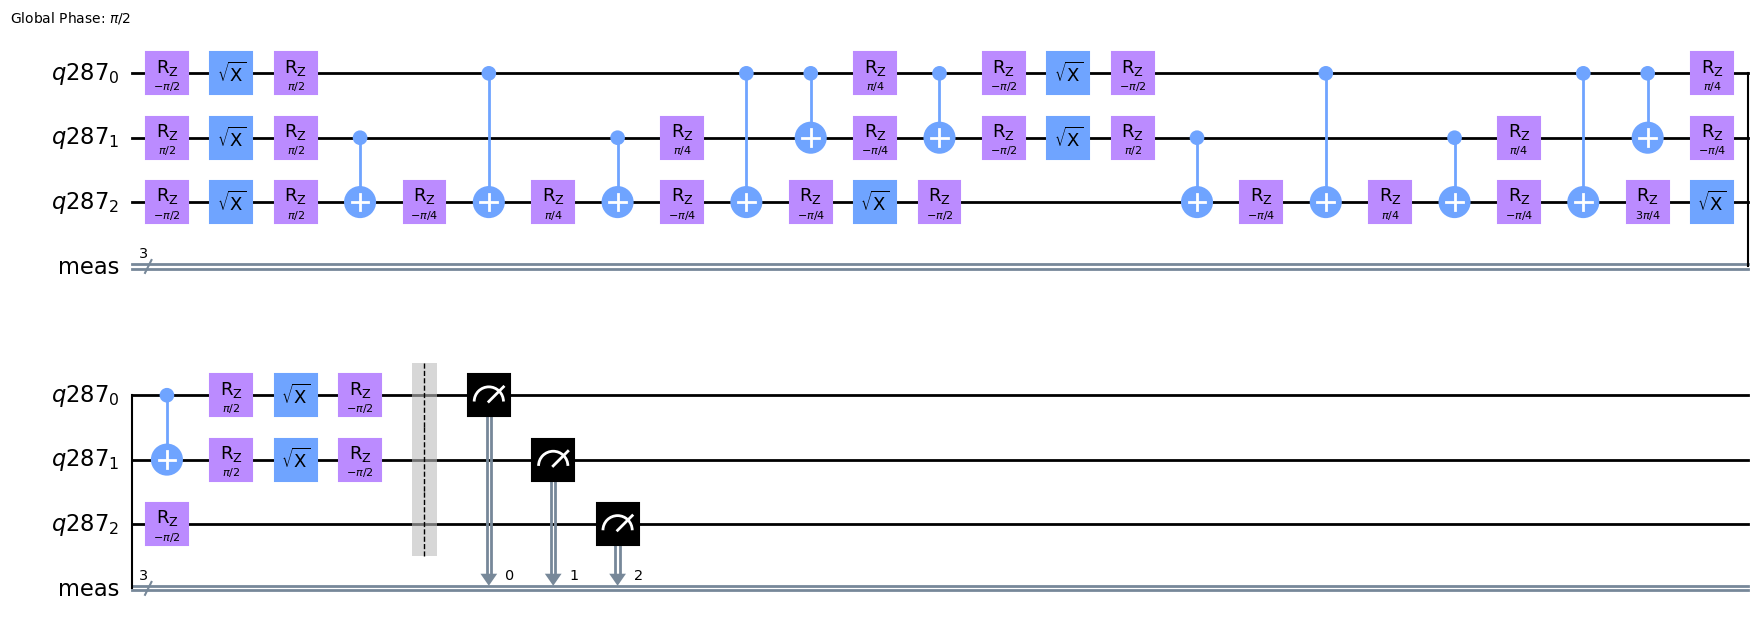

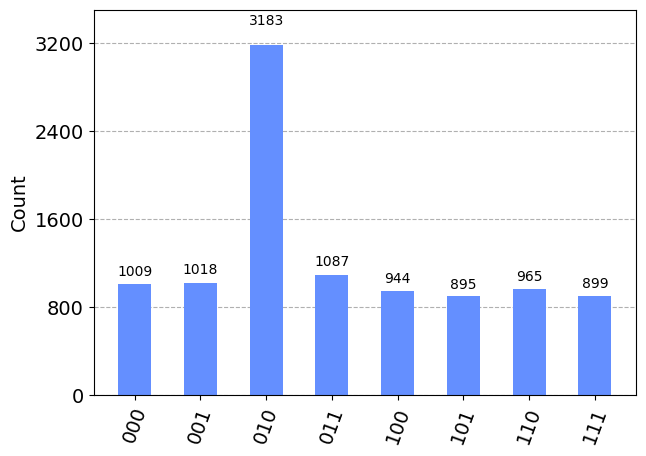

PROBABILIDAD DE ERROR:  0.11
noise model:  NoiseModel:
  Basis gates: ['cx', 'id', 'rz', 'sx']
  Instructions with noise: ['cx']
  All-qubits errors: ['cx']


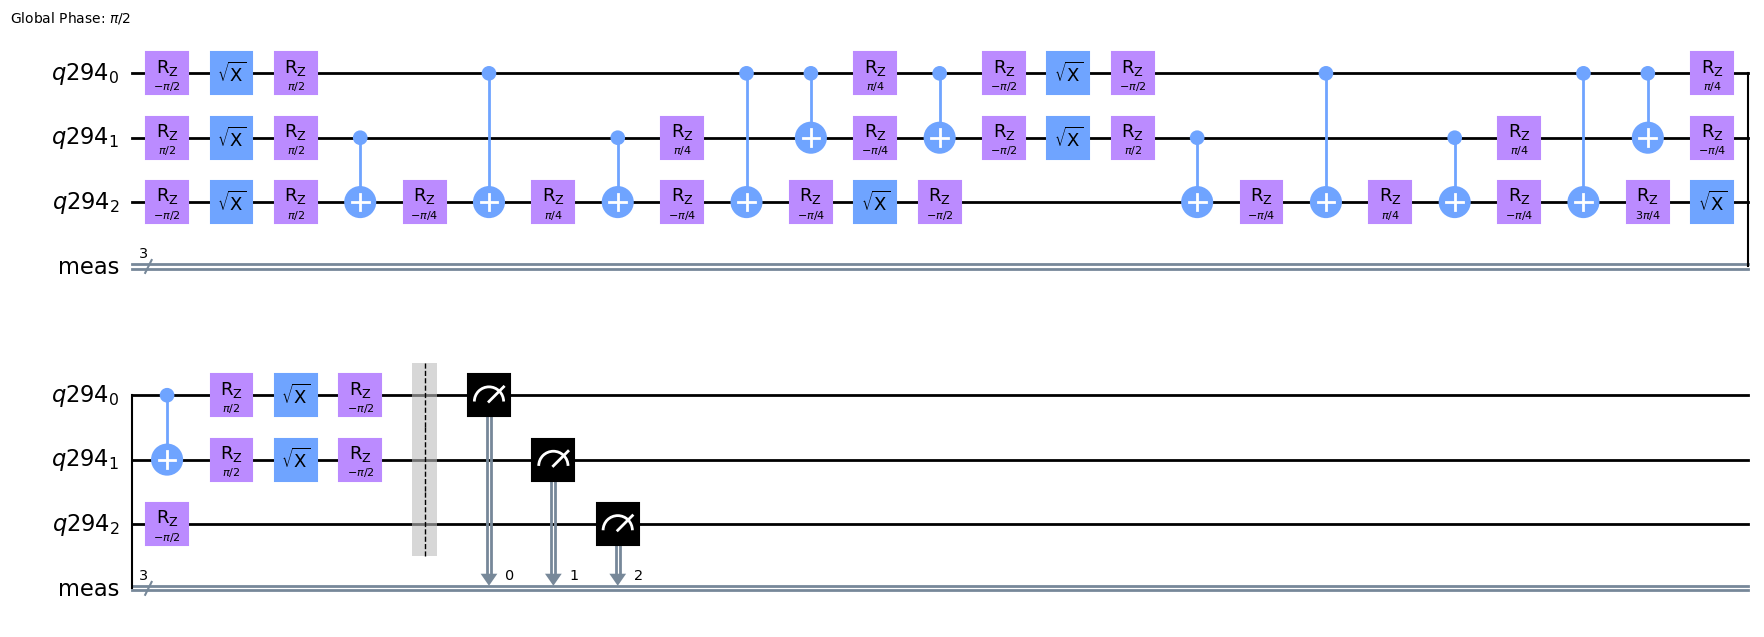

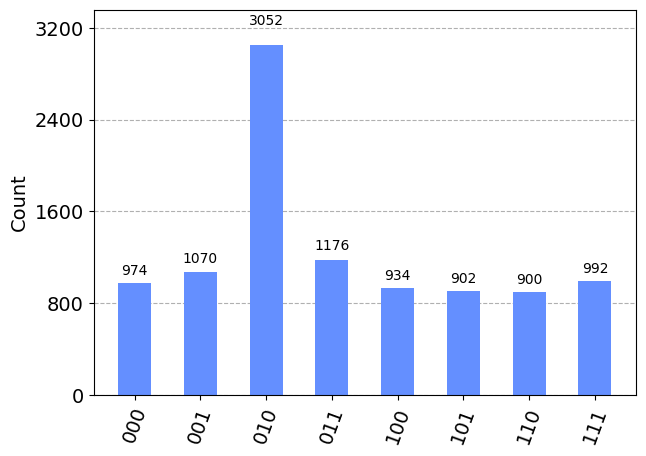

PROBABILIDAD DE ERROR:  0.12
noise model:  NoiseModel:
  Basis gates: ['cx', 'id', 'rz', 'sx']
  Instructions with noise: ['cx']
  All-qubits errors: ['cx']


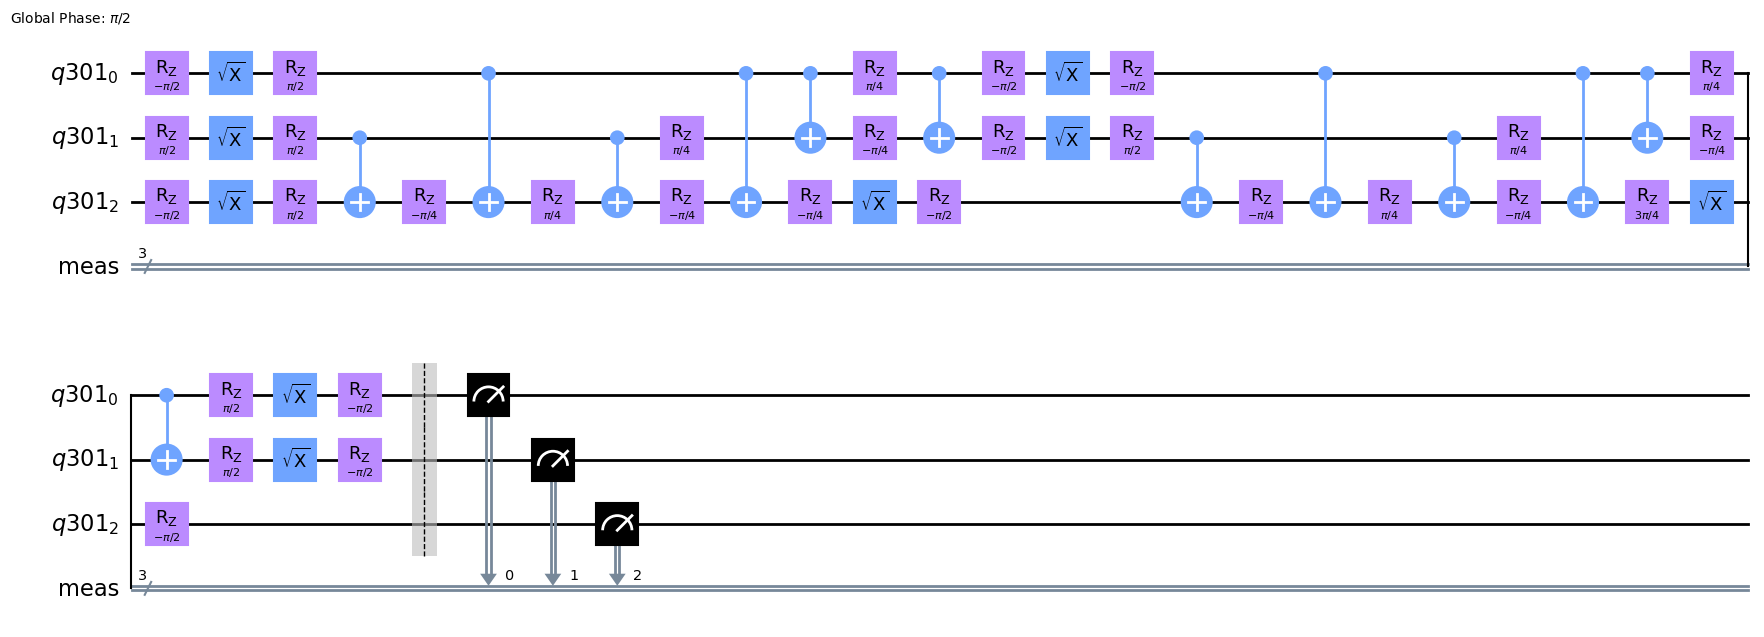

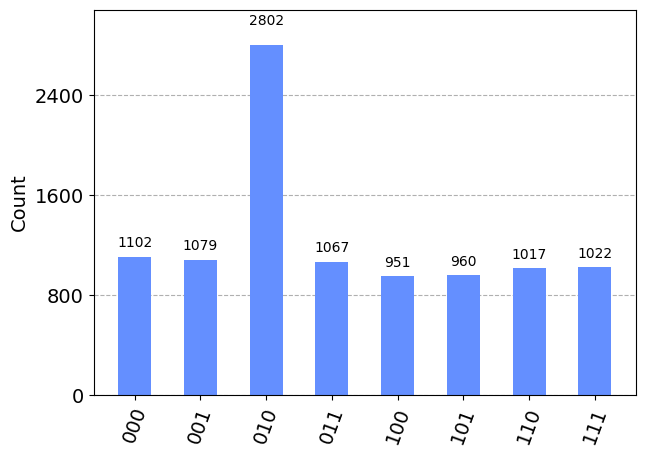

PROBABILIDAD DE ERROR:  0.13
noise model:  NoiseModel:
  Basis gates: ['cx', 'id', 'rz', 'sx']
  Instructions with noise: ['cx']
  All-qubits errors: ['cx']


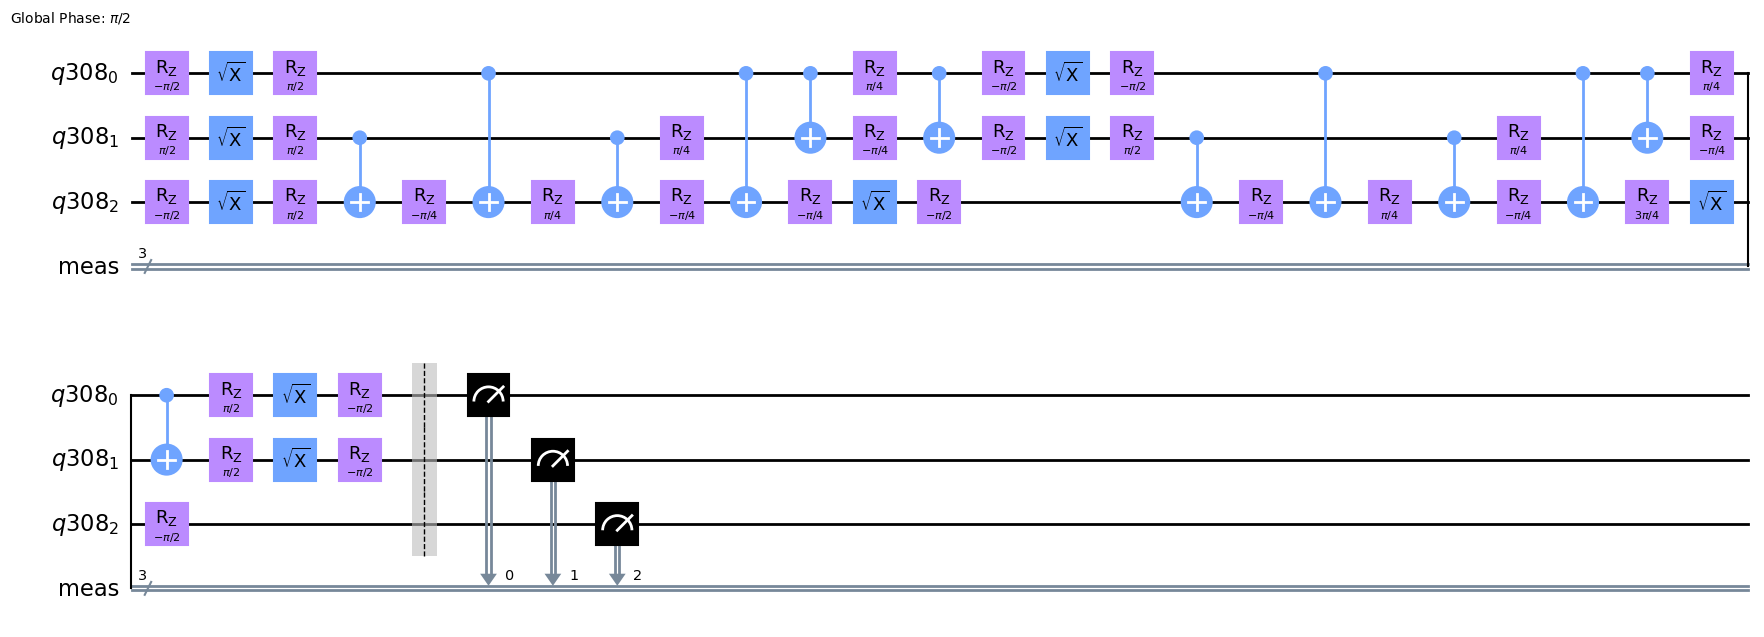

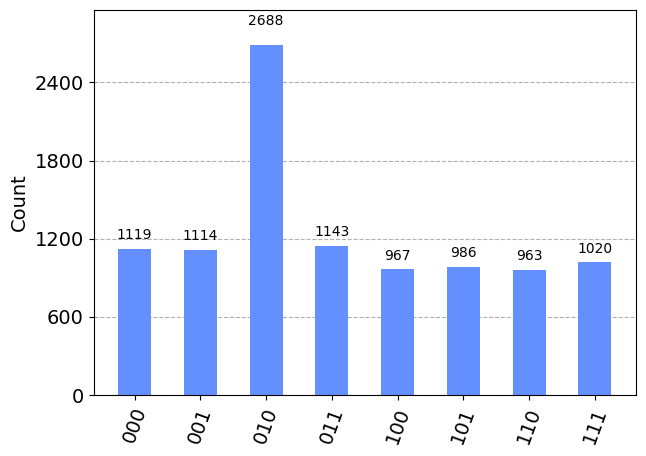

PROBABILIDAD DE ERROR:  0.14
noise model:  NoiseModel:
  Basis gates: ['cx', 'id', 'rz', 'sx']
  Instructions with noise: ['cx']
  All-qubits errors: ['cx']


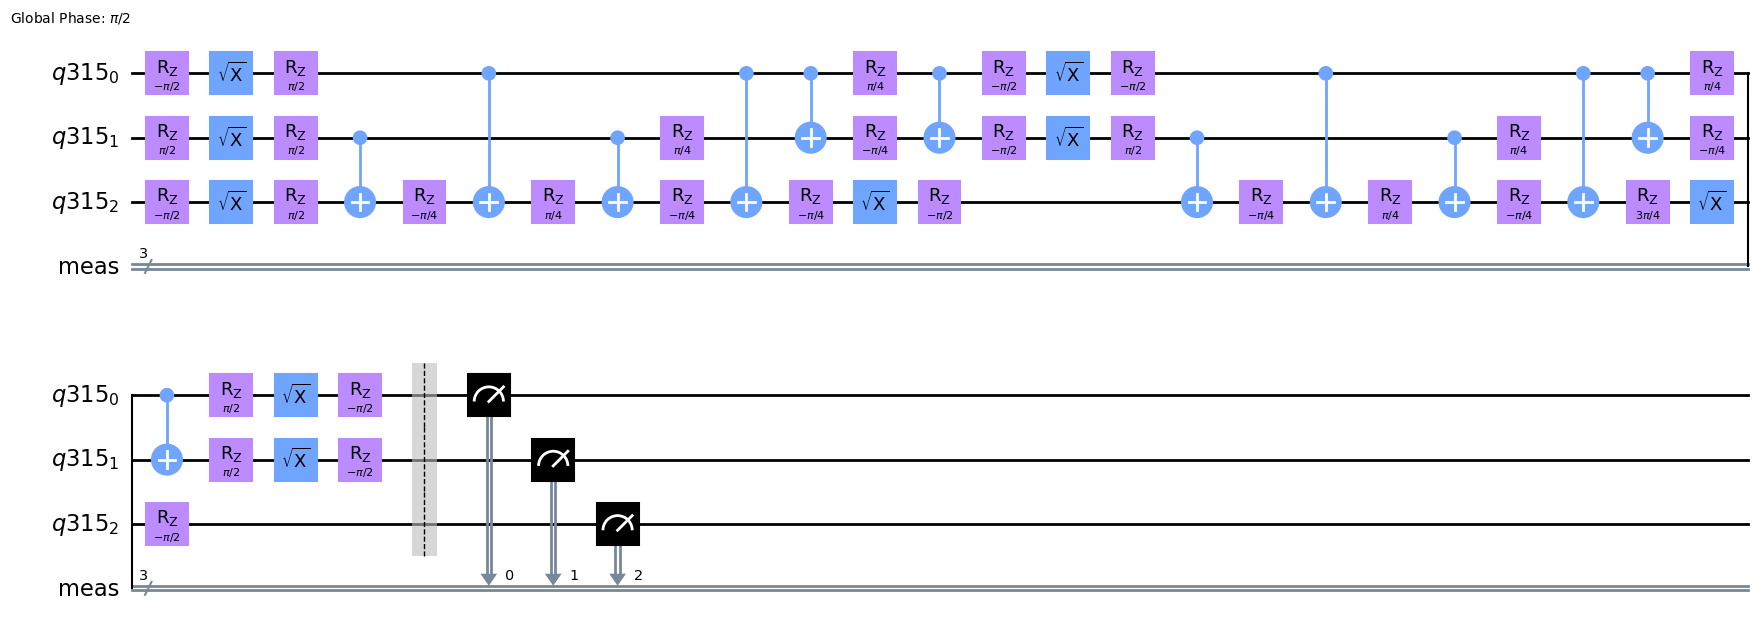

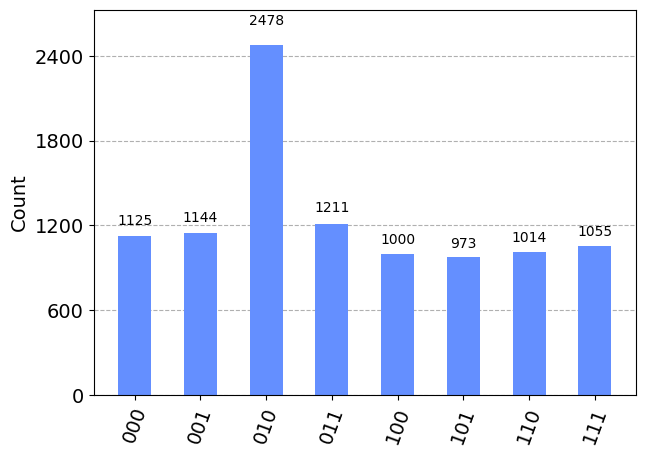

PROBABILIDAD DE ERROR:  0.15
noise model:  NoiseModel:
  Basis gates: ['cx', 'id', 'rz', 'sx']
  Instructions with noise: ['cx']
  All-qubits errors: ['cx']


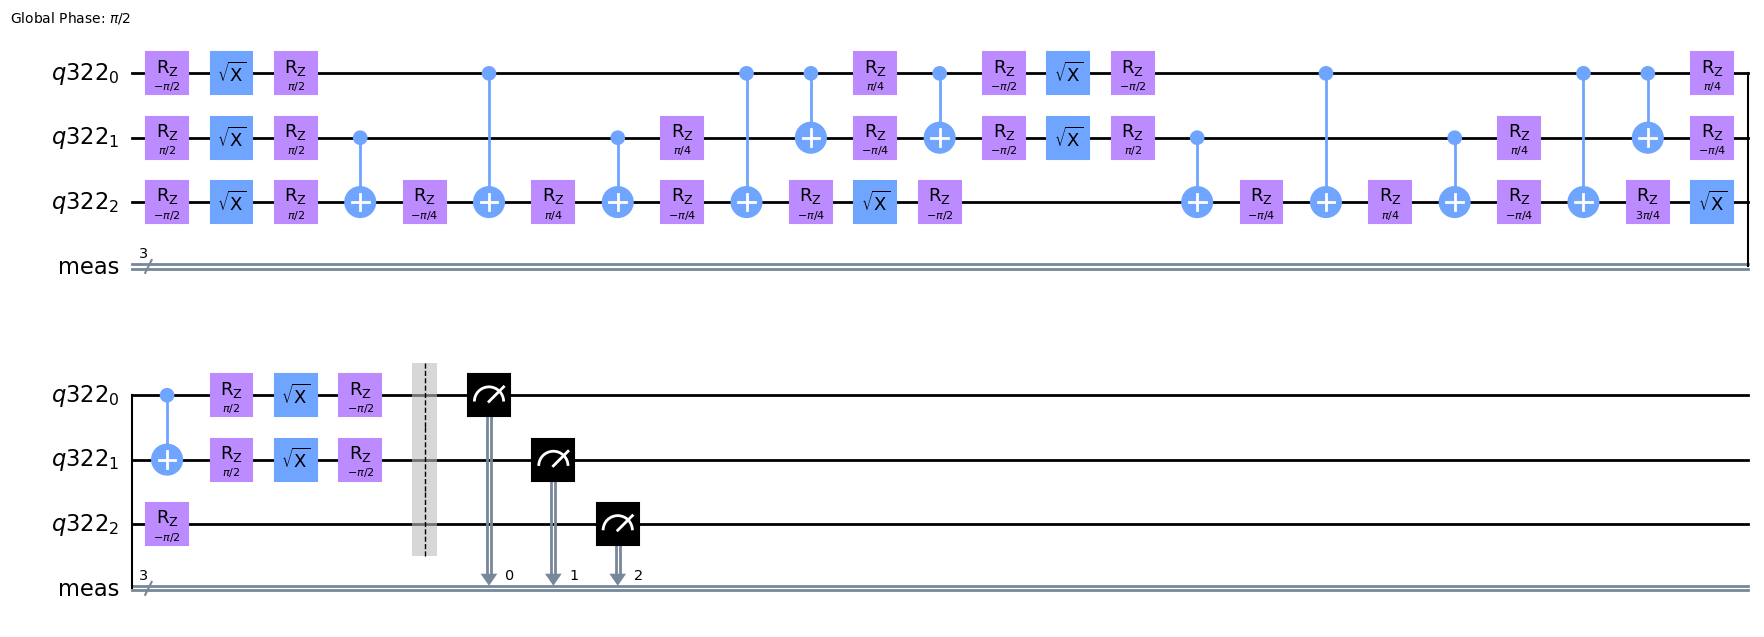

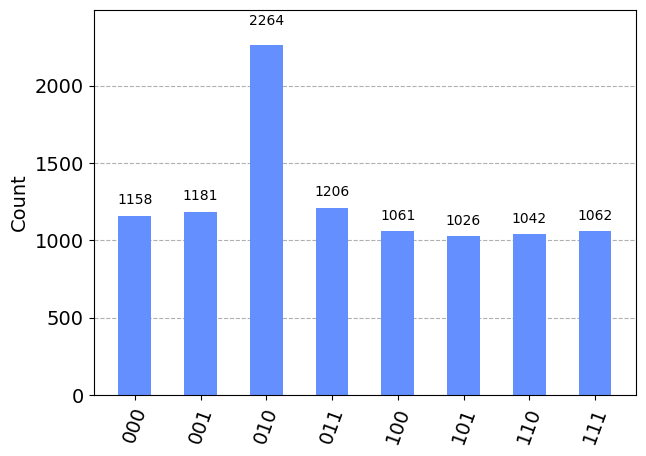

PROBABILIDAD DE ERROR:  0.16
noise model:  NoiseModel:
  Basis gates: ['cx', 'id', 'rz', 'sx']
  Instructions with noise: ['cx']
  All-qubits errors: ['cx']


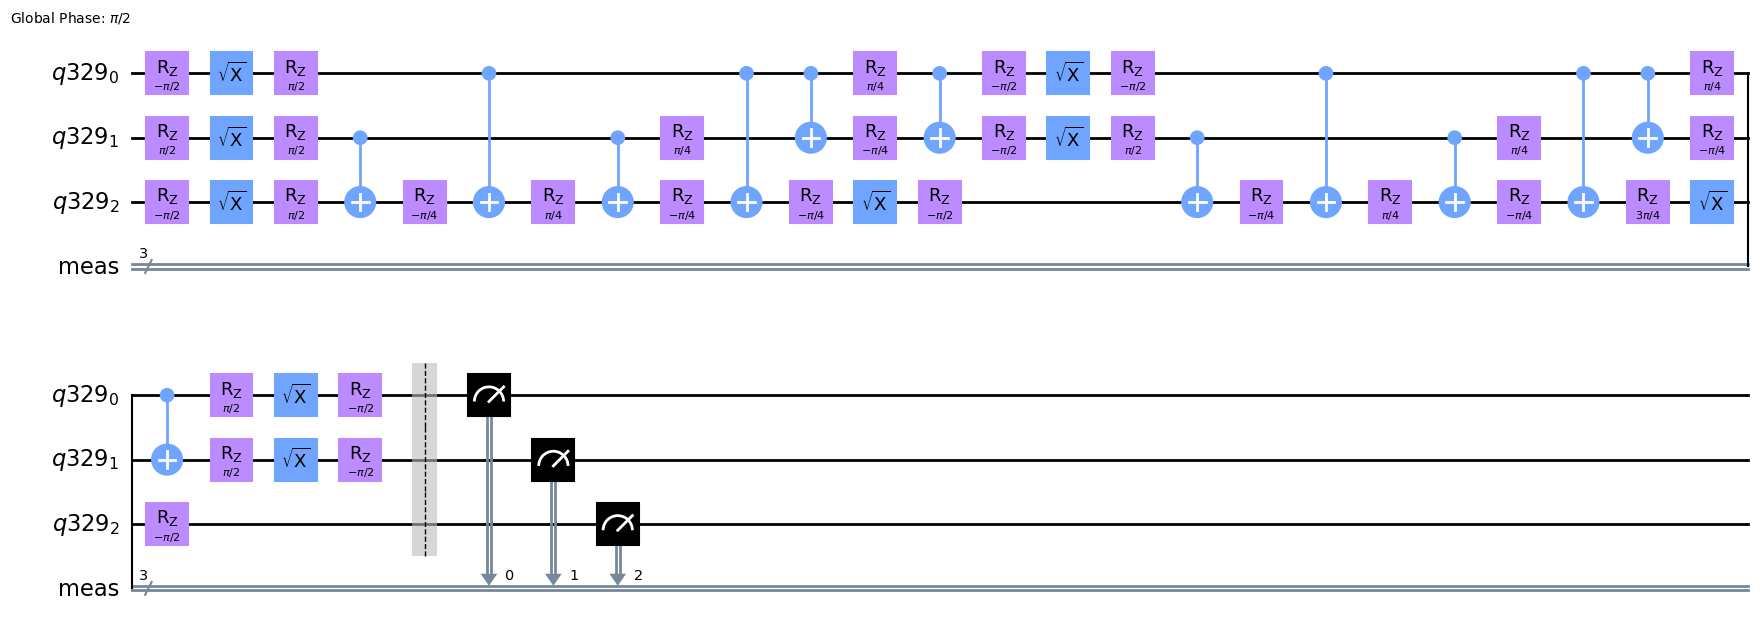

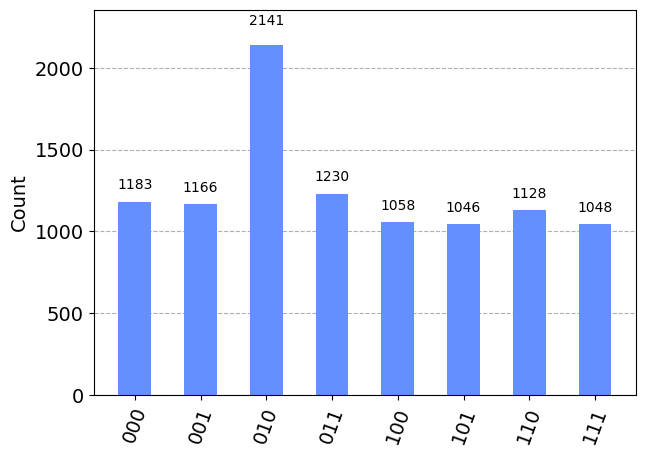

PROBABILIDAD DE ERROR:  0.17
noise model:  NoiseModel:
  Basis gates: ['cx', 'id', 'rz', 'sx']
  Instructions with noise: ['cx']
  All-qubits errors: ['cx']


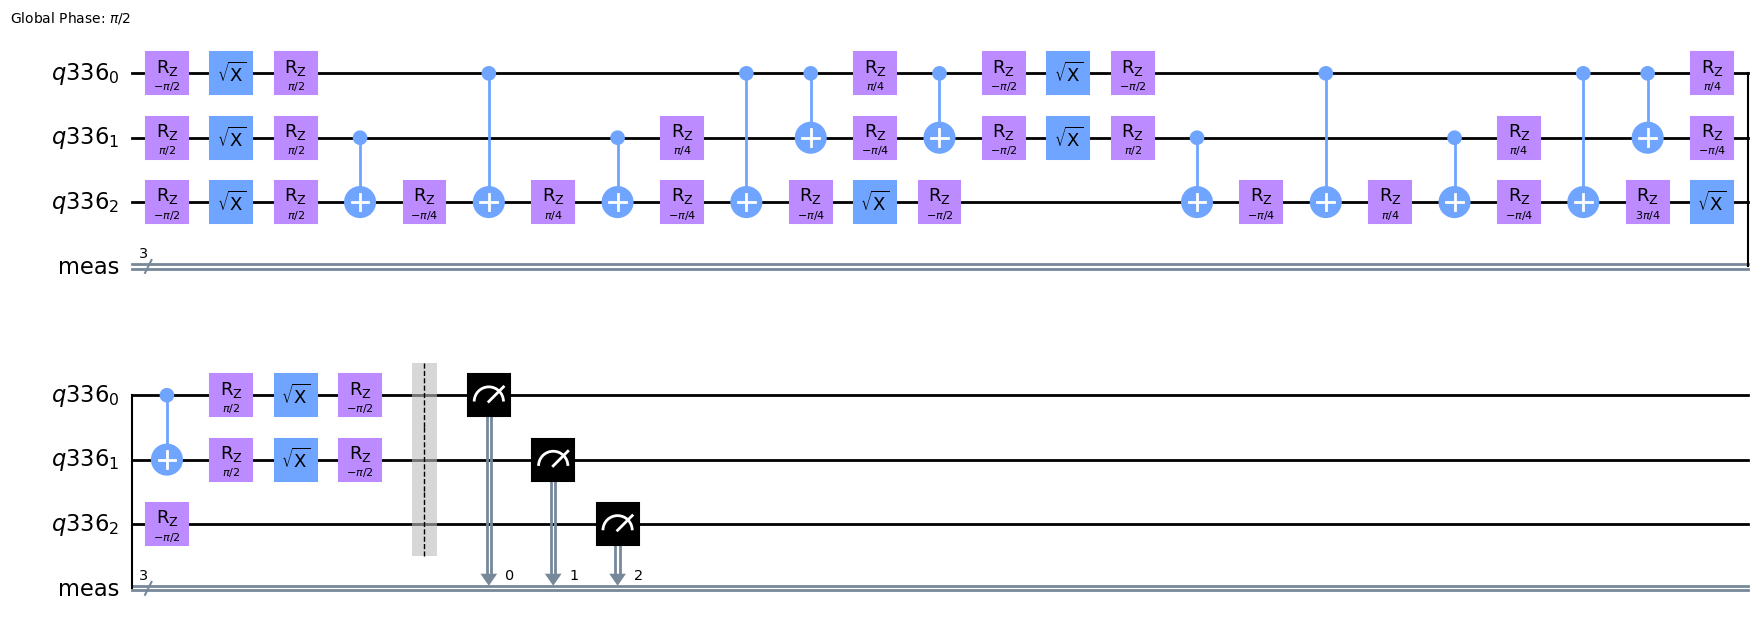

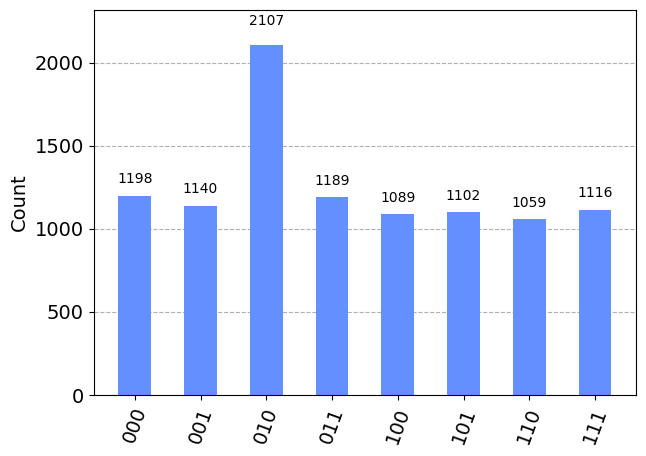

PROBABILIDAD DE ERROR:  0.18
noise model:  NoiseModel:
  Basis gates: ['cx', 'id', 'rz', 'sx']
  Instructions with noise: ['cx']
  All-qubits errors: ['cx']


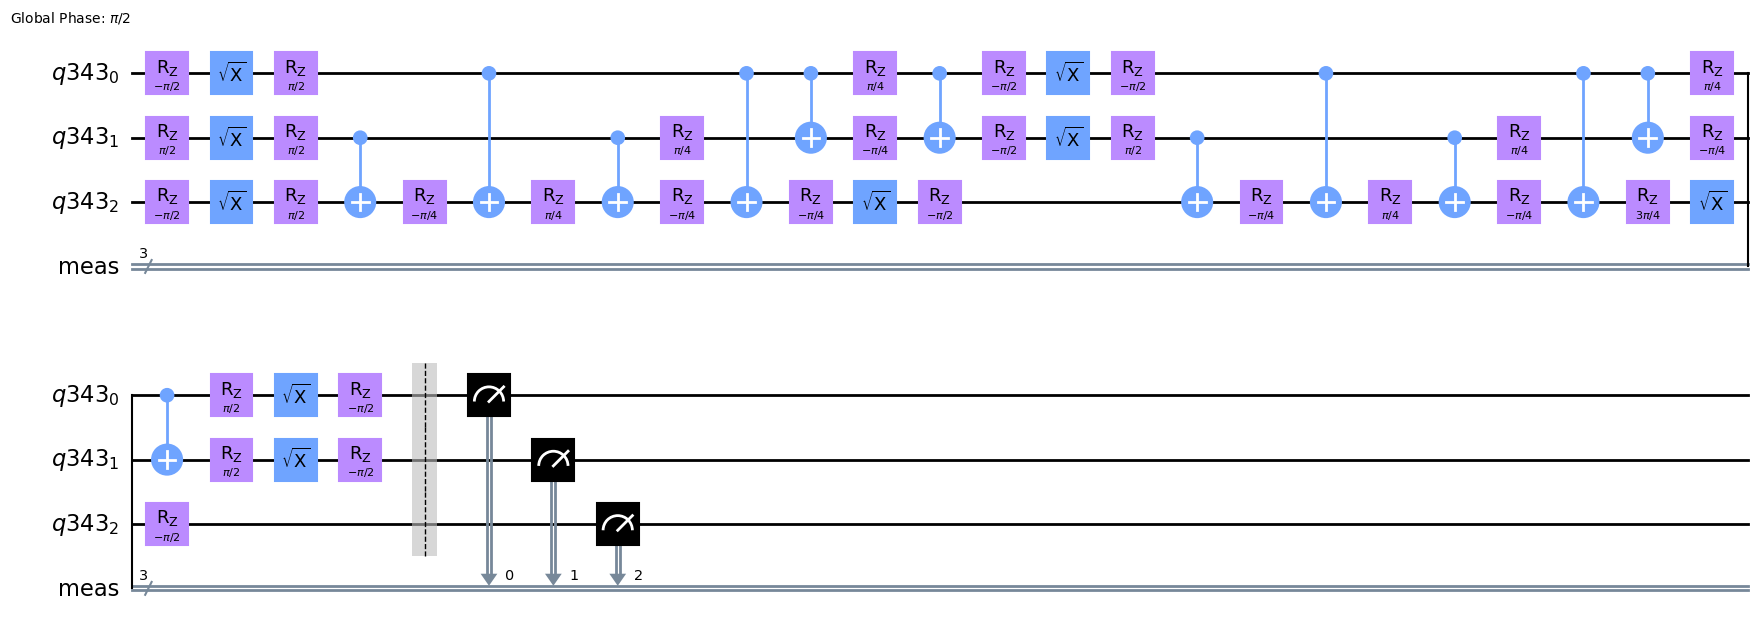

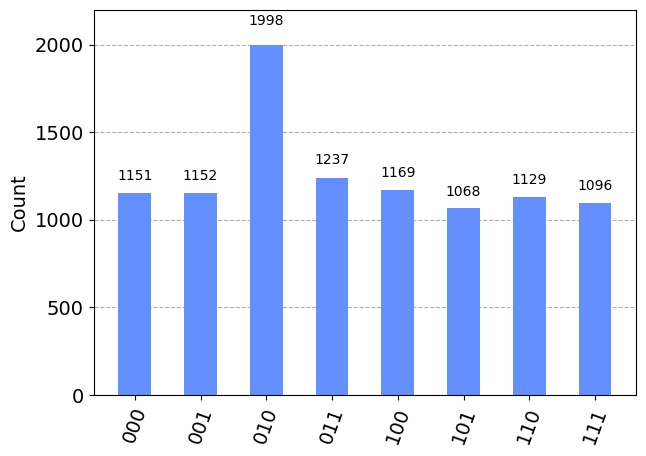

PROBABILIDAD DE ERROR:  0.19
noise model:  NoiseModel:
  Basis gates: ['cx', 'id', 'rz', 'sx']
  Instructions with noise: ['cx']
  All-qubits errors: ['cx']


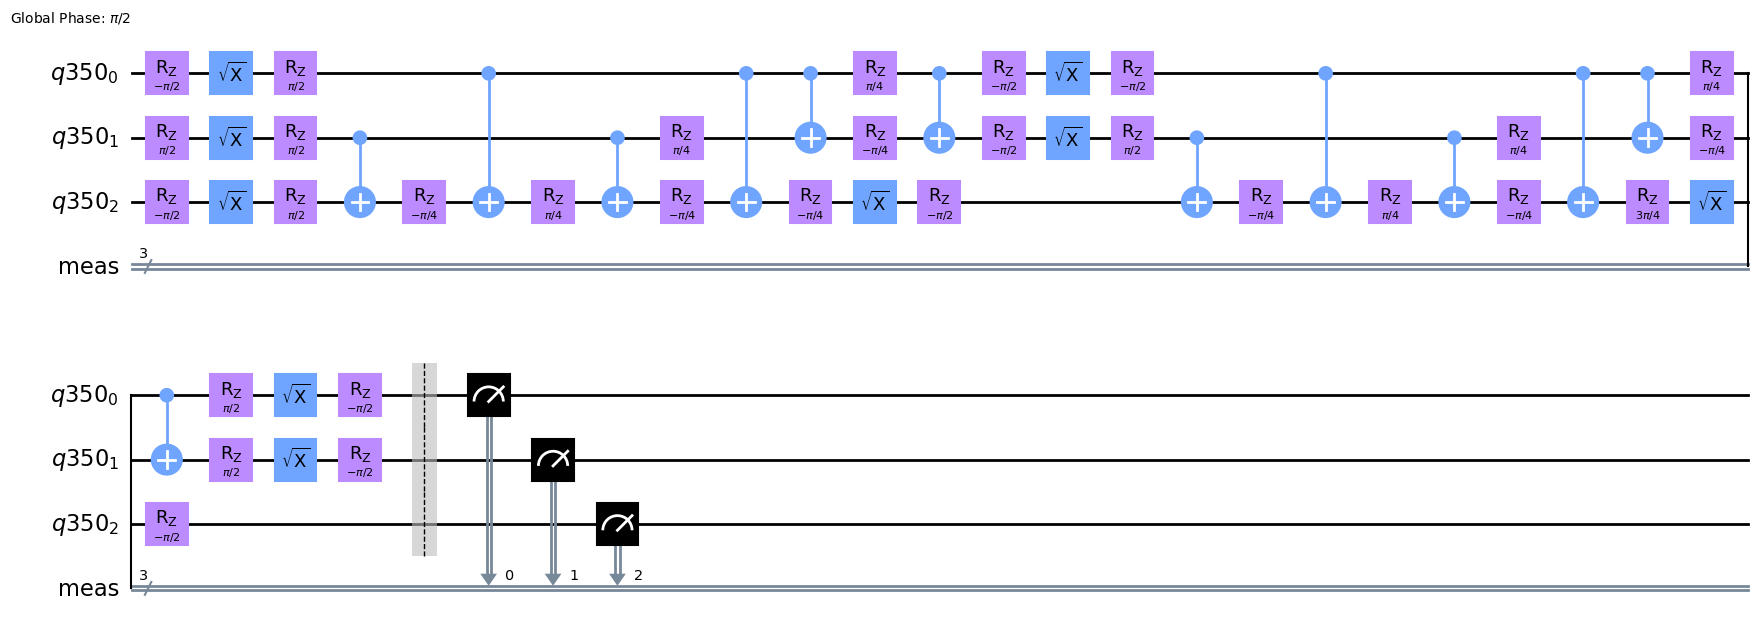

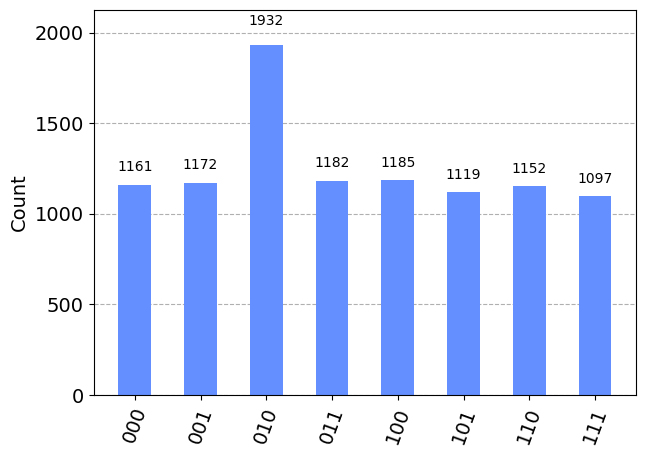

PROBABILIDAD DE ERROR:  0.2
noise model:  NoiseModel:
  Basis gates: ['cx', 'id', 'rz', 'sx']
  Instructions with noise: ['cx']
  All-qubits errors: ['cx']


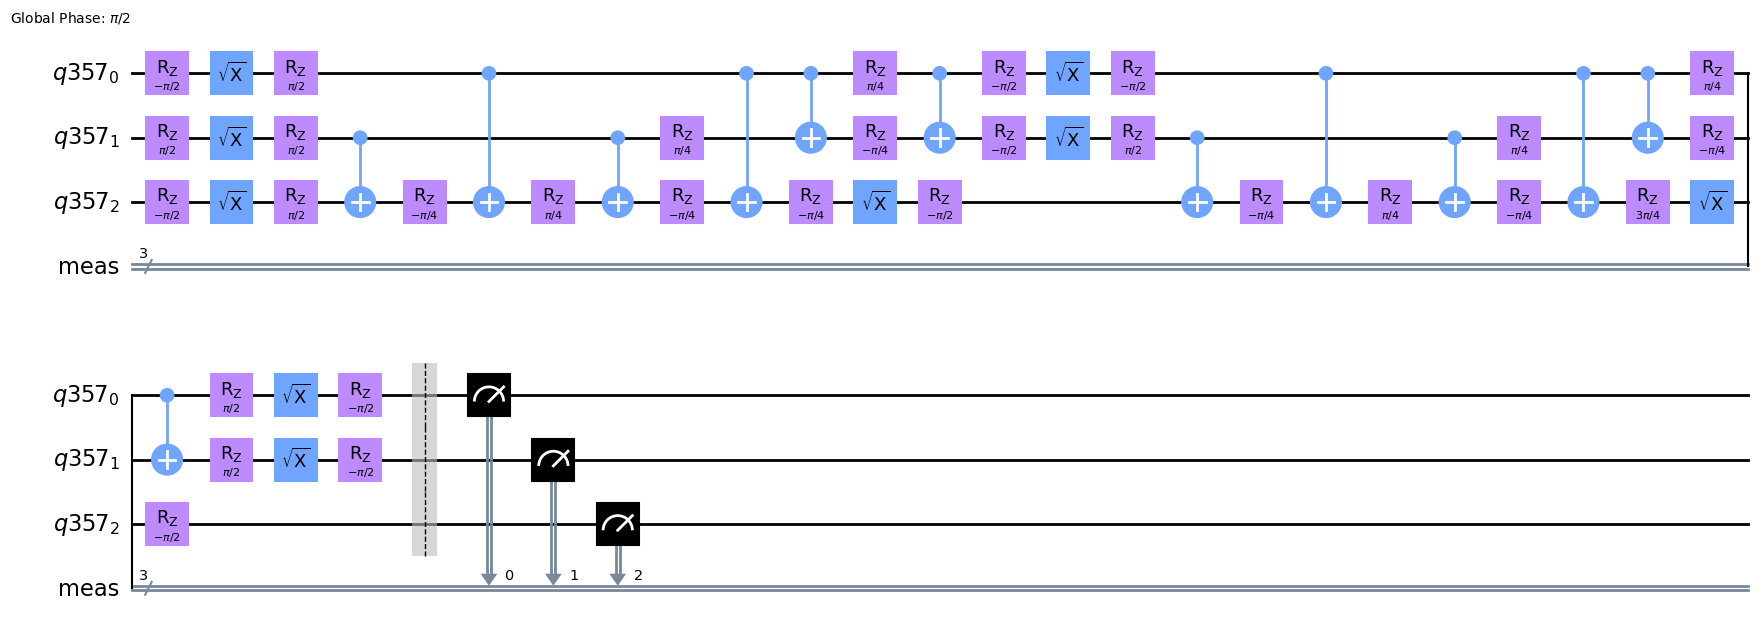

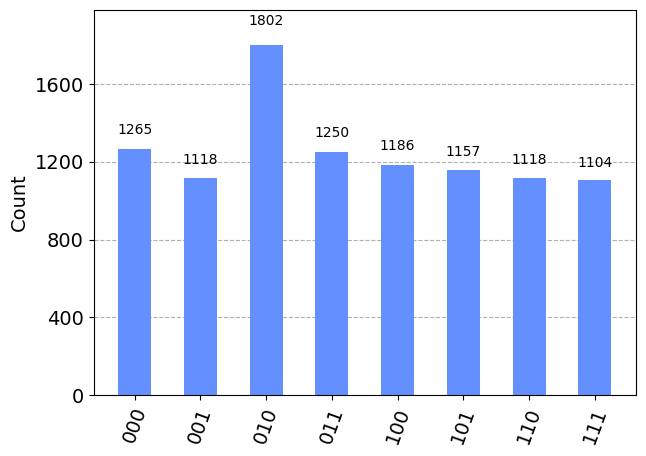

PROBABILIDAD DE ERROR:  0.21
noise model:  NoiseModel:
  Basis gates: ['cx', 'id', 'rz', 'sx']
  Instructions with noise: ['cx']
  All-qubits errors: ['cx']


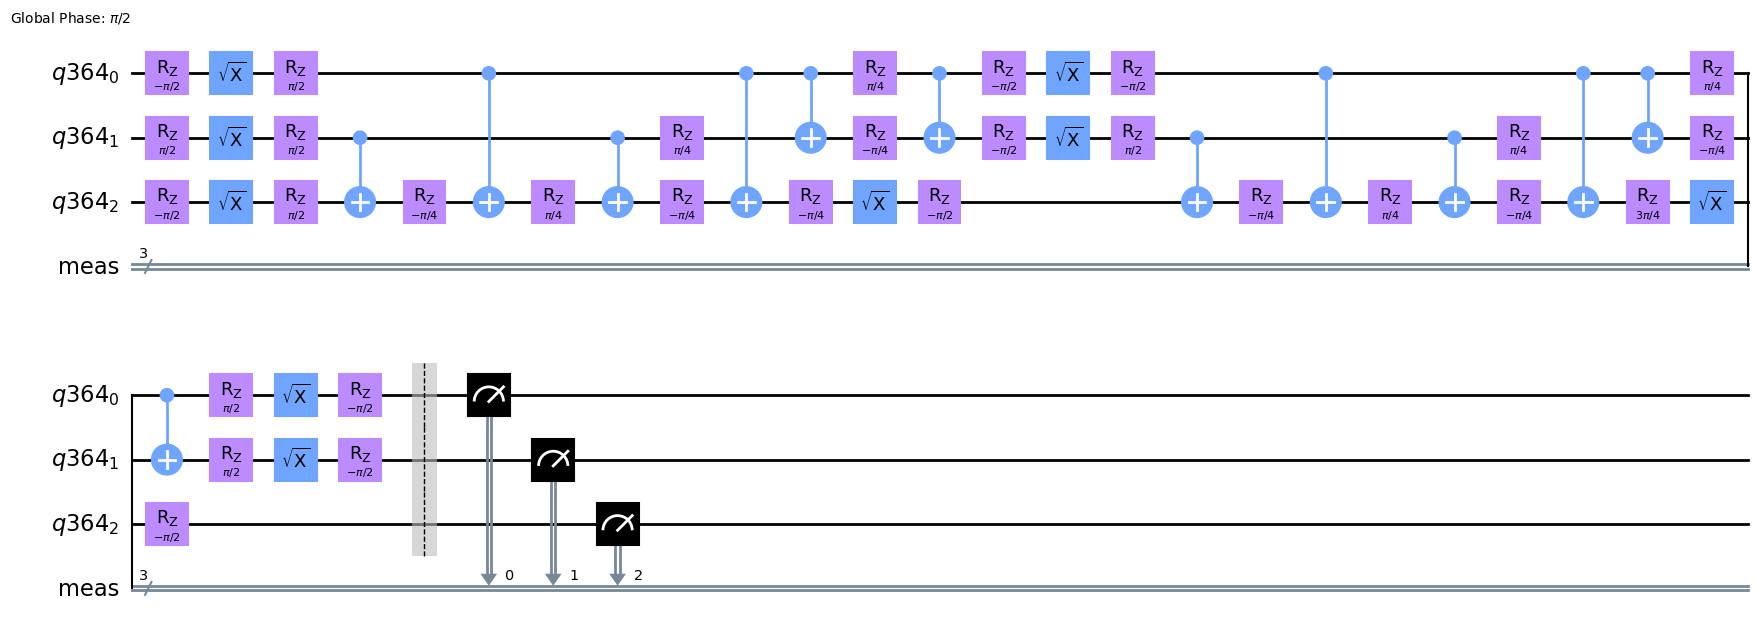

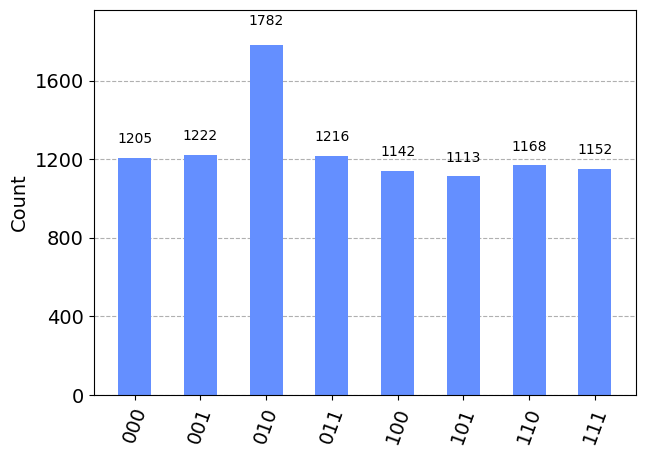

PROBABILIDAD DE ERROR:  0.22
noise model:  NoiseModel:
  Basis gates: ['cx', 'id', 'rz', 'sx']
  Instructions with noise: ['cx']
  All-qubits errors: ['cx']


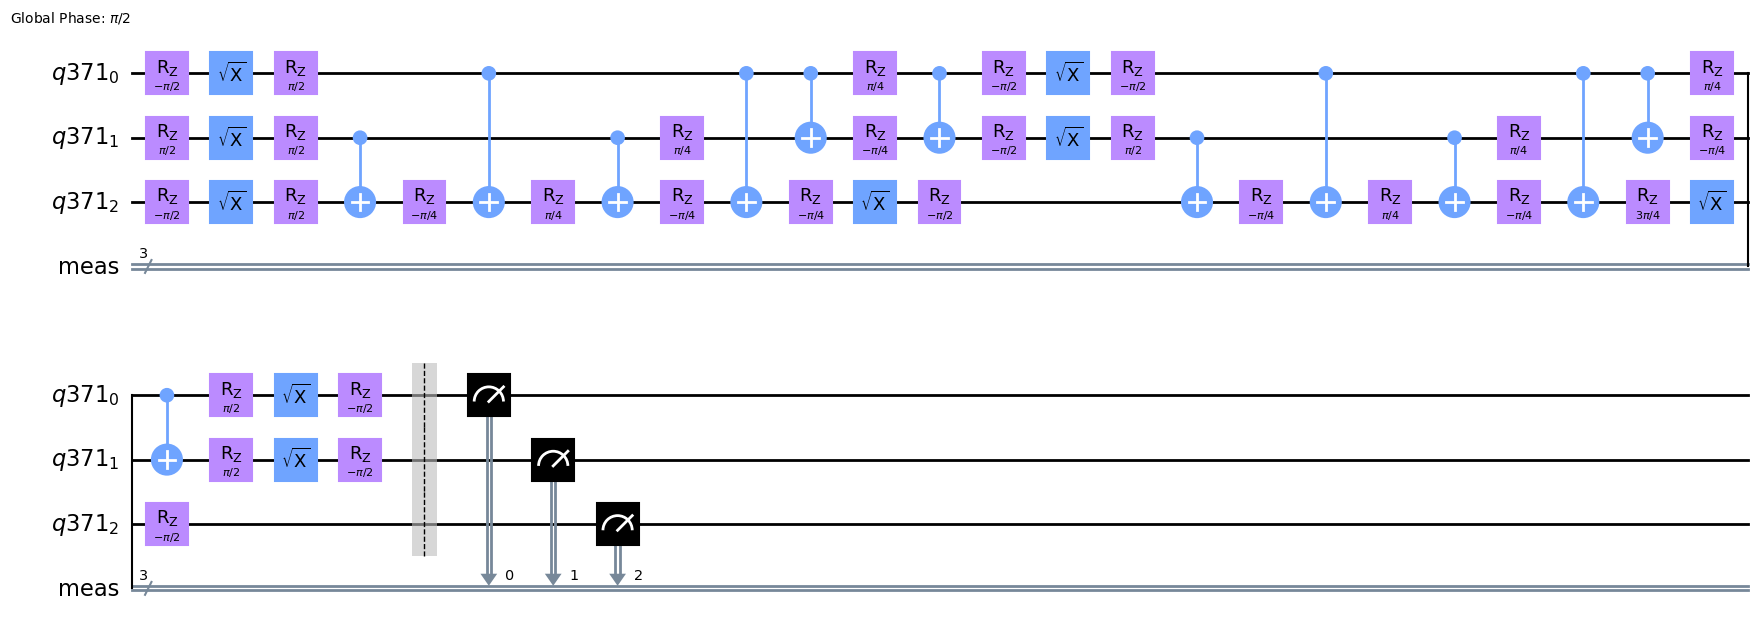

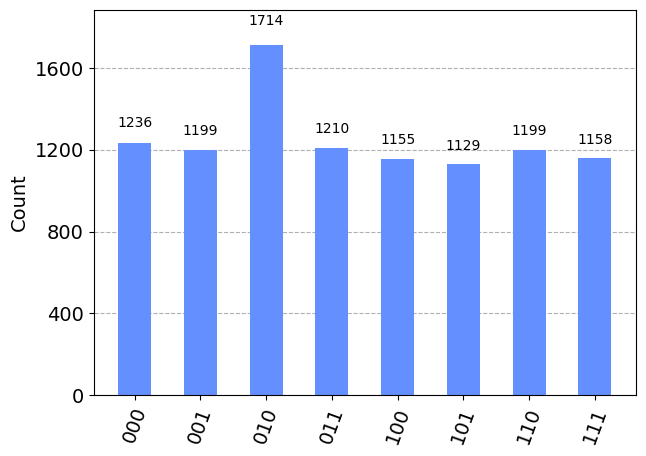

PROBABILIDAD DE ERROR:  0.23
noise model:  NoiseModel:
  Basis gates: ['cx', 'id', 'rz', 'sx']
  Instructions with noise: ['cx']
  All-qubits errors: ['cx']


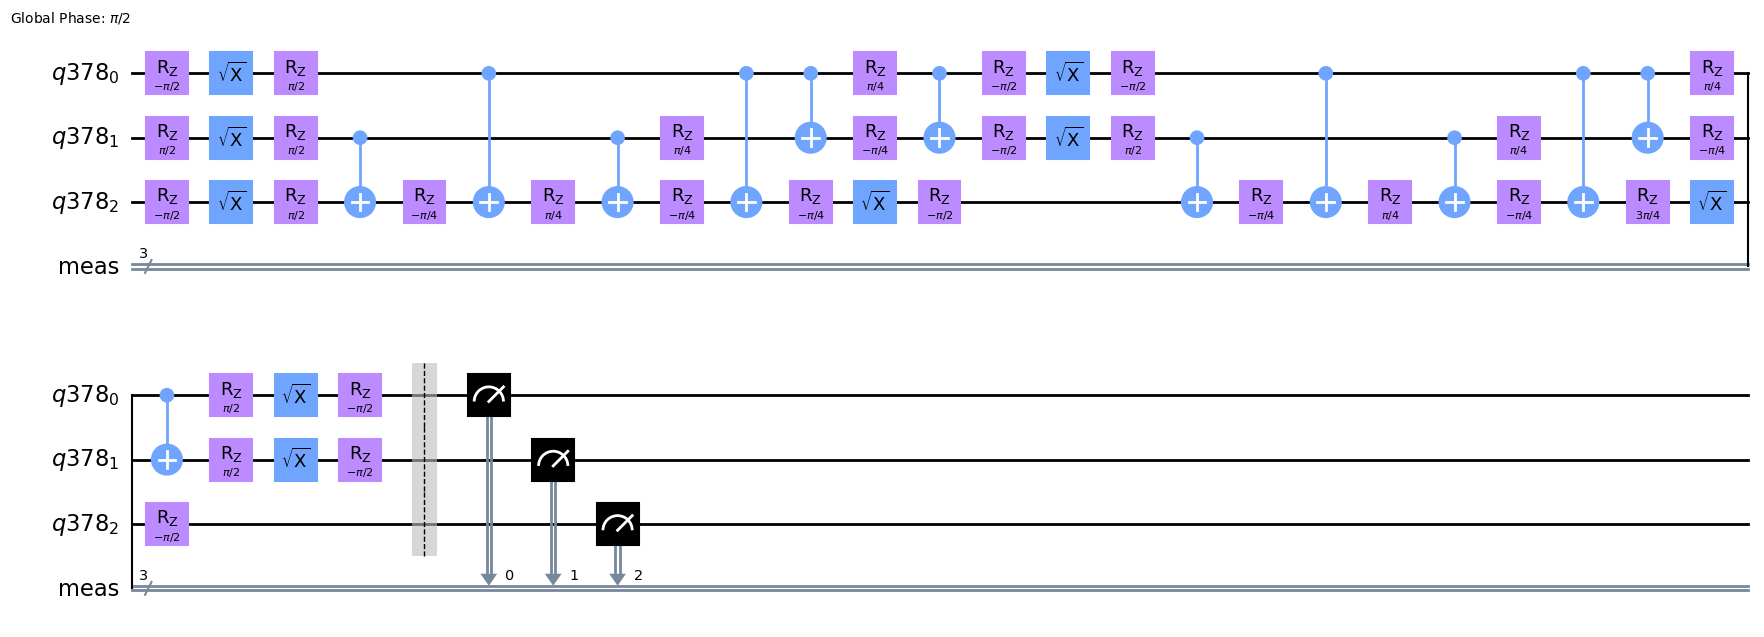

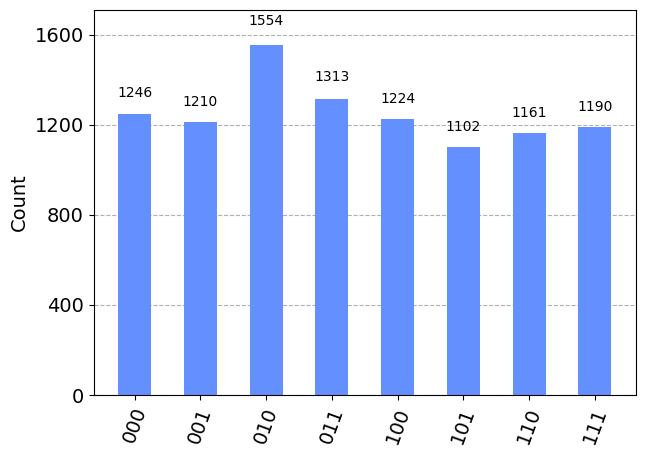

PROBABILIDAD DE ERROR:  0.24
noise model:  NoiseModel:
  Basis gates: ['cx', 'id', 'rz', 'sx']
  Instructions with noise: ['cx']
  All-qubits errors: ['cx']


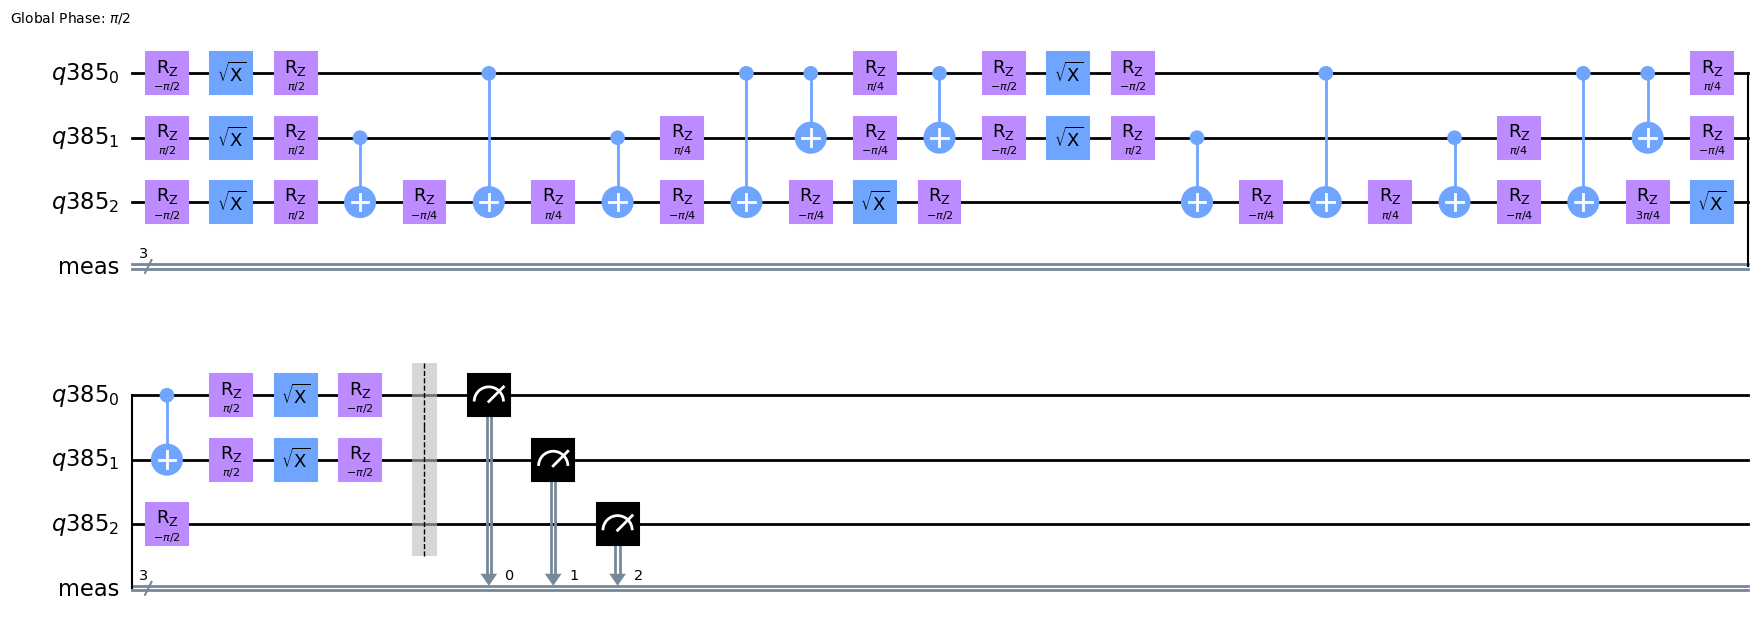

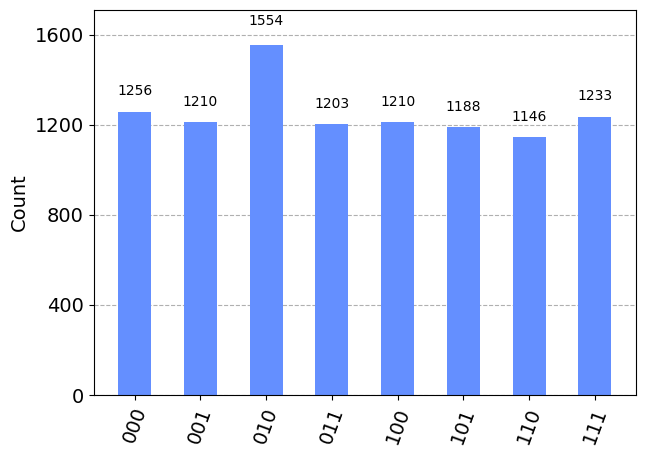

PROBABILIDAD DE ERROR:  0.25
noise model:  NoiseModel:
  Basis gates: ['cx', 'id', 'rz', 'sx']
  Instructions with noise: ['cx']
  All-qubits errors: ['cx']


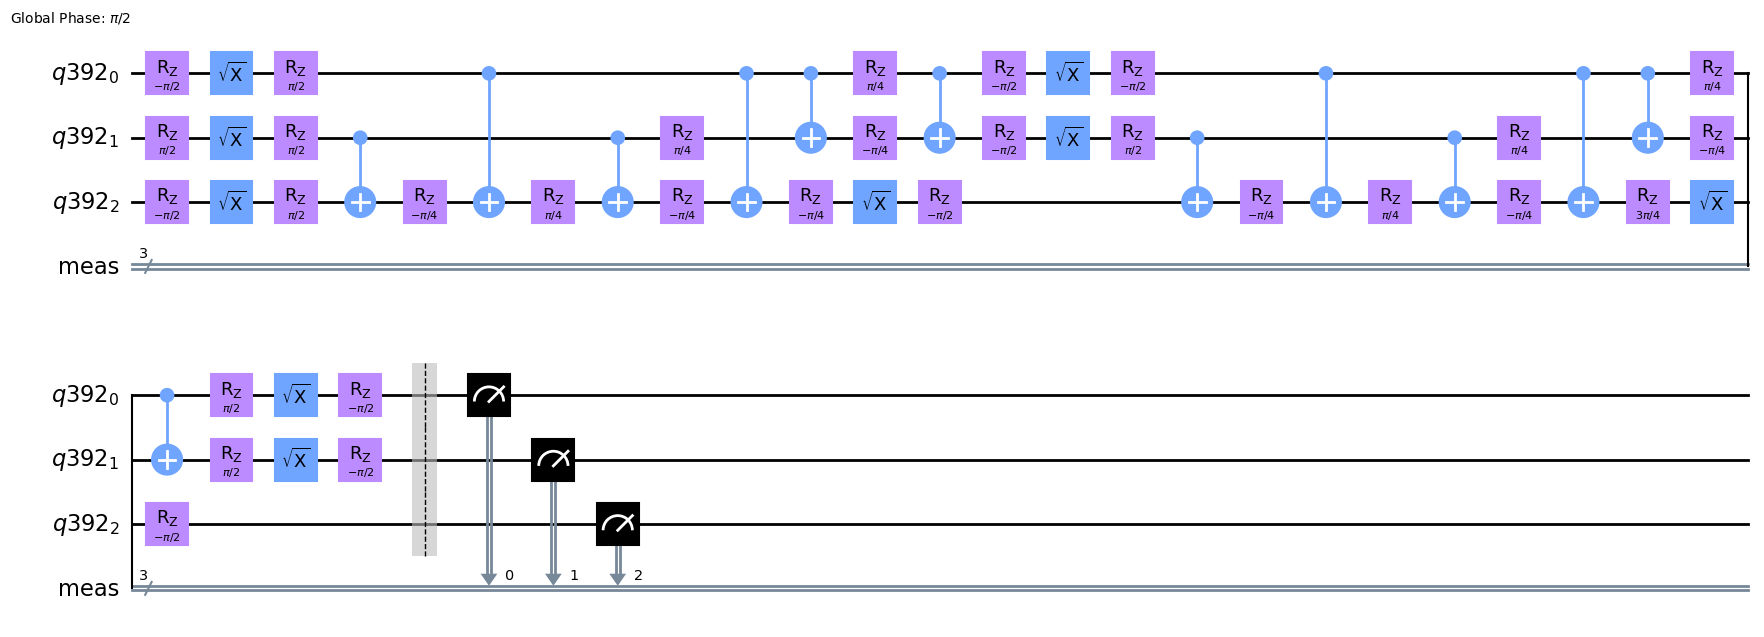

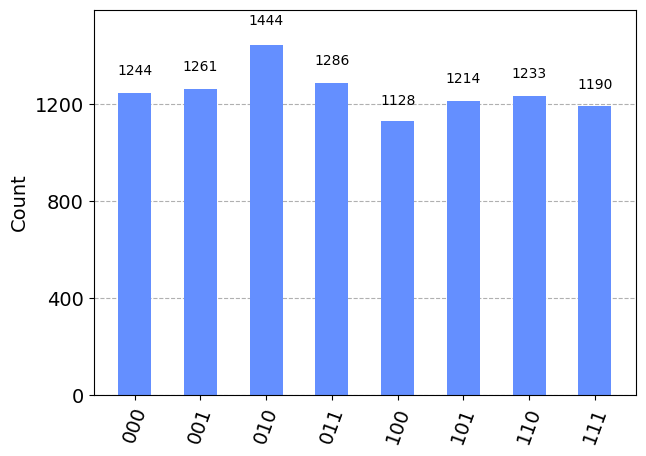

PROBABILIDAD DE ERROR:  0.26
noise model:  NoiseModel:
  Basis gates: ['cx', 'id', 'rz', 'sx']
  Instructions with noise: ['cx']
  All-qubits errors: ['cx']


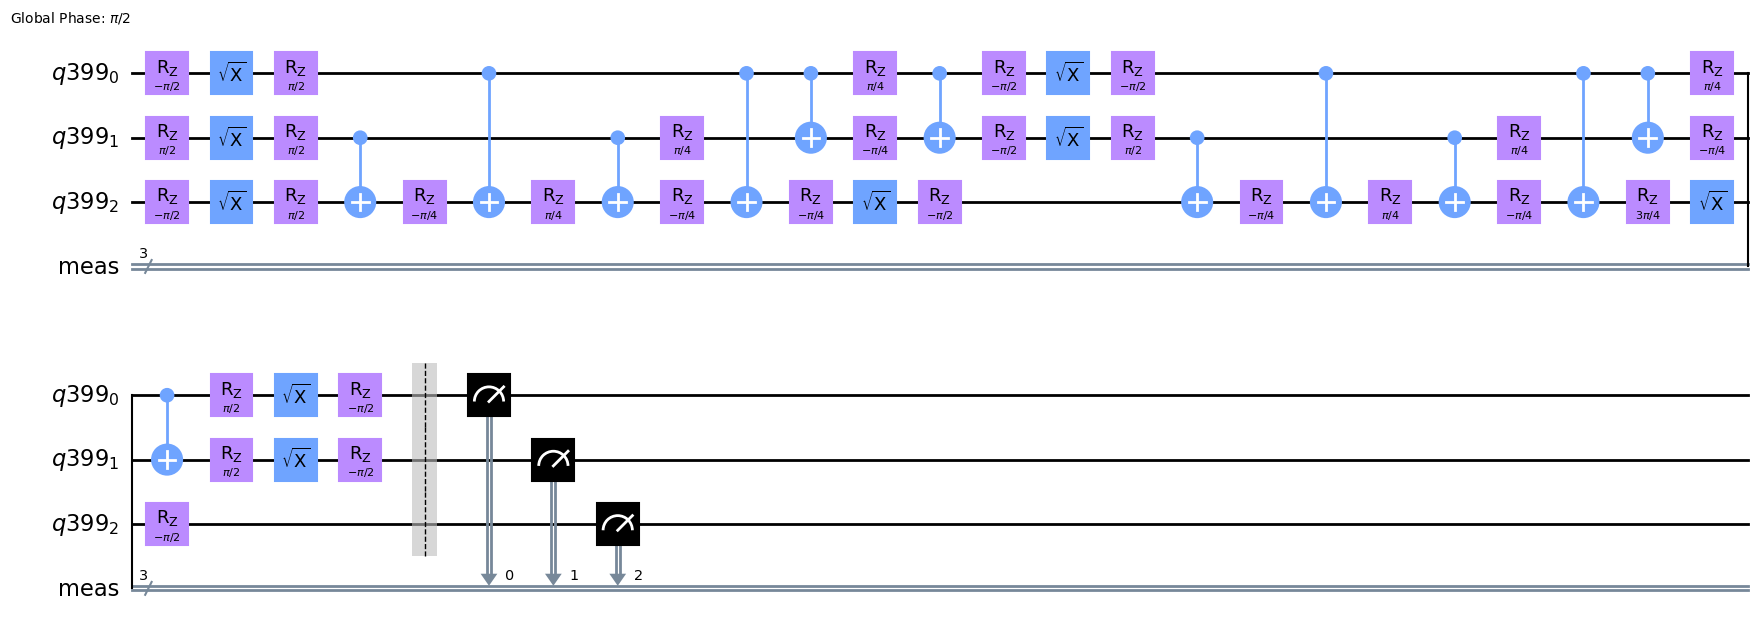

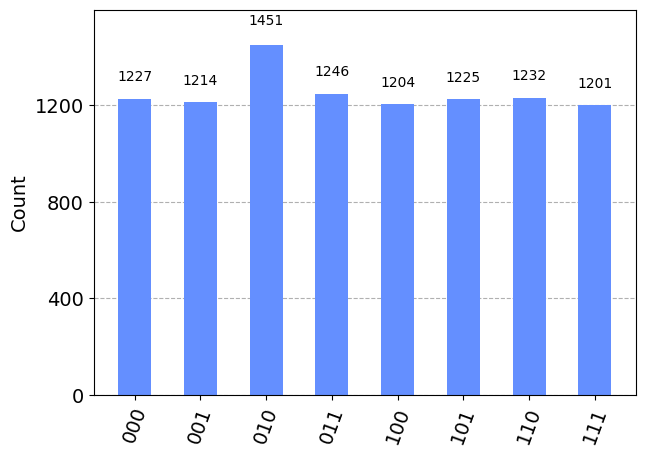

PROBABILIDAD DE ERROR:  0.27
noise model:  NoiseModel:
  Basis gates: ['cx', 'id', 'rz', 'sx']
  Instructions with noise: ['cx']
  All-qubits errors: ['cx']


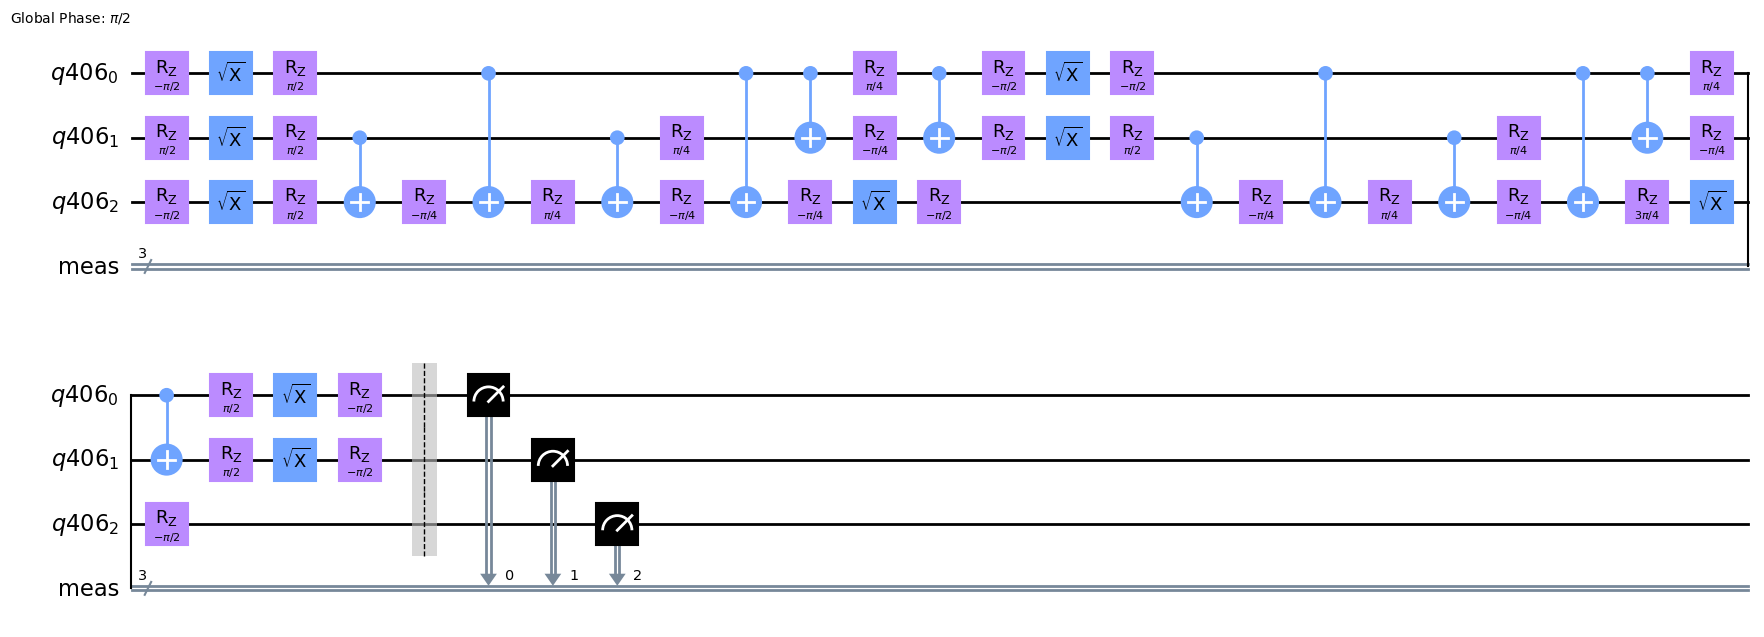

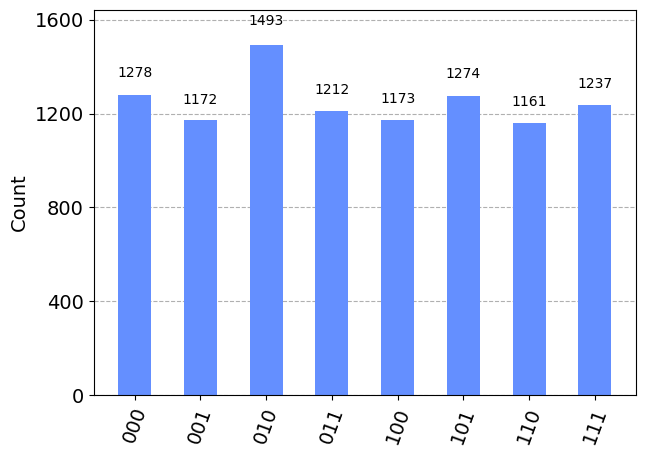

PROBABILIDAD DE ERROR:  0.28
noise model:  NoiseModel:
  Basis gates: ['cx', 'id', 'rz', 'sx']
  Instructions with noise: ['cx']
  All-qubits errors: ['cx']


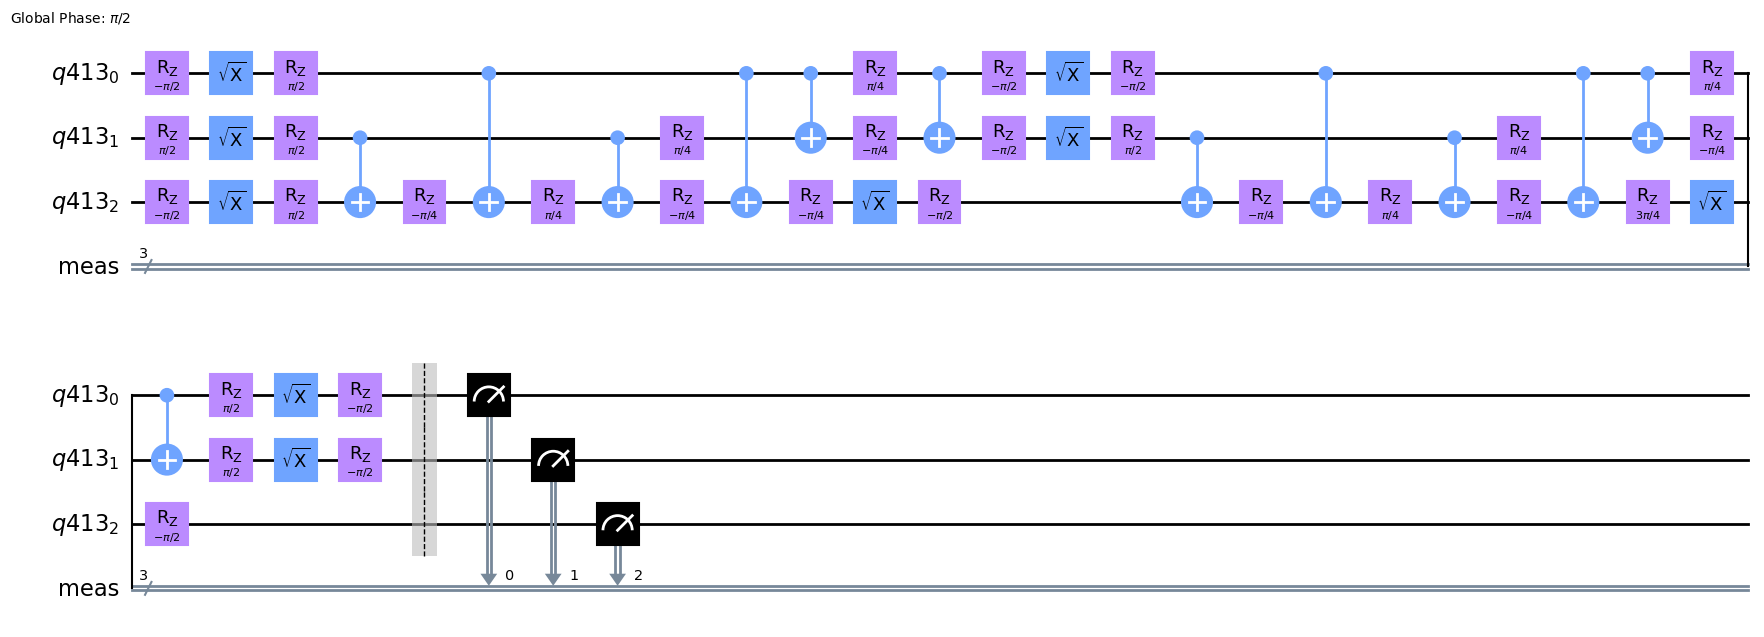

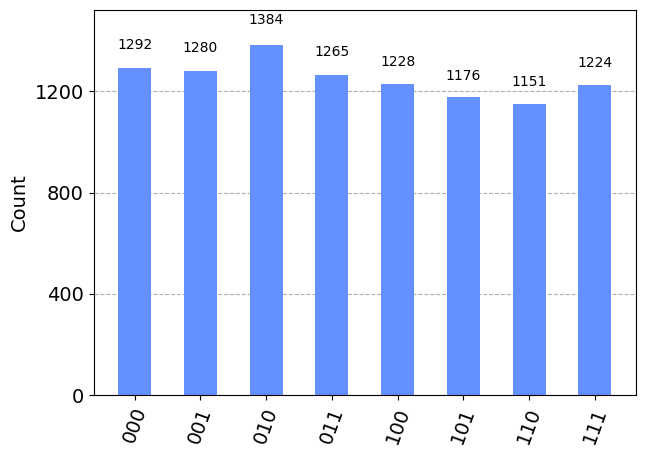

PROBABILIDAD DE ERROR:  0.29
noise model:  NoiseModel:
  Basis gates: ['cx', 'id', 'rz', 'sx']
  Instructions with noise: ['cx']
  All-qubits errors: ['cx']


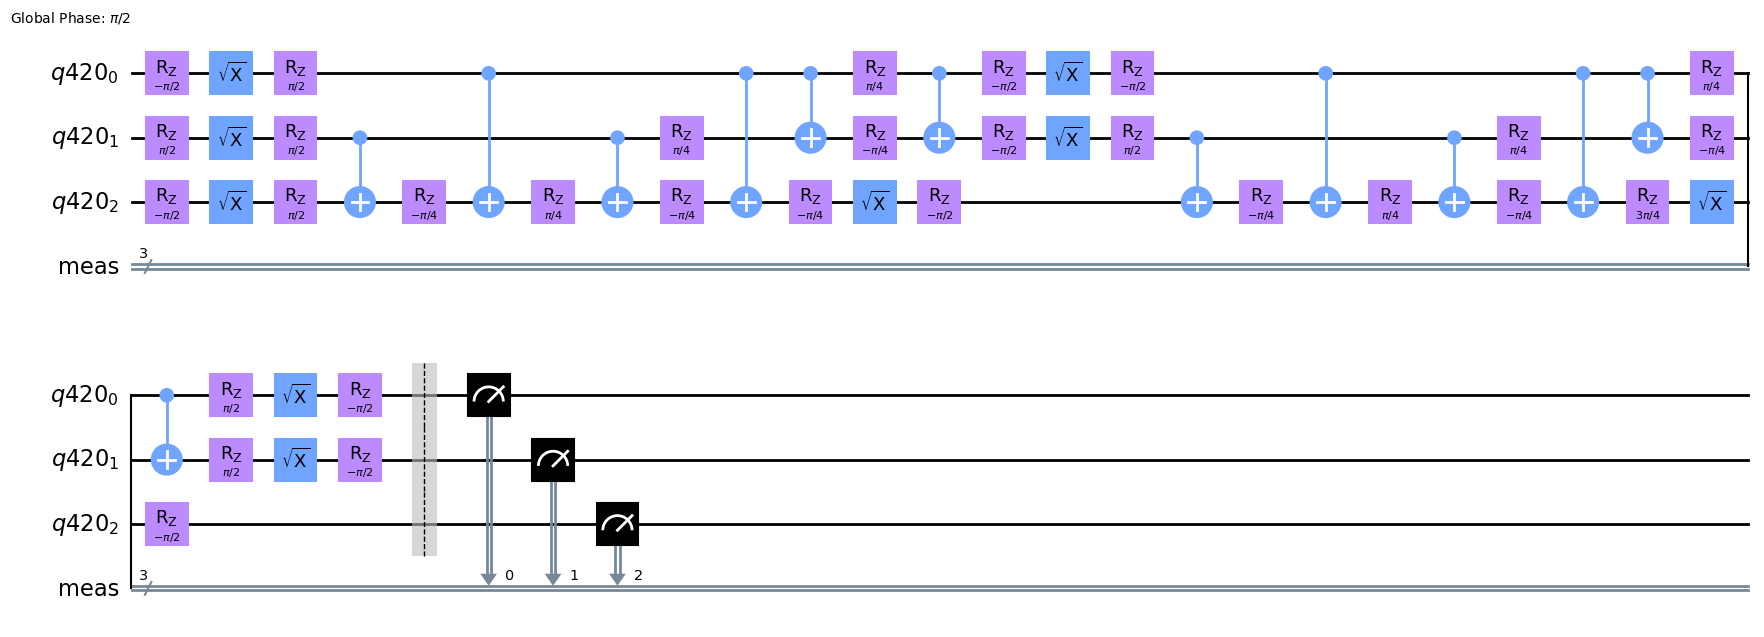

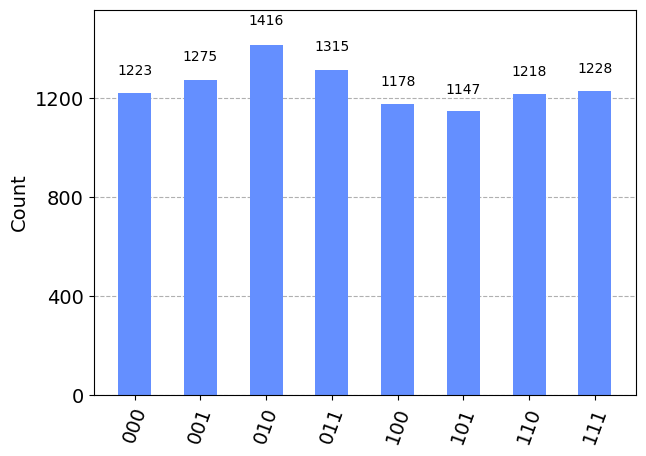

PROBABILIDAD DE ERROR:  0.3
noise model:  NoiseModel:
  Basis gates: ['cx', 'id', 'rz', 'sx']
  Instructions with noise: ['cx']
  All-qubits errors: ['cx']


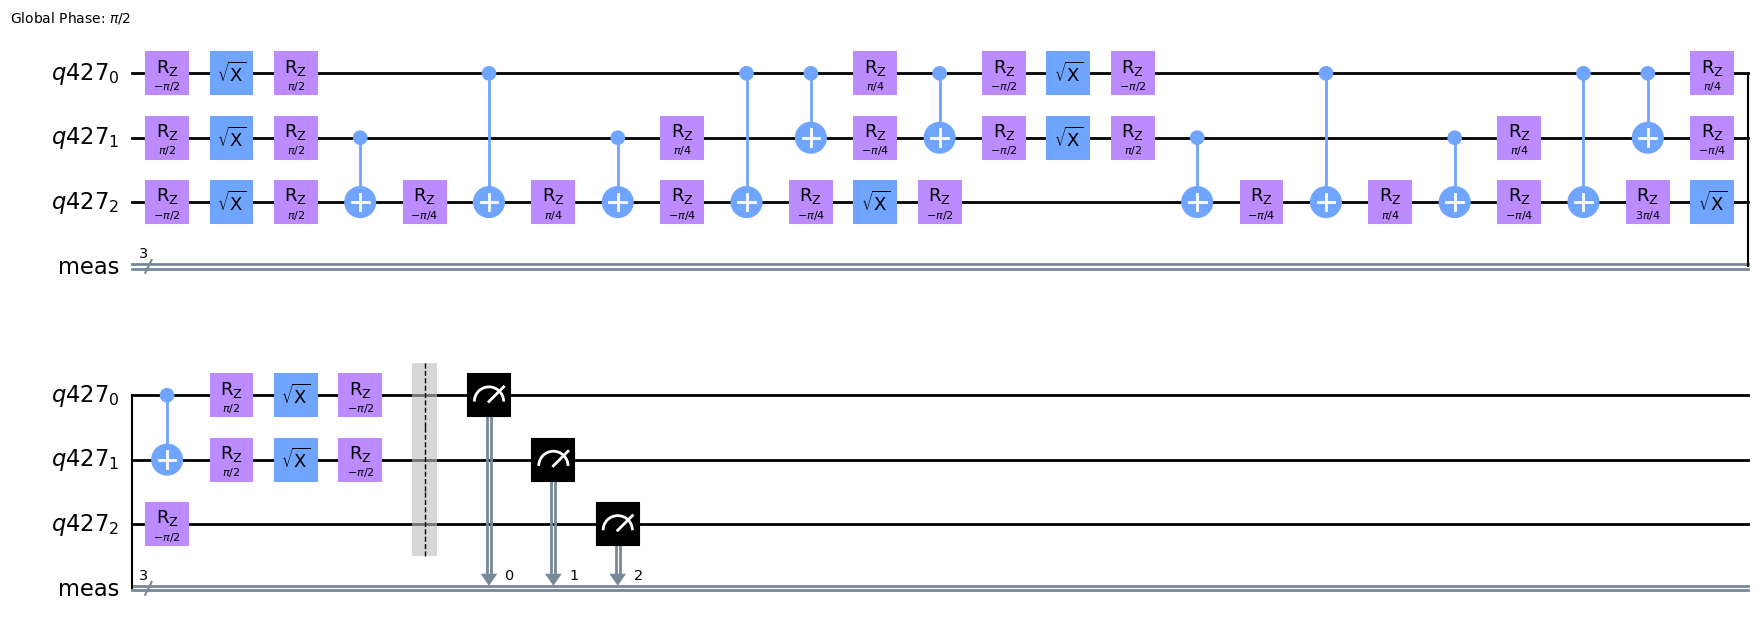

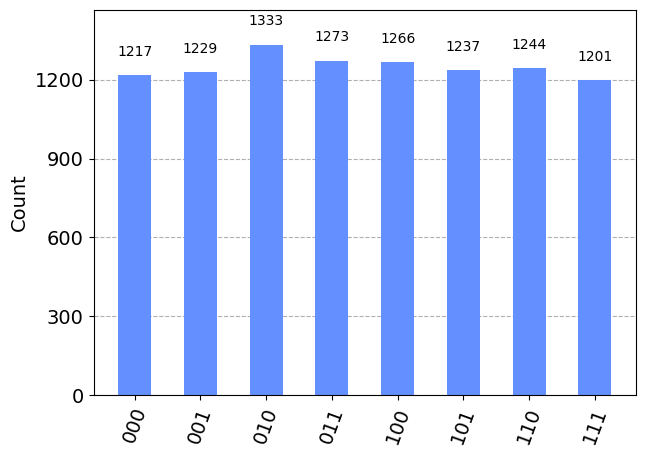

In [10]:
results = []
for i in errorProbabilities:
    #ALGORITMO
    print('PROBABILIDAD DE ERROR: ',i)
    
    noiseModel = add_two_qubits_depolarizing_error(NoiseModel(),i)
    basisGates=noiseModel.basis_gates
    print('noise model: ',noiseModel)
        
    qr = QuantumRegister(nroQubits)
    qc = QuantumCircuit(qr)
    qc.h(qr)
    qc.compose(groverOp.decompose(), inplace=True)
    qc.measure_all()
    #display(qc.draw("mpl"))
    #display(qc.data)
    
    #EJECUCION
    sim_noise = AerSimulator(noise_model=noiseModel)
    circ_tnoise = transpile(qc, sim_noise,basis_gates=basis_gates)
    display(circ_tnoise.draw('mpl'))
    result_bit_flip = sim_noise.run(circ_tnoise,shots=shots).result()
    counts_bit_flip = result_bit_flip.get_counts(0)
    display(plot_histogram(counts_bit_flip))
        
    results.append(counts_bit_flip)

In [17]:
#CALCULO DE PROBABILIDADES DE EXITO PARA CADA EXPERIMENTO
successCounts2=[]
for i in results:
    currentCount = 0
    for j in marked_states:
        currentCount = currentCount + i[j]
    successCounts2.append(currentCount/shots)
#print(successCounts2)

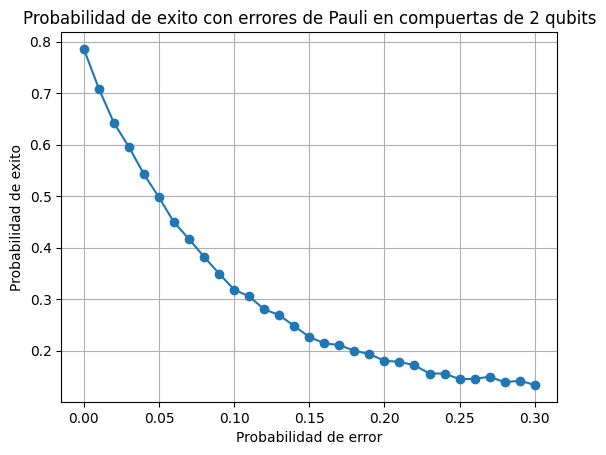

In [12]:
# Crear el gráfico
plt.plot(errorProbabilities, successCounts2, marker='o', linestyle='-')

# Etiquetas de los ejes
plt.xlabel('Probabilidad de error')
plt.ylabel('Probabilidad de exito')

# Título del gráfico
plt.title('Probabilidad de exito con errores de Pauli en compuertas de 2 qubits')

# Mostrar el gráfico
plt.grid(True)
plt.show()

In [13]:
#CALCULO DE CANTIDAD DE COMPUERTAS UTILIZADAS
#display(circ_tnoise.count_ops())
ops = circ_tnoise.count_ops()
two_qubits_ops = ops['cx']
b.append(two_qubits_ops)
print('-----------------------------------------------------------')
print('Cantidad de compuertas de 2 qubit: ',two_qubits_ops)
print('-----------------------------------------------------------')

-----------------------------------------------------------
Cantidad de compuertas de 2 qubit:  12
-----------------------------------------------------------


## Conclusiones

Los resultados obtenidos para simulación de ruido de depolarizacion en compuertas de 1 qubit y de 2 qubits son los siguientes: 

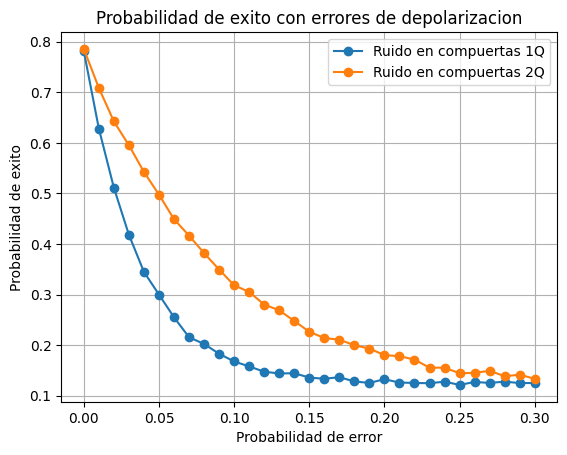

In [14]:
# Crear el gráfico
plt.plot(errorProbabilities, successCounts1, marker='o', linestyle='-', label='Ruido en compuertas 1Q')
plt.plot(errorProbabilities, successCounts2, marker='o', linestyle='-', label='Ruido en compuertas 2Q')

# Etiquetas de los ejes
plt.xlabel('Probabilidad de error')
plt.ylabel('Probabilidad de exito')

# Título del gráfico
plt.title('Probabilidad de exito con errores de depolarizacion')

plt.legend()

# Mostrar el gráfico
plt.grid(True)
plt.show()

Se sabe que, desde un punto teorico, el ruido generado en compuerta de dos qubits afecta mas al resultado que el ruido en compuertas de un qubit. Este hecho no se ve representado en la grafica previamente mostrada. Creemos que esto se debe, principalmente,a la diferencia en cantidad de compuertas de 1 qubit respecto a las de 2 qubits.

## Referencias

1. StackExchange - Quantum Computing | How to actually send Qiskit code to the que to be ran on an IBM Quantum Computer? https://quantumcomputing.stackexchange.com/questions/26863/how-to-actually-send-qiskit-code-to-the-que-to-be-ran-on-an-ibm-quantum-computer 

2. How to Show Images in Jupyter Notebook?
https://saturncloud.io/blog/how-to-show-images-in-jupyter-notebook/

3. Qiskit - Building noise models
https://qiskit.org/ecosystem/aer/tutorials/3_building_noise_models.html